# NLP/LLM Engineer Test - Medical Fine-tuning

This notebook demonstrates the complete solution for the NLP/LLM Engineer test.
It covers:
1.  **Setup & Configuration**: Environment and hyperparameters.
2.  **Training**: Fine-tuning Qwen2.5-1.5B-Instruct on a medical dataset using LoRA.
3.  **Evaluation**: Comparing different LoRA configurations (r=8, 16, 32).
4.  **Inference**: Demonstrating the best model on diverse medical queries.


## 1. Setup & Dependencies


In [1]:
!pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import sys
import os
import yaml
import torch
from IPython.display import Markdown, display, Image
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import PeftModel

# Add project root to path
sys.path.append(os.path.abspath("../"))
from src.utils.env_utils import setup_env

setup_env()
print("Environment setup complete.")


/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setting HF_HOME to ./hf_cache
W&B API Key found.
Environment setup complete.


## 2. Configuration
We use `configs/config.yml` to manage all hyperparameters.


In [3]:
with open("../configs/config.yml", "r") as f:
    config = yaml.safe_load(f)
    print(yaml.dump(config, default_flow_style=False))


dataset:
  instruction_template: '<|im_start|>system

    You are a helpful medical assistant.<|im_end|>

    <|im_start|>user

    {question}<|im_end|>

    <|im_start|>assistant

    {answer}<|im_end|>

    '
  max_samples: 1000
  name: ruslanmv/ai-medical-chatbot
  seed: 42
  shuffle: true
  train_ratio: 0.9
  val_ratio: 0.1
evaluation:
  test_questions:
  - What are the symptoms of diabetes?
  - How to treat a common cold?
  - What causes high blood pressure?
  - What are the side effects of aspirin?
  - How to prevent heart disease?
experiments:
- lora:
    lora_alpha: 16
    r: 8
  name: lora_r8_alpha16
- lora:
    lora_alpha: 32
    r: 16
  name: lora_r16_alpha32
- lora:
    lora_alpha: 64
    r: 32
  name: lora_r32_alpha64
lora:
  bias: none
  lora_alpha: 32
  lora_dropout: 0.1
  r: 16
  target_modules:
  - q_proj
  - k_proj
  - v_proj
  - o_proj
  - gate_proj
  - up_proj
  - down_proj
  task_type: CAUSAL_LM
model:
  max_length: 512
  max_new_tokens: 256
  name: Qwen/Qwen2.5-1.

## 3. Training & Comparison
We run `scripts/train_comparison.py` to train multiple LoRA configurations and compare them.
**Note**: This step may take significant time. If models are already trained, it will skip training and generate reports.


In [4]:
!python ../scripts/train_comparison.py

INFO     2025-11-29 12:01:57 - setup - INFO - Logging initialized. Log file:    
         logs/project_20251129_120157.log                                       
╭──────────────────────────────────────────────────────────────────────────────╮
│ Running LoRA Experiments (Subprocess)                                        │
╰──────────────────────────────────────────────────────────────────────────────╯
INFO     2025-11-29 12:01:57 - __main__ - INFO - Checking for results in:       
         /home/thanhnx/qwen/aimesoft-nlp-llm-test/outputs/lora_r8_alpha16       


INFO     2025-11-29 12:01:59 - setup - INFO - Logging initialized. Log file:    
         logs/project_20251129_120159.log                                       
INFO     2025-11-29 12:01:59 - setup - INFO - Logging initialized. Log file:    
         logs/project_20251129_120159.log                                       
INFO     2025-11-29 12:01:59 - setup - INFO - Logging initialized. Log file:    
         logs/project_20251129_120159.log                                       
╭──────────────────────────────────────────────────────────────────────────────╮
│ LoRA Fine-tuning (lora_r8_alpha16)                                           │
╰──────────────────────────────────────────────────────────────────────────────╯
INFO     2025-11-29 12:01:59 - __main__ - INFO - Overriding LoRA config: {'r':  
         8, 'lora_alpha': 16}                                                   
INFO     2025-11-29 12:01:59 - __main__ - INFO - Configuration loaded.          


wandb: Currently logged in as: xt2201-vht (xt2201-vht-hust) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


wandb: ⢿ setting up run mpmxgpmq (0.0s)


wandb: ⣻ setting up run mpmxgpmq (0.0s)


wandb: ⣽ setting up run mpmxgpmq (0.0s)


wandb: ⣾ setting up run mpmxgpmq (0.0s)


wandb: ⣷ setting up run mpmxgpmq (0.0s)
wandb: Tracking run with wandb version 0.23.0
wandb: Run data is saved locally in /home/thanhnx/qwen/aimesoft-nlp-llm-test/wandb/run-20251129_120200-mpmxgpmq
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run lora_r8_alpha16
wandb: ⭐️ View project at https://wandb.ai/xt2201-vht-hust/LLM%20Medical%20Fine-tuning
wandb: 🚀 View run at https://wandb.ai/xt2201-vht-hust/LLM%20Medical%20Fine-tuning/runs/mpmxgpmq


╭──────────────────────────────────────────────────────────────────────────────╮
│ Data Preprocessing                                                           │
╰──────────────────────────────────────────────────────────────────────────────╯
INFO     2025-11-29 12:02:01 - src.data.load_dataset - INFO - Loading dataset:  
         ruslanmv/ai-medical-chatbot                                            


INFO     2025-11-29 12:02:05 - src.data.load_dataset - INFO - Limiting to 1000  
         samples                                                                
INFO     2025-11-29 12:02:05 - src.data.preprocess - INFO - Formatting          
         dataset...                                                             
INFO     2025-11-29 12:02:05 - src.data.preprocess - INFO - Splitting dataset   
         (test_size=0.1)...                                                     
INFO     2025-11-29 12:02:05 - src.data.preprocess - INFO - Train size: 900     
INFO     2025-11-29 12:02:05 - src.data.preprocess - INFO - Test/Val size: 100  


INFO     2025-11-29 12:02:07 - __main__ - INFO - Loading model                  
         Qwen/Qwen2.5-1.5B-Instruct...                                          


INFO     2025-11-29 12:02:08 - accelerate.utils.modeling - INFO - We will use   
         90% of the memory on device 0 for storing the model, and 10% for the   
         buffer to avoid OOM. You can set `max_memory` in to a higher value to  
         use more memory (at your own risk).                                    


INFO     2025-11-29 12:02:10 - __main__ - INFO - Early stopping enabled.        


INFO     2025-11-29 12:02:10 - __main__ - INFO - Starting training (Resume:     
         False)...                                                              
The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None, 'pad_token_id': 151643}.


  0%|                                                  | 0/1710 [00:00<?, ?it/s]

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  0%|                                        | 1/1710 [00:02<1:18:56,  2.77s/it]

  0%|                                        | 2/1710 [00:05<1:17:35,  2.73s/it]

  0%|                                        | 3/1710 [00:08<1:16:25,  2.69s/it]

  0%|                                        | 4/1710 [00:10<1:16:01,  2.67s/it]

  0%|                                        | 5/1710 [00:13<1:15:18,  2.65s/it]INFO     2025-11-29 12:02:24 - __main__ - INFO - Step 5: loss: 3.4318,          
         grad_norm: 1.2306, learning_rate: 0.0000, entropy: 2.6204, num_tokens: 
         11075.0000, mean_token_accuracy: 0.3724, epoch: 0.0889                 
{'loss': 3.4318, 'grad_norm': 1.2305580377578735, 'learning_rate': 2e-05, 'entropy': 2.6203733295202256, 'num_tokens': 11075.0, 'mean_token_accuracy': 0.37244467716664076, 'epoch': 0.09}
  0%|                                        | 5/1710 [00:13<1:15:18,  2.65s/it]

  0%|▏                                       | 6/1710 [00:16<1:15:20,  2.65s/it]

  0%|▏                                       | 7/1710 [00:18<1:14:49,  2.64s/it]

  0%|▏                                       | 8/1710 [00:21<1:14:52,  2.64s/it]

  1%|▏                                       | 9/1710 [00:23<1:14:51,  2.64s/it]

  1%|▏                                      | 10/1710 [00:26<1:14:30,  2.63s/it]INFO     2025-11-29 12:02:37 - __main__ - INFO - Step 10: loss: 3.2595,         
         grad_norm: 1.3344, learning_rate: 0.0000, entropy: 2.6226, num_tokens: 
         22911.0000, mean_token_accuracy: 0.4000, epoch: 0.1778                 
{'loss': 3.2595, 'grad_norm': 1.3343658447265625, 'learning_rate': 4.5e-05, 'entropy': 2.6225676402449607, 'num_tokens': 22911.0, 'mean_token_accuracy': 0.40002567041665316, 'epoch': 0.18}
  1%|▏                                      | 10/1710 [00:26<1:14:30,  2.63s/it]

  1%|▎                                      | 11/1710 [00:29<1:14:30,  2.63s/it]

  1%|▎                                      | 12/1710 [00:31<1:14:41,  2.64s/it]

  1%|▎                                      | 13/1710 [00:34<1:14:21,  2.63s/it]

  1%|▎                                      | 14/1710 [00:37<1:14:09,  2.62s/it]

  1%|▎                                      | 15/1710 [00:39<1:13:56,  2.62s/it]INFO     2025-11-29 12:02:50 - __main__ - INFO - Step 15: loss: 3.1087,         
         grad_norm: 1.4287, learning_rate: 0.0000, entropy: 2.7565, num_tokens: 
         34499.0000, mean_token_accuracy: 0.4105, epoch: 0.2667                 
{'loss': 3.1087, 'grad_norm': 1.4287060499191284, 'learning_rate': 4.9999316985504475e-05, 'entropy': 2.756482607126236, 'num_tokens': 34499.0, 'mean_token_accuracy': 0.41050710771232846, 'epoch': 0.27}
  1%|▎                                      | 15/1710 [00:39<1:13:56,  2.62s/it]

  1%|▎                                      | 16/1710 [00:42<1:13:52,  2.62s/it]

  1%|▍                                      | 17/1710 [00:44<1:13:54,  2.62s/it]

  1%|▍                                      | 18/1710 [00:47<1:13:57,  2.62s/it]

  1%|▍                                      | 19/1710 [00:50<1:13:43,  2.62s/it]

  1%|▍                                      | 20/1710 [00:52<1:13:36,  2.61s/it]INFO     2025-11-29 12:03:03 - __main__ - INFO - Step 20: loss: 2.9263,         
         grad_norm: 1.4862, learning_rate: 0.0000, entropy: 2.8203, num_tokens: 
         45176.0000, mean_token_accuracy: 0.4213, epoch: 0.3556                 
{'loss': 2.9263, 'grad_norm': 1.4862215518951416, 'learning_rate': 4.999654230307898e-05, 'entropy': 2.8202767431735993, 'num_tokens': 45176.0, 'mean_token_accuracy': 0.4213167537003756, 'epoch': 0.36}
  1%|▍                                      | 20/1710 [00:52<1:13:36,  2.61s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:03:06 - __main__ - INFO - Step 20: eval_loss: 2.6727,    
         eval_runtime: 2.5834, eval_samples_per_second: 38.7080,                
         eval_steps_per_second: 5.0320, eval_entropy: 2.7210, eval_num_tokens:  
         45176.0000, eval_mean_token_accuracy: 0.4469, epoch: 0.3556            

{'eval_loss': 2.672744035720825, 'eval_runtime': 2.5834, 'eval_samples_per_second': 38.708, 'eval_steps_per_second': 5.032, 'eval_entropy': 2.7210007997659535, 'eval_num_tokens': 45176.0, 'eval_mean_token_accuracy': 0.44685712456703186, 'epoch': 0.36}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  1%|▍                                      | 21/1710 [00:58<1:44:05,  3.70s/it]

  1%|▌                                      | 22/1710 [01:01<1:34:55,  3.37s/it]

  1%|▌                                      | 23/1710 [01:04<1:28:34,  3.15s/it]

  1%|▌                                      | 24/1710 [01:06<1:24:15,  3.00s/it]

  1%|▌                                      | 25/1710 [01:09<1:21:19,  2.90s/it]INFO     2025-11-29 12:03:20 - __main__ - INFO - Step 25: loss: 2.6374,         
         grad_norm: 1.5070, learning_rate: 0.0000, entropy: 2.7743, num_tokens: 
         57023.0000, mean_token_accuracy: 0.4549, epoch: 0.4444                 
{'loss': 2.6374, 'grad_norm': 1.5070492029190063, 'learning_rate': 4.999163350102828e-05, 'entropy': 2.7743272125720977, 'num_tokens': 57023.0, 'mean_token_accuracy': 0.4549444165080786, 'epoch': 0.44}
  1%|▌                                      | 25/1710 [01:09<1:21:19,  2.90s/it]

  2%|▌                                      | 26/1710 [01:12<1:19:23,  2.83s/it]

  2%|▌                                      | 27/1710 [01:14<1:17:44,  2.77s/it]

  2%|▋                                      | 28/1710 [01:17<1:16:36,  2.73s/it]

  2%|▋                                      | 29/1710 [01:20<1:15:31,  2.70s/it]

  2%|▋                                      | 30/1710 [01:22<1:14:52,  2.67s/it]INFO     2025-11-29 12:03:33 - __main__ - INFO - Step 30: loss: 2.5270,         
         grad_norm: 1.8920, learning_rate: 0.0000, entropy: 2.6662, num_tokens: 
         68929.0000, mean_token_accuracy: 0.4918, epoch: 0.5333                 
{'loss': 2.527, 'grad_norm': 1.8920451402664185, 'learning_rate': 4.9984590998449135e-05, 'entropy': 2.666197070479393, 'num_tokens': 68929.0, 'mean_token_accuracy': 0.4917856313288212, 'epoch': 0.53}
  2%|▋                                      | 30/1710 [01:22<1:14:52,  2.67s/it]

  2%|▋                                      | 31/1710 [01:25<1:14:22,  2.66s/it]

  2%|▋                                      | 32/1710 [01:27<1:13:51,  2.64s/it]

  2%|▊                                      | 33/1710 [01:30<1:13:40,  2.64s/it]

  2%|▊                                      | 34/1710 [01:33<1:13:26,  2.63s/it]

  2%|▊                                      | 35/1710 [01:35<1:13:13,  2.62s/it]INFO     2025-11-29 12:03:46 - __main__ - INFO - Step 35: loss: 2.4306,         
         grad_norm: 1.6910, learning_rate: 0.0000, entropy: 2.5076, num_tokens: 
         79781.0000, mean_token_accuracy: 0.5283, epoch: 0.6222                 
{'loss': 2.4306, 'grad_norm': 1.690962791442871, 'learning_rate': 4.997541539660645e-05, 'entropy': 2.507608951628208, 'num_tokens': 79781.0, 'mean_token_accuracy': 0.5282761413604021, 'epoch': 0.62}
  2%|▊                                      | 35/1710 [01:35<1:13:13,  2.62s/it]

  2%|▊                                      | 36/1710 [01:38<1:13:13,  2.62s/it]

  2%|▊                                      | 37/1710 [01:41<1:13:29,  2.64s/it]

  2%|▊                                      | 38/1710 [01:43<1:13:25,  2.64s/it]

  2%|▉                                      | 39/1710 [01:46<1:13:24,  2.64s/it]

  2%|▉                                      | 40/1710 [01:48<1:13:13,  2.63s/it]INFO     2025-11-29 12:04:00 - __main__ - INFO - Step 40: loss: 2.2811,         
         grad_norm: 1.1611, learning_rate: 0.0000, entropy: 2.2658, num_tokens: 
         90667.0000, mean_token_accuracy: 0.5544, epoch: 0.7111                 
{'loss': 2.2811, 'grad_norm': 1.1611137390136719, 'learning_rate': 4.996410747888184e-05, 'entropy': 2.2658312782645225, 'num_tokens': 90667.0, 'mean_token_accuracy': 0.5543721035122872, 'epoch': 0.71}
  2%|▉                                      | 40/1710 [01:48<1:13:13,  2.63s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:04:02 - __main__ - INFO - Step 40: eval_loss: 2.2235,    
         eval_runtime: 2.5792, eval_samples_per_second: 38.7720,                
         eval_steps_per_second: 5.0400, eval_entropy: 2.2474, eval_num_tokens:  
         90667.0000, eval_mean_token_accuracy: 0.5300, epoch: 0.7111            

{'eval_loss': 2.223468065261841, 'eval_runtime': 2.5792, 'eval_samples_per_second': 38.772, 'eval_steps_per_second': 5.04, 'eval_entropy': 2.247376698714036, 'eval_num_tokens': 90667.0, 'eval_mean_token_accuracy': 0.5300198793411255, 'epoch': 0.71}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  2%|▉                                      | 41/1710 [01:55<1:43:31,  3.72s/it]

  2%|▉                                      | 42/1710 [01:57<1:34:28,  3.40s/it]

  3%|▉                                      | 43/1710 [02:00<1:28:04,  3.17s/it]

  3%|█                                      | 44/1710 [02:03<1:23:29,  3.01s/it]

  3%|█                                      | 45/1710 [02:05<1:20:09,  2.89s/it]INFO     2025-11-29 12:04:16 - __main__ - INFO - Step 45: loss: 2.2612,         
         grad_norm: 0.6601, learning_rate: 0.0000, entropy: 2.1319, num_tokens: 
         103327.0000, mean_token_accuracy: 0.5538, epoch: 0.8000                
{'loss': 2.2612, 'grad_norm': 0.6601043343544006, 'learning_rate': 4.995066821070679e-05, 'entropy': 2.131893055140972, 'num_tokens': 103327.0, 'mean_token_accuracy': 0.5538325324654579, 'epoch': 0.8}
  3%|█                                      | 45/1710 [02:05<1:20:09,  2.89s/it]

  3%|█                                      | 46/1710 [02:08<1:18:11,  2.82s/it]

  3%|█                                      | 47/1710 [02:11<1:16:40,  2.77s/it]

  3%|█                                      | 48/1710 [02:13<1:15:22,  2.72s/it]

  3%|█                                      | 49/1710 [02:16<1:14:36,  2.70s/it]

  3%|█▏                                     | 50/1710 [02:18<1:13:38,  2.66s/it]INFO     2025-11-29 12:04:29 - __main__ - INFO - Step 50: loss: 2.1591,         
         grad_norm: 0.6352, learning_rate: 0.0000, entropy: 2.0311, num_tokens: 
         115430.0000, mean_token_accuracy: 0.5747, epoch: 0.8889                
{'loss': 2.1591, 'grad_norm': 0.6352397203445435, 'learning_rate': 4.9935098739480244e-05, 'entropy': 2.0310936152935026, 'num_tokens': 115430.0, 'mean_token_accuracy': 0.5746682811528444, 'epoch': 0.89}
  3%|█▏                                     | 50/1710 [02:18<1:13:38,  2.66s/it]

  3%|█▏                                     | 51/1710 [02:21<1:13:16,  2.65s/it]

  3%|█▏                                     | 52/1710 [02:24<1:12:50,  2.64s/it]

  3%|█▏                                     | 53/1710 [02:26<1:12:31,  2.63s/it]

  3%|█▏                                     | 54/1710 [02:29<1:12:29,  2.63s/it]

  3%|█▎                                     | 55/1710 [02:31<1:12:17,  2.62s/it]INFO     2025-11-29 12:04:43 - __main__ - INFO - Step 55: loss: 2.0814,         
         grad_norm: 0.8078, learning_rate: 0.0000, entropy: 1.9255, num_tokens: 
         125590.0000, mean_token_accuracy: 0.6019, epoch: 0.9778                
{'loss': 2.0814, 'grad_norm': 0.8077932596206665, 'learning_rate': 4.991740039447062e-05, 'entropy': 1.9254556059837342, 'num_tokens': 125590.0, 'mean_token_accuracy': 0.6019016206264496, 'epoch': 0.98}
  3%|█▎                                     | 55/1710 [02:31<1:12:17,  2.62s/it]

  3%|█▎                                     | 56/1710 [02:34<1:12:25,  2.63s/it]

  3%|█▎                                       | 57/1710 [02:35<56:14,  2.04s/it]

  3%|█▎                                     | 58/1710 [02:37<1:01:16,  2.23s/it]

  3%|█▎                                     | 59/1710 [02:40<1:04:55,  2.36s/it]

  4%|█▎                                     | 60/1710 [02:43<1:07:04,  2.44s/it]INFO     2025-11-29 12:04:54 - __main__ - INFO - Step 60: loss: 2.1000,         
         grad_norm: 0.5930, learning_rate: 0.0000, entropy: 1.9094, num_tokens: 
         135787.0000, mean_token_accuracy: 0.5994, epoch: 1.0533                
{'loss': 2.1, 'grad_norm': 0.5930150151252747, 'learning_rate': 4.9897574686702306e-05, 'entropy': 1.9093776538091547, 'num_tokens': 135787.0, 'mean_token_accuracy': 0.5994382110588691, 'epoch': 1.05}
  4%|█▎                                     | 60/1710 [02:43<1:07:04,  2.44s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.59it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:04:56 - __main__ - INFO - Step 60: eval_loss: 2.0428,    
         eval_runtime: 2.5800, eval_samples_per_second: 38.7600,                
         eval_steps_per_second: 5.0390, eval_entropy: 2.0567, eval_num_tokens:  
         135787.0000, eval_mean_token_accuracy: 0.5555, epoch: 1.0533           

{'eval_loss': 2.042839288711548, 'eval_runtime': 2.58, 'eval_samples_per_second': 38.76, 'eval_steps_per_second': 5.039, 'eval_entropy': 2.0566597626759457, 'eval_num_tokens': 135787.0, 'eval_mean_token_accuracy': 0.5554652580848107, 'epoch': 1.05}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  4%|█▍                                     | 61/1710 [02:49<1:38:12,  3.57s/it]

  4%|█▍                                     | 62/1710 [02:52<1:30:27,  3.29s/it]

  4%|█▍                                     | 63/1710 [02:54<1:25:26,  3.11s/it]

  4%|█▍                                     | 64/1710 [02:57<1:21:43,  2.98s/it]

  4%|█▍                                     | 65/1710 [03:00<1:19:04,  2.88s/it]INFO     2025-11-29 12:05:11 - __main__ - INFO - Step 65: loss: 2.0919,         
         grad_norm: 0.6522, learning_rate: 0.0000, entropy: 1.8320, num_tokens: 
         147953.0000, mean_token_accuracy: 0.6162, epoch: 1.1422                
{'loss': 2.0919, 'grad_norm': 0.652184784412384, 'learning_rate': 4.9875623308826705e-05, 'entropy': 1.8320102132856846, 'num_tokens': 147953.0, 'mean_token_accuracy': 0.6161789141595364, 'epoch': 1.14}
  4%|█▍                                     | 65/1710 [03:00<1:19:04,  2.88s/it]

  4%|█▌                                     | 66/1710 [03:02<1:17:07,  2.82s/it]

  4%|█▌                                     | 67/1710 [03:05<1:15:37,  2.76s/it]

  4%|█▌                                     | 68/1710 [03:07<1:14:35,  2.73s/it]

  4%|█▌                                     | 69/1710 [03:10<1:13:48,  2.70s/it]

  4%|█▌                                     | 70/1710 [03:13<1:13:13,  2.68s/it]

INFO     2025-11-29 12:05:24 - __main__ - INFO - Step 70: loss: 2.0423,         
         grad_norm: 0.5351, learning_rate: 0.0000, entropy: 1.8801, num_tokens: 
         159698.0000, mean_token_accuracy: 0.6066, epoch: 1.2311                
{'loss': 2.0423, 'grad_norm': 0.5350949168205261, 'learning_rate': 4.9851548134977655e-05, 'entropy': 1.8800864696502686, 'num_tokens': 159698.0, 'mean_token_accuracy': 0.6066259883344174, 'epoch': 1.23}
  4%|█▌                                     | 70/1710 [03:13<1:13:13,  2.68s/it]

  4%|█▌                                     | 71/1710 [03:15<1:12:57,  2.67s/it]

  4%|█▋                                     | 72/1710 [03:18<1:12:50,  2.67s/it]

  4%|█▋                                     | 73/1710 [03:21<1:12:45,  2.67s/it]

  4%|█▋                                     | 74/1710 [03:23<1:12:05,  2.64s/it]

  4%|█▋                                     | 75/1710 [03:26<1:11:51,  2.64s/it]INFO     2025-11-29 12:05:37 - __main__ - INFO - Step 75: loss: 1.9122,         
         grad_norm: 0.5098, learning_rate: 0.0000, entropy: 1.7734, num_tokens: 
         170090.0000, mean_token_accuracy: 0.6336, epoch: 1.3200                
{'loss': 1.9122, 'grad_norm': 0.5098481774330139, 'learning_rate': 4.9825351220611505e-05, 'entropy': 1.773427353799343, 'num_tokens': 170090.0, 'mean_token_accuracy': 0.633564118295908, 'epoch': 1.32}
  4%|█▋                                     | 75/1710 [03:26<1:11:51,  2.64s/it]

  4%|█▋                                     | 76/1710 [03:29<1:12:06,  2.65s/it]

  5%|█▊                                     | 77/1710 [03:31<1:11:56,  2.64s/it]

  5%|█▊                                     | 78/1710 [03:34<1:11:49,  2.64s/it]

  5%|█▊                                     | 79/1710 [03:37<1:11:36,  2.63s/it]

  5%|█▊                                     | 80/1710 [03:39<1:11:49,  2.64s/it]INFO     2025-11-29 12:05:50 - __main__ - INFO - Step 80: loss: 2.0011,         
         grad_norm: 0.4941, learning_rate: 0.0000, entropy: 1.7762, num_tokens: 
         182431.0000, mean_token_accuracy: 0.6278, epoch: 1.4089                
{'loss': 2.0011, 'grad_norm': 0.4941037595272064, 'learning_rate': 4.979703480233155e-05, 'entropy': 1.7761950358748435, 'num_tokens': 182431.0, 'mean_token_accuracy': 0.6278143644332885, 'epoch': 1.41}
  5%|█▊                                     | 80/1710 [03:39<1:11:49,  2.64s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.59it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:05:53 - __main__ - INFO - Step 80: eval_loss: 1.9125,    
         eval_runtime: 2.5797, eval_samples_per_second: 38.7650,                
         eval_steps_per_second: 5.0390, eval_entropy: 1.9484, eval_num_tokens:  
         182431.0000, eval_mean_token_accuracy: 0.5834, epoch: 1.4089           

{'eval_loss': 1.9124621152877808, 'eval_runtime': 2.5797, 'eval_samples_per_second': 38.765, 'eval_steps_per_second': 5.039, 'eval_entropy': 1.9483548402786255, 'eval_num_tokens': 182431.0, 'eval_mean_token_accuracy': 0.5834019505060636, 'epoch': 1.41}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  5%|█▊                                     | 81/1710 [03:45<1:41:04,  3.72s/it]

  5%|█▊                                     | 82/1710 [03:48<1:32:06,  3.39s/it]

  5%|█▉                                     | 83/1710 [03:51<1:25:53,  3.17s/it]

  5%|█▉                                     | 84/1710 [03:53<1:21:29,  3.01s/it]

  5%|█▉                                     | 85/1710 [03:56<1:18:36,  2.90s/it]INFO     2025-11-29 12:06:07 - __main__ - INFO - Step 85: loss: 1.9658,         
         grad_norm: 0.6016, learning_rate: 0.0000, entropy: 1.7476, num_tokens: 
         194326.0000, mean_token_accuracy: 0.6311, epoch: 1.4978                
{'loss': 1.9658, 'grad_norm': 0.6015858054161072, 'learning_rate': 4.976660129769711e-05, 'entropy': 1.7475714705884458, 'num_tokens': 194326.0, 'mean_token_accuracy': 0.6310659669339657, 'epoch': 1.5}
  5%|█▉                                     | 85/1710 [03:56<1:18:36,  2.90s/it]

  5%|█▉                                     | 86/1710 [03:59<1:16:22,  2.82s/it]

  5%|█▉                                     | 87/1710 [04:01<1:14:49,  2.77s/it]

  5%|██                                     | 88/1710 [04:04<1:13:35,  2.72s/it]

  5%|██                                     | 89/1710 [04:07<1:13:05,  2.71s/it]

  5%|██                                     | 90/1710 [04:09<1:12:44,  2.69s/it]INFO     2025-11-29 12:06:20 - __main__ - INFO - Step 90: loss: 1.8968,         
         grad_norm: 0.5475, learning_rate: 0.0000, entropy: 1.6784, num_tokens: 
         205036.0000, mean_token_accuracy: 0.6570, epoch: 1.5867                
{'loss': 1.8968, 'grad_norm': 0.5474522113800049, 'learning_rate': 4.973405330501715e-05, 'entropy': 1.6783864095807075, 'num_tokens': 205036.0, 'mean_token_accuracy': 0.6570206627249717, 'epoch': 1.59}
  5%|██                                     | 90/1710 [04:09<1:12:44,  2.69s/it]

  5%|██                                     | 91/1710 [04:12<1:12:53,  2.70s/it]

  5%|██                                     | 92/1710 [04:15<1:13:24,  2.72s/it]

  5%|██                                     | 93/1710 [04:17<1:13:30,  2.73s/it]

  5%|██▏                                    | 94/1710 [04:20<1:12:54,  2.71s/it]

  6%|██▏                                    | 95/1710 [04:23<1:12:38,  2.70s/it]INFO     2025-11-29 12:06:34 - __main__ - INFO - Step 95: loss: 1.8067,         
         grad_norm: 0.6148, learning_rate: 0.0000, entropy: 1.5814, num_tokens: 
         216619.0000, mean_token_accuracy: 0.6794, epoch: 1.6756                
{'loss': 1.8067, 'grad_norm': 0.6148386597633362, 'learning_rate': 4.9699393603128375e-05, 'entropy': 1.5813948191702365, 'num_tokens': 216619.0, 'mean_token_accuracy': 0.6794233407825232, 'epoch': 1.68}
  6%|██▏                                    | 95/1710 [04:23<1:12:38,  2.70s/it]

  6%|██▏                                    | 96/1710 [04:25<1:12:26,  2.69s/it]

  6%|██▏                                    | 97/1710 [04:28<1:12:54,  2.71s/it]

  6%|██▏                                    | 98/1710 [04:31<1:12:40,  2.70s/it]

  6%|██▎                                    | 99/1710 [04:34<1:12:29,  2.70s/it]

  6%|██▏                                   | 100/1710 [04:36<1:12:45,  2.71s/it]INFO     2025-11-29 12:06:47 - __main__ - INFO - Step 100: loss: 1.8615,        
         grad_norm: 0.9203, learning_rate: 0.0000, entropy: 1.4886, num_tokens: 
         228200.0000, mean_token_accuracy: 0.6890, epoch: 1.7644                
{'loss': 1.8615, 'grad_norm': 0.9203090071678162, 'learning_rate': 4.9662625151158074e-05, 'entropy': 1.4886382803320886, 'num_tokens': 228200.0, 'mean_token_accuracy': 0.6890169005841017, 'epoch': 1.76}
  6%|██▏                                   | 100/1710 [04:36<1:12:45,  2.71s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.42it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.43it/s]

INFO     2025-11-29 12:06:50 - __main__ - INFO - Step 100: eval_loss: 1.7913,   
         eval_runtime: 2.5811, eval_samples_per_second: 38.7430,                
         eval_steps_per_second: 5.0370, eval_entropy: 1.7602, eval_num_tokens:  
         228200.0000, eval_mean_token_accuracy: 0.6022, epoch: 1.7644           

{'eval_loss': 1.7913291454315186, 'eval_runtime': 2.5811, 'eval_samples_per_second': 38.743, 'eval_steps_per_second': 5.037, 'eval_entropy': 1.7601626377839308, 'eval_num_tokens': 228200.0, 'eval_mean_token_accuracy': 0.6021533837685218, 'epoch': 1.76}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.43it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  6%|██▏                                   | 101/1710 [04:43<1:41:26,  3.78s/it]

  6%|██▎                                   | 102/1710 [04:45<1:32:10,  3.44s/it]

  6%|██▎                                   | 103/1710 [04:48<1:25:33,  3.19s/it]

  6%|██▎                                   | 104/1710 [04:50<1:21:02,  3.03s/it]

  6%|██▎                                   | 105/1710 [04:53<1:17:51,  2.91s/it]INFO     2025-11-29 12:07:04 - __main__ - INFO - Step 105: loss: 1.8712,        
         grad_norm: 0.6317, learning_rate: 0.0000, entropy: 1.5889, num_tokens: 
         240354.0000, mean_token_accuracy: 0.6535, epoch: 1.8533                
{'loss': 1.8712, 'grad_norm': 0.6317250728607178, 'learning_rate': 4.9623751088271414e-05, 'entropy': 1.5888609506189824, 'num_tokens': 240354.0, 'mean_token_accuracy': 0.6534875709563494, 'epoch': 1.85}
  6%|██▎                                   | 105/1710 [04:53<1:17:51,  2.91s/it]

  6%|██▎                                   | 106/1710 [04:56<1:15:30,  2.82s/it]

  6%|██▍                                   | 107/1710 [04:58<1:13:52,  2.77s/it]

  6%|██▍                                   | 108/1710 [05:01<1:12:33,  2.72s/it]

  6%|██▍                                   | 109/1710 [05:04<1:11:39,  2.69s/it]

  6%|██▍                                   | 110/1710 [05:06<1:11:06,  2.67s/it]INFO     2025-11-29 12:07:17 - __main__ - INFO - Step 110: loss: 1.7588,        
         grad_norm: 0.9583, learning_rate: 0.0000, entropy: 1.5021, num_tokens: 
         251265.0000, mean_token_accuracy: 0.6973, epoch: 1.9422                
{'loss': 1.7588, 'grad_norm': 0.9582727551460266, 'learning_rate': 4.958277473340345e-05, 'entropy': 1.5021165959537028, 'num_tokens': 251265.0, 'mean_token_accuracy': 0.6972966473549604, 'epoch': 1.94}
  6%|██▍                                   | 110/1710 [05:06<1:11:06,  2.67s/it]

  6%|██▍                                   | 111/1710 [05:09<1:10:44,  2.65s/it]

  7%|██▍                                   | 112/1710 [05:11<1:10:18,  2.64s/it]

  7%|██▌                                   | 113/1710 [05:14<1:09:56,  2.63s/it]

  7%|██▋                                     | 114/1710 [05:15<54:16,  2.04s/it]

  7%|██▋                                     | 115/1710 [05:17<58:45,  2.21s/it]INFO     2025-11-29 12:07:28 - __main__ - INFO - Step 115: loss: 1.6509,        
         grad_norm: 0.7200, learning_rate: 0.0000, entropy: 1.3666, num_tokens: 
         259849.0000, mean_token_accuracy: 0.7191, epoch: 2.0178                
{'loss': 1.6509, 'grad_norm': 0.7199535965919495, 'learning_rate': 4.953969958497576e-05, 'entropy': 1.3665810034555548, 'num_tokens': 259849.0, 'mean_token_accuracy': 0.7190837154493612, 'epoch': 2.02}
  7%|██▋                                     | 115/1710 [05:17<58:45,  2.21s/it]

  7%|██▌                                   | 116/1710 [05:20<1:01:59,  2.33s/it]

  7%|██▌                                   | 117/1710 [05:23<1:04:35,  2.43s/it]

  7%|██▌                                   | 118/1710 [05:25<1:05:51,  2.48s/it]

  7%|██▋                                   | 119/1710 [05:28<1:06:53,  2.52s/it]

  7%|██▋                                   | 120/1710 [05:30<1:07:41,  2.55s/it]INFO     2025-11-29 12:07:42 - __main__ - INFO - Step 120: loss: 1.8960,        
         grad_norm: 0.7098, learning_rate: 0.0000, entropy: 1.6438, num_tokens: 
         272073.0000, mean_token_accuracy: 0.6491, epoch: 2.1067                
{'loss': 1.896, 'grad_norm': 0.7097975611686707, 'learning_rate': 4.9494529320597774e-05, 'entropy': 1.6438376408070325, 'num_tokens': 272073.0, 'mean_token_accuracy': 0.6491419024765491, 'epoch': 2.11}
  7%|██▋                                   | 120/1710 [05:30<1:07:41,  2.55s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.59it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:07:44 - __main__ - INFO - Step 120: eval_loss: 1.6775,   
         eval_runtime: 2.5793, eval_samples_per_second: 38.7710,                
         eval_steps_per_second: 5.0400, eval_entropy: 1.6992, eval_num_tokens:  
         272073.0000, eval_mean_token_accuracy: 0.6278, epoch: 2.1067           

{'eval_loss': 1.6774541139602661, 'eval_runtime': 2.5793, 'eval_samples_per_second': 38.771, 'eval_steps_per_second': 5.04, 'eval_entropy': 1.6991941837164073, 'eval_num_tokens': 272073.0, 'eval_mean_token_accuracy': 0.6278357780896701, 'epoch': 2.11}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  7%|██▋                                   | 121/1710 [05:37<1:36:38,  3.65s/it]

  7%|██▋                                   | 122/1710 [05:39<1:28:34,  3.35s/it]

  7%|██▋                                   | 123/1710 [05:42<1:22:41,  3.13s/it]

  7%|██▊                                   | 124/1710 [05:45<1:18:32,  2.97s/it]

  7%|██▊                                   | 125/1710 [05:47<1:15:52,  2.87s/it]INFO     2025-11-29 12:07:58 - __main__ - INFO - Step 125: loss: 1.5889,        
         grad_norm: 0.7988, learning_rate: 0.0000, entropy: 1.3559, num_tokens: 
         283047.0000, mean_token_accuracy: 0.7177, epoch: 2.1956                
{'loss': 1.5889, 'grad_norm': 0.7987872362136841, 'learning_rate': 4.944726779675278e-05, 'entropy': 1.3558609765022993, 'num_tokens': 283047.0, 'mean_token_accuracy': 0.7177378755062819, 'epoch': 2.2}
  7%|██▊                                   | 125/1710 [05:47<1:15:52,  2.87s/it]

  7%|██▊                                   | 126/1710 [05:50<1:14:09,  2.81s/it]

  7%|██▊                                   | 127/1710 [05:52<1:12:48,  2.76s/it]

  7%|██▊                                   | 128/1710 [05:55<1:11:42,  2.72s/it]

  8%|██▊                                   | 129/1710 [05:58<1:11:10,  2.70s/it]

  8%|██▉                                   | 130/1710 [06:00<1:10:25,  2.67s/it]INFO     2025-11-29 12:08:12 - __main__ - INFO - Step 130: loss: 1.5246,        
         grad_norm: 1.1305, learning_rate: 0.0000, entropy: 1.2544, num_tokens: 
         294335.0000, mean_token_accuracy: 0.7443, epoch: 2.2844                
{'loss': 1.5246, 'grad_norm': 1.1305125951766968, 'learning_rate': 4.939791904846869e-05, 'entropy': 1.2544096438214183, 'num_tokens': 294335.0, 'mean_token_accuracy': 0.7442741975188255, 'epoch': 2.28}
  8%|██▉                                   | 130/1710 [06:00<1:10:25,  2.67s/it]

  8%|██▉                                   | 131/1710 [06:03<1:10:05,  2.66s/it]

  8%|██▉                                   | 132/1710 [06:06<1:09:50,  2.66s/it]

  8%|██▉                                   | 133/1710 [06:08<1:09:45,  2.65s/it]

  8%|██▉                                   | 134/1710 [06:11<1:09:40,  2.65s/it]

  8%|███                                   | 135/1710 [06:14<1:09:51,  2.66s/it]INFO     2025-11-29 12:08:25 - __main__ - INFO - Step 135: loss: 1.7970,        
         grad_norm: 0.7075, learning_rate: 0.0000, entropy: 1.4401, num_tokens: 
         306728.0000, mean_token_accuracy: 0.6912, epoch: 2.3733                
{'loss': 1.797, 'grad_norm': 0.7074849605560303, 'learning_rate': 4.934648728897349e-05, 'entropy': 1.4401159211993217, 'num_tokens': 306728.0, 'mean_token_accuracy': 0.691246596723795, 'epoch': 2.37}
  8%|███                                   | 135/1710 [06:14<1:09:51,  2.66s/it]

  8%|███                                   | 136/1710 [06:16<1:09:27,  2.65s/it]

  8%|███                                   | 137/1710 [06:19<1:09:09,  2.64s/it]

  8%|███                                   | 138/1710 [06:22<1:09:30,  2.65s/it]

  8%|███                                   | 139/1710 [06:24<1:09:43,  2.66s/it]

  8%|███                                   | 140/1710 [06:27<1:09:47,  2.67s/it]INFO     2025-11-29 12:08:38 - __main__ - INFO - Step 140: loss: 1.6451,        
         grad_norm: 0.6535, learning_rate: 0.0000, entropy: 1.3635, num_tokens: 
         317921.0000, mean_token_accuracy: 0.7181, epoch: 2.4622                
{'loss': 1.6451, 'grad_norm': 0.6535298824310303, 'learning_rate': 4.929297690933561e-05, 'entropy': 1.3635423339903354, 'num_tokens': 317921.0, 'mean_token_accuracy': 0.7181073013693094, 'epoch': 2.46}
  8%|███                                   | 140/1710 [06:27<1:09:47,  2.67s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:08:41 - __main__ - INFO - Step 140: eval_loss: 1.6489,   
         eval_runtime: 2.5790, eval_samples_per_second: 38.7750,                
         eval_steps_per_second: 5.0410, eval_entropy: 1.6652, eval_num_tokens:  
         317921.0000, eval_mean_token_accuracy: 0.6351, epoch: 2.4622           

{'eval_loss': 1.6489343643188477, 'eval_runtime': 2.579, 'eval_samples_per_second': 38.775, 'eval_steps_per_second': 5.041, 'eval_entropy': 1.6651502801821783, 'eval_num_tokens': 317921.0, 'eval_mean_token_accuracy': 0.6350905803533701, 'epoch': 2.46}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  8%|███▏                                  | 141/1710 [06:33<1:37:39,  3.73s/it]

  8%|███▏                                  | 142/1710 [06:36<1:28:49,  3.40s/it]

  8%|███▏                                  | 143/1710 [06:38<1:22:44,  3.17s/it]

  8%|███▏                                  | 144/1710 [06:41<1:18:24,  3.00s/it]

  8%|███▏                                  | 145/1710 [06:44<1:15:10,  2.88s/it]INFO     2025-11-29 12:08:55 - __main__ - INFO - Step 145: loss: 1.6569,        
         grad_norm: 0.7453, learning_rate: 0.0000, entropy: 1.2899, num_tokens: 
         328616.0000, mean_token_accuracy: 0.7272, epoch: 2.5511                
{'loss': 1.6569, 'grad_norm': 0.7452945709228516, 'learning_rate': 4.923739247808896e-05, 'entropy': 1.2898823535069823, 'num_tokens': 328616.0, 'mean_token_accuracy': 0.7271571338176728, 'epoch': 2.55}
  8%|███▏                                  | 145/1710 [06:44<1:15:10,  2.88s/it]

  9%|███▏                                  | 146/1710 [06:46<1:13:04,  2.80s/it]

  9%|███▎                                  | 147/1710 [06:49<1:11:31,  2.75s/it]

  9%|███▎                                  | 148/1710 [06:51<1:10:26,  2.71s/it]

  9%|███▎                                  | 149/1710 [06:54<1:09:31,  2.67s/it]

  9%|███▎                                  | 150/1710 [06:57<1:08:57,  2.65s/it]INFO     2025-11-29 12:09:08 - __main__ - INFO - Step 150: loss: 1.8214,        
         grad_norm: 0.7110, learning_rate: 0.0000, entropy: 1.4914, num_tokens: 
         339811.0000, mean_token_accuracy: 0.6665, epoch: 2.6400                
{'loss': 1.8214, 'grad_norm': 0.7109902501106262, 'learning_rate': 4.917973874084293e-05, 'entropy': 1.4914438617415726, 'num_tokens': 339811.0, 'mean_token_accuracy': 0.6664982121437788, 'epoch': 2.64}
  9%|███▎                                  | 150/1710 [06:57<1:08:57,  2.65s/it]

  9%|███▎                                  | 151/1710 [06:59<1:08:40,  2.64s/it]

  9%|███▍                                  | 152/1710 [07:02<1:08:09,  2.62s/it]

  9%|███▍                                  | 153/1710 [07:04<1:07:54,  2.62s/it]

  9%|███▍                                  | 154/1710 [07:07<1:07:42,  2.61s/it]

  9%|███▍                                  | 155/1710 [07:10<1:07:24,  2.60s/it]INFO     2025-11-29 12:09:21 - __main__ - INFO - Step 155: loss: 1.7480,        
         grad_norm: 1.0450, learning_rate: 0.0000, entropy: 1.3258, num_tokens: 
         351251.0000, mean_token_accuracy: 0.7245, epoch: 2.7289                
{'loss': 1.748, 'grad_norm': 1.0450491905212402, 'learning_rate': 4.9120020619877175e-05, 'entropy': 1.3257703384384514, 'num_tokens': 351251.0, 'mean_token_accuracy': 0.7244771990925074, 'epoch': 2.73}
  9%|███▍                                  | 155/1710 [07:10<1:07:24,  2.60s/it]

  9%|███▍                                  | 156/1710 [07:12<1:07:22,  2.60s/it]

  9%|███▍                                  | 157/1710 [07:15<1:07:19,  2.60s/it]

  9%|███▌                                  | 158/1710 [07:17<1:07:20,  2.60s/it]

  9%|███▌                                  | 159/1710 [07:20<1:07:13,  2.60s/it]

  9%|███▌                                  | 160/1710 [07:23<1:07:03,  2.60s/it]INFO     2025-11-29 12:09:34 - __main__ - INFO - Step 160: loss: 1.7567,        
         grad_norm: 0.7220, learning_rate: 0.0000, entropy: 1.3752, num_tokens: 
         362305.0000, mean_token_accuracy: 0.7016, epoch: 2.8178                
{'loss': 1.7567, 'grad_norm': 0.7219637036323547, 'learning_rate': 4.905824321372143e-05, 'entropy': 1.3751733315177261, 'num_tokens': 362305.0, 'mean_token_accuracy': 0.7015631519258022, 'epoch': 2.82}
  9%|███▌                                  | 160/1710 [07:23<1:07:03,  2.60s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.95it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.45it/s]

INFO     2025-11-29 12:09:36 - __main__ - INFO - Step 160: eval_loss: 1.6374,   
         eval_runtime: 2.5774, eval_samples_per_second: 38.7990,                
         eval_steps_per_second: 5.0440, eval_entropy: 1.6849, eval_num_tokens:  
         362305.0000, eval_mean_token_accuracy: 0.6372, epoch: 2.8178           

{'eval_loss': 1.6374114751815796, 'eval_runtime': 2.5774, 'eval_samples_per_second': 38.799, 'eval_steps_per_second': 5.044, 'eval_entropy': 1.6849015951156616, 'eval_num_tokens': 362305.0, 'eval_mean_token_accuracy': 0.6371945922191327, 'epoch': 2.82}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.45it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  9%|███▌                                  | 161/1710 [07:29<1:34:46,  3.67s/it]

  9%|███▌                                  | 162/1710 [07:31<1:26:16,  3.34s/it]

 10%|███▌                                  | 163/1710 [07:34<1:20:22,  3.12s/it]

 10%|███▋                                  | 164/1710 [07:37<1:16:23,  2.96s/it]

 10%|███▋                                  | 165/1710 [07:39<1:13:46,  2.87s/it]INFO     2025-11-29 12:09:50 - __main__ - INFO - Step 165: loss: 1.6948,        
         grad_norm: 0.8499, learning_rate: 0.0000, entropy: 1.3599, num_tokens: 
         372742.0000, mean_token_accuracy: 0.7175, epoch: 2.9067                
{'loss': 1.6948, 'grad_norm': 0.8498778939247131, 'learning_rate': 4.8994411796720176e-05, 'entropy': 1.359861970320344, 'num_tokens': 372742.0, 'mean_token_accuracy': 0.7174923773854971, 'epoch': 2.91}
 10%|███▋                                  | 165/1710 [07:39<1:13:46,  2.87s/it]

 10%|███▋                                  | 166/1710 [07:42<1:11:39,  2.78s/it]

 10%|███▋                                  | 167/1710 [07:44<1:10:14,  2.73s/it]

 10%|███▋                                  | 168/1710 [07:47<1:09:26,  2.70s/it]

 10%|███▊                                  | 169/1710 [07:50<1:08:39,  2.67s/it]

 10%|███▊                                  | 170/1710 [07:52<1:07:59,  2.65s/it]INFO     2025-11-29 12:10:03 - __main__ - INFO - Step 170: loss: 1.8652,        
         grad_norm: 0.7905, learning_rate: 0.0000, entropy: 1.5190, num_tokens: 
         385750.0000, mean_token_accuracy: 0.6680, epoch: 2.9956                
{'loss': 1.8652, 'grad_norm': 0.790461003780365, 'learning_rate': 4.892853181858233e-05, 'entropy': 1.5189990455284714, 'num_tokens': 385750.0, 'mean_token_accuracy': 0.6680473845452071, 'epoch': 3.0}
 10%|███▊                                  | 170/1710 [07:52<1:07:59,  2.65s/it]

 10%|████                                    | 171/1710 [07:53<52:41,  2.05s/it]

 10%|████                                    | 172/1710 [07:55<56:48,  2.22s/it]

 10%|████                                    | 173/1710 [07:58<59:42,  2.33s/it]

 10%|███▊                                  | 174/1710 [08:01<1:01:41,  2.41s/it]

 10%|███▉                                  | 175/1710 [08:03<1:03:07,  2.47s/it]INFO     2025-11-29 12:10:14 - __main__ - INFO - Step 175: loss: 1.4063,        
         grad_norm: 0.6848, learning_rate: 0.0000, entropy: 1.2784, num_tokens: 
         394480.0000, mean_token_accuracy: 0.7309, epoch: 3.0711                
{'loss': 1.4063, 'grad_norm': 0.6847845315933228, 'learning_rate': 4.886060890391601e-05, 'entropy': 1.2783725755837034, 'num_tokens': 394480.0, 'mean_token_accuracy': 0.7308996249647701, 'epoch': 3.07}
 10%|███▉                                  | 175/1710 [08:03<1:03:07,  2.47s/it]

 10%|███▉                                  | 176/1710 [08:06<1:04:13,  2.51s/it]

 10%|███▉                                  | 177/1710 [08:09<1:04:54,  2.54s/it]

 10%|███▉                                  | 178/1710 [08:11<1:05:18,  2.56s/it]

 10%|███▉                                  | 179/1710 [08:14<1:05:38,  2.57s/it]

 11%|████                                  | 180/1710 [08:16<1:05:44,  2.58s/it]INFO     2025-11-29 12:10:27 - __main__ - INFO - Step 180: loss: 1.6884,        
         grad_norm: 0.6737, learning_rate: 0.0000, entropy: 1.3993, num_tokens: 
         405580.0000, mean_token_accuracy: 0.6918, epoch: 3.1600                
{'loss': 1.6884, 'grad_norm': 0.6737404465675354, 'learning_rate': 4.879064885174825e-05, 'entropy': 1.3993436748161912, 'num_tokens': 405580.0, 'mean_token_accuracy': 0.691793779656291, 'epoch': 3.16}
 11%|████                                  | 180/1710 [08:16<1:05:44,  2.58s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:10:30 - __main__ - INFO - Step 180: eval_loss: 1.6264,   
         eval_runtime: 2.5775, eval_samples_per_second: 38.7970,                
         eval_steps_per_second: 5.0440, eval_entropy: 1.6618, eval_num_tokens:  
         405580.0000, eval_mean_token_accuracy: 0.6382, epoch: 3.1600           

{'eval_loss': 1.6264151334762573, 'eval_runtime': 2.5775, 'eval_samples_per_second': 38.797, 'eval_steps_per_second': 5.044, 'eval_entropy': 1.6618482424662664, 'eval_num_tokens': 405580.0, 'eval_mean_token_accuracy': 0.638181223319127, 'epoch': 3.16}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


 11%|████                                  | 181/1710 [08:23<1:33:48,  3.68s/it]

 11%|████                                  | 182/1710 [08:25<1:25:42,  3.37s/it]

 11%|████                                  | 183/1710 [08:28<1:20:04,  3.15s/it]

 11%|████                                  | 184/1710 [08:30<1:16:02,  2.99s/it]

 11%|████                                  | 185/1710 [08:33<1:12:58,  2.87s/it]INFO     2025-11-29 12:10:44 - __main__ - INFO - Step 185: loss: 1.7959,        
         grad_norm: 0.6343, learning_rate: 0.0000, entropy: 1.5333, num_tokens: 
         419184.0000, mean_token_accuracy: 0.6691, epoch: 3.2489                
{'loss': 1.7959, 'grad_norm': 0.6343148946762085, 'learning_rate': 4.8718657635029986e-05, 'entropy': 1.5332878464367241, 'num_tokens': 419184.0, 'mean_token_accuracy': 0.6690806195139885, 'epoch': 3.25}
 11%|████                                  | 185/1710 [08:33<1:12:58,  2.87s/it]

 11%|████▏                                 | 186/1710 [08:36<1:10:55,  2.79s/it]

 11%|████▏                                 | 187/1710 [08:38<1:09:31,  2.74s/it]

 11%|████▏                                 | 188/1710 [08:41<1:08:50,  2.71s/it]

 11%|████▏                                 | 189/1710 [08:44<1:07:49,  2.68s/it]

 11%|████▏                                 | 190/1710 [08:46<1:07:09,  2.65s/it]INFO     2025-11-29 12:10:57 - __main__ - INFO - Step 190: loss: 1.6430,        
         grad_norm: 0.6241, learning_rate: 0.0000, entropy: 1.3042, num_tokens: 
         430644.0000, mean_token_accuracy: 0.7177, epoch: 3.3378                
{'loss': 1.643, 'grad_norm': 0.6240554451942444, 'learning_rate': 4.8644641400126035e-05, 'entropy': 1.3042404651641846, 'num_tokens': 430644.0, 'mean_token_accuracy': 0.7176662471145392, 'epoch': 3.34}
 11%|████▏                                 | 190/1710 [08:46<1:07:09,  2.65s/it]

 11%|████▏                                 | 191/1710 [08:49<1:06:40,  2.63s/it]

 11%|████▎                                 | 192/1710 [08:51<1:06:32,  2.63s/it]

 11%|████▎                                 | 193/1710 [08:54<1:06:09,  2.62s/it]

 11%|████▎                                 | 194/1710 [08:56<1:05:45,  2.60s/it]

 11%|████▎                                 | 195/1710 [08:59<1:05:39,  2.60s/it]INFO     2025-11-29 12:11:10 - __main__ - INFO - Step 195: loss: 1.6871,        
         grad_norm: 0.7422, learning_rate: 0.0000, entropy: 1.3198, num_tokens: 
         441555.0000, mean_token_accuracy: 0.7127, epoch: 3.4267                
{'loss': 1.6871, 'grad_norm': 0.7421911358833313, 'learning_rate': 4.856860646629039e-05, 'entropy': 1.3198308766819538, 'num_tokens': 441555.0, 'mean_token_accuracy': 0.7126550015062094, 'epoch': 3.43}
 11%|████▎                                 | 195/1710 [08:59<1:05:39,  2.60s/it]

 11%|████▎                                 | 196/1710 [09:02<1:05:41,  2.60s/it]

 12%|████▍                                 | 197/1710 [09:04<1:05:54,  2.61s/it]

 12%|████▍                                 | 198/1710 [09:07<1:05:55,  2.62s/it]

 12%|████▍                                 | 199/1710 [09:10<1:05:52,  2.62s/it]

 12%|████▍                                 | 200/1710 [09:12<1:05:25,  2.60s/it]INFO     2025-11-29 12:11:23 - __main__ - INFO - Step 200: loss: 1.7413,        
         grad_norm: 0.7628, learning_rate: 0.0000, entropy: 1.3564, num_tokens: 
         452685.0000, mean_token_accuracy: 0.6941, epoch: 3.5156                
{'loss': 1.7413, 'grad_norm': 0.7628453969955444, 'learning_rate': 4.849055932512666e-05, 'entropy': 1.356380718247965, 'num_tokens': 452685.0, 'mean_token_accuracy': 0.6940855450928212, 'epoch': 3.52}
 12%|████▍                                 | 200/1710 [09:12<1:05:25,  2.60s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.95it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:11:26 - __main__ - INFO - Step 200: eval_loss: 1.6294,   
         eval_runtime: 2.5776, eval_samples_per_second: 38.7960,                
         eval_steps_per_second: 5.0440, eval_entropy: 1.6441, eval_num_tokens:  
         452685.0000, eval_mean_token_accuracy: 0.6406, epoch: 3.5156           

{'eval_loss': 1.62935209274292, 'eval_runtime': 2.5776, 'eval_samples_per_second': 38.796, 'eval_steps_per_second': 5.044, 'eval_entropy': 1.6441199229313777, 'eval_num_tokens': 452685.0, 'eval_mean_token_accuracy': 0.6406408044008108, 'epoch': 3.52}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


 12%|████▍                                 | 201/1710 [09:18<1:32:23,  3.67s/it]

 12%|████▍                                 | 202/1710 [09:21<1:24:02,  3.34s/it]

 12%|████▌                                 | 203/1710 [09:23<1:18:22,  3.12s/it]

 12%|████▌                                 | 204/1710 [09:26<1:14:18,  2.96s/it]

 12%|████▌                                 | 205/1710 [09:29<1:11:24,  2.85s/it]INFO     2025-11-29 12:11:40 - __main__ - INFO - Step 205: loss: 1.7816,        
         grad_norm: 0.6266, learning_rate: 0.0000, entropy: 1.4093, num_tokens: 
         465297.0000, mean_token_accuracy: 0.6864, epoch: 3.6044                
{'loss': 1.7816, 'grad_norm': 0.6265565752983093, 'learning_rate': 4.841050664003387e-05, 'entropy': 1.4092728440649807, 'num_tokens': 465297.0, 'mean_token_accuracy': 0.6863971155136823, 'epoch': 3.6}
 12%|████▌                                 | 205/1710 [09:29<1:11:24,  2.85s/it]

 12%|████▌                                 | 206/1710 [09:31<1:09:35,  2.78s/it]

 12%|████▌                                 | 207/1710 [09:34<1:08:16,  2.73s/it]

 12%|████▌                                 | 208/1710 [09:36<1:07:24,  2.69s/it]

 12%|████▋                                 | 209/1710 [09:39<1:06:46,  2.67s/it]

 12%|████▋                                 | 210/1710 [09:42<1:06:10,  2.65s/it]INFO     2025-11-29 12:11:53 - __main__ - INFO - Step 210: loss: 1.7711,        
         grad_norm: 0.7451, learning_rate: 0.0000, entropy: 1.3410, num_tokens: 
         476484.0000, mean_token_accuracy: 0.6956, epoch: 3.6933                
{'loss': 1.7711, 'grad_norm': 0.7450771331787109, 'learning_rate': 4.8328455245637576e-05, 'entropy': 1.3409906774759293, 'num_tokens': 476484.0, 'mean_token_accuracy': 0.6955964989960194, 'epoch': 3.69}
 12%|████▋                                 | 210/1710 [09:42<1:06:10,  2.65s/it]

 12%|████▋                                 | 211/1710 [09:44<1:05:54,  2.64s/it]

 12%|████▋                                 | 212/1710 [09:47<1:05:29,  2.62s/it]

 12%|████▋                                 | 213/1710 [09:49<1:05:08,  2.61s/it]

 13%|████▊                                 | 214/1710 [09:52<1:05:02,  2.61s/it]

 13%|████▊                                 | 215/1710 [09:55<1:04:47,  2.60s/it]

INFO     2025-11-29 12:12:06 - __main__ - INFO - Step 215: loss: 1.6172,        
         grad_norm: 0.7776, learning_rate: 0.0000, entropy: 1.2274, num_tokens: 
         487496.0000, mean_token_accuracy: 0.7332, epoch: 3.7822                
{'loss': 1.6172, 'grad_norm': 0.7775997519493103, 'learning_rate': 4.8244412147206284e-05, 'entropy': 1.2274282436817885, 'num_tokens': 487496.0, 'mean_token_accuracy': 0.7332245662808419, 'epoch': 3.78}
 13%|████▊                                 | 215/1710 [09:55<1:04:47,  2.60s/it]

 13%|████▊                                 | 216/1710 [09:57<1:04:48,  2.60s/it]

 13%|████▊                                 | 217/1710 [10:00<1:04:59,  2.61s/it]

 13%|████▊                                 | 218/1710 [10:02<1:04:50,  2.61s/it]

 13%|████▊                                 | 219/1710 [10:05<1:04:54,  2.61s/it]

 13%|████▉                                 | 220/1710 [10:08<1:04:49,  2.61s/it]INFO     2025-11-29 12:12:19 - __main__ - INFO - Step 220: loss: 1.5032,        
         grad_norm: 0.6758, learning_rate: 0.0000, entropy: 1.1752, num_tokens: 
         499220.0000, mean_token_accuracy: 0.7423, epoch: 3.8711                
{'loss': 1.5032, 'grad_norm': 0.6758489608764648, 'learning_rate': 4.8158384520053434e-05, 'entropy': 1.1752275895792992, 'num_tokens': 499220.0, 'mean_token_accuracy': 0.7422534495592117, 'epoch': 3.87}
 13%|████▉                                 | 220/1710 [10:08<1:04:49,  2.61s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.95it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.45it/s]

INFO     2025-11-29 12:12:21 - __main__ - INFO - Step 220: eval_loss: 1.6152,   
         eval_runtime: 2.5774, eval_samples_per_second: 38.7990,                
         eval_steps_per_second: 5.0440, eval_entropy: 1.6061, eval_num_tokens:  
         499220.0000, eval_mean_token_accuracy: 0.6410, epoch: 3.8711           

{'eval_loss': 1.6151909828186035, 'eval_runtime': 2.5774, 'eval_samples_per_second': 38.799, 'eval_steps_per_second': 5.044, 'eval_entropy': 1.6060884182269757, 'eval_num_tokens': 499220.0, 'eval_mean_token_accuracy': 0.6410022790615375, 'epoch': 3.87}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.45it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


 13%|████▉                                 | 221/1710 [10:14<1:32:15,  3.72s/it]

 13%|████▉                                 | 222/1710 [10:17<1:23:43,  3.38s/it]

 13%|████▉                                 | 223/1710 [10:19<1:17:54,  3.14s/it]

 13%|████▉                                 | 224/1710 [10:22<1:14:07,  2.99s/it]

 13%|█████                                 | 225/1710 [10:24<1:11:11,  2.88s/it]INFO     2025-11-29 12:12:36 - __main__ - INFO - Step 225: loss: 1.6033,        
         grad_norm: 0.6257, learning_rate: 0.0000, entropy: 1.2088, num_tokens: 
         510717.0000, mean_token_accuracy: 0.7325, epoch: 3.9600                
{'loss': 1.6033, 'grad_norm': 0.6257007718086243, 'learning_rate': 4.807037970892476e-05, 'entropy': 1.2088458027224989, 'num_tokens': 510717.0, 'mean_token_accuracy': 0.7324630912393332, 'epoch': 3.96}
 13%|█████                                 | 225/1710 [10:24<1:11:11,  2.88s/it]

 13%|█████                                 | 226/1710 [10:27<1:09:00,  2.79s/it]

 13%|█████                                 | 227/1710 [10:30<1:07:25,  2.73s/it]

 13%|█████▎                                  | 228/1710 [10:30<52:02,  2.11s/it]

 13%|█████▎                                  | 229/1710 [10:33<55:25,  2.25s/it]

 13%|█████▍                                  | 230/1710 [10:35<57:48,  2.34s/it]INFO     2025-11-29 12:12:47 - __main__ - INFO - Step 230: loss: 1.2222,        
         grad_norm: 0.8406, learning_rate: 0.0000, entropy: 1.0738, num_tokens: 
         519001.0000, mean_token_accuracy: 0.7691, epoch: 4.0356                
{'loss': 1.2222, 'grad_norm': 0.8406033515930176, 'learning_rate': 4.7980405227371215e-05, 'entropy': 1.0738160482005161, 'num_tokens': 519001.0, 'mean_token_accuracy': 0.7690655137686169, 'epoch': 4.04}
 13%|█████▍                                  | 230/1710 [10:35<57:48,  2.34s/it]

 14%|█████▍                                  | 231/1710 [10:38<59:37,  2.42s/it]

 14%|█████▏                                | 232/1710 [10:41<1:01:01,  2.48s/it]

 14%|█████▏                                | 233/1710 [10:43<1:01:46,  2.51s/it]

 14%|█████▏                                | 234/1710 [10:46<1:02:20,  2.53s/it]

 14%|█████▏                                | 235/1710 [10:48<1:02:41,  2.55s/it]INFO     2025-11-29 12:13:00 - __main__ - INFO - Step 235: loss: 1.5648,        
         grad_norm: 0.7594, learning_rate: 0.0000, entropy: 1.2718, num_tokens: 
         531152.0000, mean_token_accuracy: 0.7196, epoch: 4.1244                
{'loss': 1.5648, 'grad_norm': 0.7593779563903809, 'learning_rate': 4.788846875710753e-05, 'entropy': 1.2718084120657296, 'num_tokens': 531152.0, 'mean_token_accuracy': 0.7195907600224019, 'epoch': 4.12}
 14%|█████▏                                | 235/1710 [10:48<1:02:41,  2.55s/it]

 14%|█████▏                                | 236/1710 [10:51<1:02:48,  2.56s/it]

 14%|█████▎                                | 237/1710 [10:54<1:03:04,  2.57s/it]

 14%|█████▎                                | 238/1710 [10:56<1:03:16,  2.58s/it]

 14%|█████▎                                | 239/1710 [10:59<1:03:23,  2.59s/it]

 14%|█████▎                                | 240/1710 [11:01<1:03:31,  2.59s/it]INFO     2025-11-29 12:13:13 - __main__ - INFO - Step 240: loss: 1.6225,        
         grad_norm: 0.6849, learning_rate: 0.0000, entropy: 1.2895, num_tokens: 
         541767.0000, mean_token_accuracy: 0.7087, epoch: 4.2133                
{'loss': 1.6225, 'grad_norm': 0.6849339008331299, 'learning_rate': 4.779457814735632e-05, 'entropy': 1.2894527876749635, 'num_tokens': 541767.0, 'mean_token_accuracy': 0.7087013490498066, 'epoch': 4.21}
 14%|█████▎                                | 240/1710 [11:01<1:03:31,  2.59s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:13:15 - __main__ - INFO - Step 240: eval_loss: 1.6212,   
         eval_runtime: 2.5774, eval_samples_per_second: 38.7990,                
         eval_steps_per_second: 5.0440, eval_entropy: 1.6506, eval_num_tokens:  
         541767.0000, eval_mean_token_accuracy: 0.6402, epoch: 4.2133           

{'eval_loss': 1.6211525201797485, 'eval_runtime': 2.5774, 'eval_samples_per_second': 38.799, 'eval_steps_per_second': 5.044, 'eval_entropy': 1.650557774763841, 'eval_num_tokens': 541767.0, 'eval_mean_token_accuracy': 0.6401745401895963, 'epoch': 4.21}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


 14%|█████▎                                | 241/1710 [11:08<1:31:00,  3.72s/it]

 14%|█████▍                                | 242/1710 [11:10<1:22:54,  3.39s/it]

 14%|█████▍                                | 243/1710 [11:13<1:16:48,  3.14s/it]

 14%|█████▍                                | 244/1710 [11:15<1:12:37,  2.97s/it]

 14%|█████▍                                | 245/1710 [11:18<1:09:48,  2.86s/it]INFO     2025-11-29 12:13:29 - __main__ - INFO - Step 245: loss: 1.4425,        
         grad_norm: 0.6912, learning_rate: 0.0000, entropy: 1.2700, num_tokens: 
         553175.0000, mean_token_accuracy: 0.7300, epoch: 4.3022                
{'loss': 1.4425, 'grad_norm': 0.6911534070968628, 'learning_rate': 4.769874141417799e-05, 'entropy': 1.2700318166520446, 'num_tokens': 553175.0, 'mean_token_accuracy': 0.7299670867621899, 'epoch': 4.3}
 14%|█████▍                                | 245/1710 [11:18<1:09:48,  2.86s/it]

 14%|█████▍                                | 246/1710 [11:21<1:07:48,  2.78s/it]

 14%|█████▍                                | 247/1710 [11:23<1:06:26,  2.72s/it]

 15%|█████▌                                | 248/1710 [11:26<1:05:41,  2.70s/it]

 15%|█████▌                                | 249/1710 [11:29<1:05:01,  2.67s/it]

 15%|█████▌                                | 250/1710 [11:31<1:04:33,  2.65s/it]INFO     2025-11-29 12:13:42 - __main__ - INFO - Step 250: loss: 1.6090,        
         grad_norm: 0.7190, learning_rate: 0.0000, entropy: 1.3109, num_tokens: 
         565053.0000, mean_token_accuracy: 0.7025, epoch: 4.3911                
{'loss': 1.609, 'grad_norm': 0.7189677953720093, 'learning_rate': 4.7600966739786346e-05, 'entropy': 1.31092968294397, 'num_tokens': 565053.0, 'mean_token_accuracy': 0.7025023847818375, 'epoch': 4.39}
 15%|█████▌                                | 250/1710 [11:31<1:04:33,  2.65s/it]

 15%|█████▌                                | 251/1710 [11:34<1:04:12,  2.64s/it]

 15%|█████▌                                | 252/1710 [11:36<1:03:41,  2.62s/it]

 15%|█████▌                                | 253/1710 [11:39<1:03:29,  2.61s/it]

 15%|█████▋                                | 254/1710 [11:42<1:03:19,  2.61s/it]

 15%|█████▋                                | 255/1710 [11:44<1:03:20,  2.61s/it]INFO     2025-11-29 12:13:55 - __main__ - INFO - Step 255: loss: 1.7048,        
         grad_norm: 0.7341, learning_rate: 0.0000, entropy: 1.3354, num_tokens: 
         576809.0000, mean_token_accuracy: 0.7060, epoch: 4.4800                
{'loss': 1.7048, 'grad_norm': 0.7340598702430725, 'learning_rate': 4.7501262471849964e-05, 'entropy': 1.3353821768891065, 'num_tokens': 576809.0, 'mean_token_accuracy': 0.7060094192624092, 'epoch': 4.48}
 15%|█████▋                                | 255/1710 [11:44<1:03:20,  2.61s/it]

 15%|█████▋                                | 256/1710 [11:47<1:03:32,  2.62s/it]

 15%|█████▋                                | 257/1710 [11:49<1:03:18,  2.61s/it]

 15%|█████▋                                | 258/1710 [11:52<1:03:14,  2.61s/it]

 15%|█████▊                                | 259/1710 [11:55<1:03:14,  2.61s/it]

 15%|█████▊                                | 260/1710 [11:57<1:03:10,  2.61s/it]INFO     2025-11-29 12:14:08 - __main__ - INFO - Step 260: loss: 1.6268,        
         grad_norm: 0.7051, learning_rate: 0.0000, entropy: 1.2383, num_tokens: 
         587519.0000, mean_token_accuracy: 0.7269, epoch: 4.5689                
{'loss': 1.6268, 'grad_norm': 0.705068826675415, 'learning_rate': 4.7399637122779595e-05, 'entropy': 1.2382927801460029, 'num_tokens': 587519.0, 'mean_token_accuracy': 0.7269087556749583, 'epoch': 4.57}
 15%|█████▊                                | 260/1710 [11:57<1:03:10,  2.61s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:14:11 - __main__ - INFO - Step 260: eval_loss: 1.6145,   
         eval_runtime: 2.5791, eval_samples_per_second: 38.7730,                
         eval_steps_per_second: 5.0400, eval_entropy: 1.5916, eval_num_tokens:  
         587519.0000, eval_mean_token_accuracy: 0.6423, epoch: 4.5689           

{'eval_loss': 1.6145155429840088, 'eval_runtime': 2.5791, 'eval_samples_per_second': 38.773, 'eval_steps_per_second': 5.04, 'eval_entropy': 1.591576282794659, 'eval_num_tokens': 587519.0, 'eval_mean_token_accuracy': 0.6422927471307608, 'epoch': 4.57}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


 15%|█████▊                                | 261/1710 [12:03<1:29:22,  3.70s/it]

 15%|█████▊                                | 262/1710 [12:06<1:21:29,  3.38s/it]

 15%|█████▊                                | 263/1710 [12:09<1:16:06,  3.16s/it]

 15%|█████▊                                | 264/1710 [12:11<1:12:22,  3.00s/it]

 15%|█████▉                                | 265/1710 [12:14<1:09:25,  2.88s/it]INFO     2025-11-29 12:14:25 - __main__ - INFO - Step 265: loss: 1.7166,        
         grad_norm: 0.7521, learning_rate: 0.0000, entropy: 1.3835, num_tokens: 
         600635.0000, mean_token_accuracy: 0.6863, epoch: 4.6578                
{'loss': 1.7166, 'grad_norm': 0.752099871635437, 'learning_rate': 4.7296099369001325e-05, 'entropy': 1.38346227388829, 'num_tokens': 600635.0, 'mean_token_accuracy': 0.6862903039902448, 'epoch': 4.66}
 15%|█████▉                                | 265/1710 [12:14<1:09:25,  2.88s/it]

 16%|█████▉                                | 266/1710 [12:17<1:07:14,  2.79s/it]

 16%|█████▉                                | 267/1710 [12:19<1:05:40,  2.73s/it]

 16%|█████▉                                | 268/1710 [12:22<1:04:36,  2.69s/it]

 16%|█████▉                                | 269/1710 [12:24<1:04:00,  2.67s/it]

 16%|██████                                | 270/1710 [12:27<1:03:27,  2.64s/it]INFO     2025-11-29 12:14:38 - __main__ - INFO - Step 270: loss: 1.5907,        
         grad_norm: 0.7409, learning_rate: 0.0000, entropy: 1.2309, num_tokens: 
         612951.0000, mean_token_accuracy: 0.7265, epoch: 4.7467                
{'loss': 1.5907, 'grad_norm': 0.7409432530403137, 'learning_rate': 4.719065805021584e-05, 'entropy': 1.2309365648776294, 'num_tokens': 612951.0, 'mean_token_accuracy': 0.7264598272740841, 'epoch': 4.75}
 16%|██████                                | 270/1710 [12:27<1:03:27,  2.64s/it]

 16%|██████                                | 271/1710 [12:30<1:03:11,  2.63s/it]

 16%|██████                                | 272/1710 [12:32<1:02:36,  2.61s/it]

 16%|██████                                | 273/1710 [12:35<1:02:23,  2.60s/it]

 16%|██████                                | 274/1710 [12:37<1:02:19,  2.60s/it]

 16%|██████                                | 275/1710 [12:40<1:02:31,  2.61s/it]INFO     2025-11-29 12:14:51 - __main__ - INFO - Step 275: loss: 1.3743,        
         grad_norm: 0.9276, learning_rate: 0.0000, entropy: 0.9571, num_tokens: 
         622791.0000, mean_token_accuracy: 0.7873, epoch: 4.8356                
{'loss': 1.3743, 'grad_norm': 0.927566647529602, 'learning_rate': 4.708332216864374e-05, 'entropy': 0.9571281268727034, 'num_tokens': 622791.0, 'mean_token_accuracy': 0.7872525416314602, 'epoch': 4.84}
 16%|██████                                | 275/1710 [12:40<1:02:31,  2.61s/it]

 16%|██████▏                               | 276/1710 [12:43<1:02:25,  2.61s/it]

 16%|██████▏                               | 277/1710 [12:45<1:02:15,  2.61s/it]

 16%|██████▏                               | 278/1710 [12:48<1:02:01,  2.60s/it]

 16%|██████▏                               | 279/1710 [12:50<1:02:09,  2.61s/it]

 16%|██████▏                               | 280/1710 [12:53<1:02:21,  2.62s/it]INFO     2025-11-29 12:15:04 - __main__ - INFO - Step 280: loss: 1.6251,        
         grad_norm: 0.7418, learning_rate: 0.0000, entropy: 1.2635, num_tokens: 
         634288.0000, mean_token_accuracy: 0.7090, epoch: 4.9244                
{'loss': 1.6251, 'grad_norm': 0.7418217062950134, 'learning_rate': 4.6974100888256924e-05, 'entropy': 1.2635394983924926, 'num_tokens': 634288.0, 'mean_token_accuracy': 0.7090220343321562, 'epoch': 4.92}
 16%|██████▏                               | 280/1710 [12:53<1:02:21,  2.62s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.59it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:15:07 - __main__ - INFO - Step 280: eval_loss: 1.6134,   
         eval_runtime: 2.5775, eval_samples_per_second: 38.7970,                
         eval_steps_per_second: 5.0440, eval_entropy: 1.5944, eval_num_tokens:  
         634288.0000, eval_mean_token_accuracy: 0.6429, epoch: 4.9244           

{'eval_loss': 1.6134240627288818, 'eval_runtime': 2.5775, 'eval_samples_per_second': 38.797, 'eval_steps_per_second': 5.044, 'eval_entropy': 1.5944334131020765, 'eval_num_tokens': 634288.0, 'eval_mean_token_accuracy': 0.6429180732140174, 'epoch': 4.92}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


 16%|██████▏                               | 281/1710 [12:59<1:28:07,  3.70s/it]

 16%|██████▎                               | 282/1710 [13:02<1:20:09,  3.37s/it]

 17%|██████▎                               | 283/1710 [13:04<1:14:28,  3.13s/it]

 17%|██████▎                               | 284/1710 [13:07<1:10:31,  2.97s/it]

 17%|██████▋                                 | 285/1710 [13:08<54:02,  2.28s/it]INFO     2025-11-29 12:15:19 - __main__ - INFO - Step 285: loss: 1.6955,        
         grad_norm: 1.6582, learning_rate: 0.0000, entropy: 1.2875, num_tokens: 
         644095.0000, mean_token_accuracy: 0.7120, epoch: 5.0000                
{'loss': 1.6955, 'grad_norm': 1.6582117080688477, 'learning_rate': 4.686300353399622e-05, 'entropy': 1.28748434645069, 'num_tokens': 644095.0, 'mean_token_accuracy': 0.7120454004582237, 'epoch': 5.0}
 17%|██████▋                                 | 285/1710 [13:08<54:02,  2.28s/it]

 17%|██████▋                                 | 286/1710 [13:10<56:27,  2.38s/it]

 17%|██████▋                                 | 287/1710 [13:13<57:57,  2.44s/it]

 17%|██████▋                                 | 288/1710 [13:15<58:57,  2.49s/it]

 17%|██████▊                                 | 289/1710 [13:18<59:30,  2.51s/it]

 17%|██████▍                               | 290/1710 [13:21<1:00:01,  2.54s/it]INFO     2025-11-29 12:15:32 - __main__ - INFO - Step 290: loss: 1.3997,        
         grad_norm: 0.8949, learning_rate: 0.0000, entropy: 1.0763, num_tokens: 
         655071.0000, mean_token_accuracy: 0.7619, epoch: 5.0889                
{'loss': 1.3997, 'grad_norm': 0.8949011564254761, 'learning_rate': 4.6750039590975244e-05, 'entropy': 1.0762667887844146, 'num_tokens': 655071.0, 'mean_token_accuracy': 0.7619398716837168, 'epoch': 5.09}
 17%|██████▍                               | 290/1710 [13:21<1:00:01,  2.54s/it]

 17%|██████▍                               | 291/1710 [13:23<1:00:21,  2.55s/it]

 17%|██████▍                               | 292/1710 [13:26<1:00:37,  2.57s/it]

 17%|██████▌                               | 293/1710 [13:28<1:00:48,  2.57s/it]

 17%|██████▌                               | 294/1710 [13:31<1:00:59,  2.58s/it]

 17%|██████▌                               | 295/1710 [13:34<1:01:02,  2.59s/it]INFO     2025-11-29 12:15:45 - __main__ - INFO - Step 295: loss: 1.6844,        
         grad_norm: 0.9026, learning_rate: 0.0000, entropy: 1.3138, num_tokens: 
         667667.0000, mean_token_accuracy: 0.7020, epoch: 5.1778                
{'loss': 1.6844, 'grad_norm': 0.9026059508323669, 'learning_rate': 4.663521870367065e-05, 'entropy': 1.3138012947514652, 'num_tokens': 667667.0, 'mean_token_accuracy': 0.7019749585539102, 'epoch': 5.18}
 17%|██████▌                               | 295/1710 [13:34<1:01:02,  2.59s/it]

 17%|██████▌                               | 296/1710 [13:36<1:01:21,  2.60s/it]

 17%|██████▌                               | 297/1710 [13:39<1:01:13,  2.60s/it]

 17%|██████▌                               | 298/1710 [13:41<1:01:17,  2.60s/it]

 17%|██████▋                               | 299/1710 [13:44<1:01:10,  2.60s/it]

 18%|██████▋                               | 300/1710 [13:47<1:01:06,  2.60s/it]INFO     2025-11-29 12:15:58 - __main__ - INFO - Step 300: loss: 1.6166,        
         grad_norm: 0.9559, learning_rate: 0.0000, entropy: 1.2210, num_tokens: 
         679371.0000, mean_token_accuracy: 0.7252, epoch: 5.2667                
{'loss': 1.6166, 'grad_norm': 0.9559422135353088, 'learning_rate': 4.65185506750986e-05, 'entropy': 1.221003243420273, 'num_tokens': 679371.0, 'mean_token_accuracy': 0.7251606460660696, 'epoch': 5.27}
 18%|██████▋                               | 300/1710 [13:47<1:01:06,  2.60s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:16:00 - __main__ - INFO - Step 300: eval_loss: 1.6256,   
         eval_runtime: 2.5785, eval_samples_per_second: 38.7830,                
         eval_steps_per_second: 5.0420, eval_entropy: 1.5851, eval_num_tokens:  
         679371.0000, eval_mean_token_accuracy: 0.6411, epoch: 5.2667           

{'eval_loss': 1.6256003379821777, 'eval_runtime': 2.5785, 'eval_samples_per_second': 38.783, 'eval_steps_per_second': 5.042, 'eval_entropy': 1.5850715041160583, 'eval_num_tokens': 679371.0, 'eval_mean_token_accuracy': 0.6411260962486267, 'epoch': 5.27}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


 18%|██████▋                               | 301/1710 [13:53<1:26:23,  3.68s/it]

 18%|██████▋                               | 302/1710 [13:55<1:18:37,  3.35s/it]

 18%|██████▋                               | 303/1710 [13:58<1:13:06,  3.12s/it]

 18%|██████▊                               | 304/1710 [14:01<1:09:30,  2.97s/it]

 18%|██████▊                               | 305/1710 [14:03<1:06:40,  2.85s/it]INFO     2025-11-29 12:16:14 - __main__ - INFO - Step 305: loss: 1.3840,        
         grad_norm: 0.9124, learning_rate: 0.0000, entropy: 1.0983, num_tokens: 
         690244.0000, mean_token_accuracy: 0.7563, epoch: 5.3556                
{'loss': 1.384, 'grad_norm': 0.912410318851471, 'learning_rate': 4.6400045465977916e-05, 'entropy': 1.0982627501245588, 'num_tokens': 690244.0, 'mean_token_accuracy': 0.7563216418027878, 'epoch': 5.36}
 18%|██████▊                               | 305/1710 [14:03<1:06:40,  2.85s/it]

 18%|██████▊                               | 306/1710 [14:06<1:04:57,  2.78s/it]

 18%|██████▊                               | 307/1710 [14:08<1:03:39,  2.72s/it]

 18%|██████▊                               | 308/1710 [14:11<1:02:47,  2.69s/it]

 18%|██████▊                               | 309/1710 [14:14<1:01:55,  2.65s/it]

 18%|██████▉                               | 310/1710 [14:16<1:01:15,  2.63s/it]INFO     2025-11-29 12:16:27 - __main__ - INFO - Step 310: loss: 1.4833,        
         grad_norm: 1.0584, learning_rate: 0.0000, entropy: 1.0380, num_tokens: 
         700400.0000, mean_token_accuracy: 0.7652, epoch: 5.4444                
{'loss': 1.4833, 'grad_norm': 1.0584344863891602, 'learning_rate': 4.627971319387965e-05, 'entropy': 1.0380150191485882, 'num_tokens': 700400.0, 'mean_token_accuracy': 0.7652365460991859, 'epoch': 5.44}
 18%|██████▉                               | 310/1710 [14:16<1:01:15,  2.63s/it]

 18%|██████▉                               | 311/1710 [14:19<1:00:54,  2.61s/it]

 18%|██████▉                               | 312/1710 [14:21<1:00:45,  2.61s/it]

 18%|██████▉                               | 313/1710 [14:24<1:00:35,  2.60s/it]

 18%|██████▉                               | 314/1710 [14:26<1:00:18,  2.59s/it]

 18%|███████                               | 315/1710 [14:29<1:00:12,  2.59s/it]INFO     2025-11-29 12:16:40 - __main__ - INFO - Step 315: loss: 1.5016,        
         grad_norm: 1.0188, learning_rate: 0.0000, entropy: 1.1982, num_tokens: 
         711307.0000, mean_token_accuracy: 0.7288, epoch: 5.5333                
{'loss': 1.5016, 'grad_norm': 1.0187524557113647, 'learning_rate': 4.615756413236325e-05, 'entropy': 1.1982055014930666, 'num_tokens': 711307.0, 'mean_token_accuracy': 0.7287702027708292, 'epoch': 5.53}
 18%|███████                               | 315/1710 [14:29<1:00:12,  2.59s/it]

 18%|███████                               | 316/1710 [14:32<1:00:03,  2.59s/it]

 19%|███████                               | 317/1710 [14:34<1:00:00,  2.58s/it]

 19%|███████                               | 318/1710 [14:37<1:00:03,  2.59s/it]

 19%|███████                               | 319/1710 [14:39<1:00:14,  2.60s/it]

 19%|███████                               | 320/1710 [14:42<1:00:10,  2.60s/it]INFO     2025-11-29 12:16:53 - __main__ - INFO - Step 320: loss: 1.5432,        
         grad_norm: 1.0375, learning_rate: 0.0000, entropy: 1.3249, num_tokens: 
         722909.0000, mean_token_accuracy: 0.7042, epoch: 5.6222                
{'loss': 1.5432, 'grad_norm': 1.0374934673309326, 'learning_rate': 4.6033608710099454e-05, 'entropy': 1.324896563915536, 'num_tokens': 722909.0, 'mean_token_accuracy': 0.7042435444891453, 'epoch': 5.62}
 19%|███████                               | 320/1710 [14:42<1:00:10,  2.60s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:16:56 - __main__ - INFO - Step 320: eval_loss: 1.6171,   
         eval_runtime: 2.5786, eval_samples_per_second: 38.7810,                
         eval_steps_per_second: 5.0410, eval_entropy: 1.5396, eval_num_tokens:  
         722909.0000, eval_mean_token_accuracy: 0.6429, epoch: 5.6222           

{'eval_loss': 1.617064356803894, 'eval_runtime': 2.5786, 'eval_samples_per_second': 38.781, 'eval_steps_per_second': 5.041, 'eval_entropy': 1.5395507491551912, 'eval_num_tokens': 722909.0, 'eval_mean_token_accuracy': 0.6428806644219619, 'epoch': 5.62}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


 19%|███████▏                              | 321/1710 [14:48<1:25:05,  3.68s/it]

 19%|███████▏                              | 322/1710 [14:51<1:17:38,  3.36s/it]

 19%|███████▏                              | 323/1710 [14:53<1:12:17,  3.13s/it]

 19%|███████▏                              | 324/1710 [14:56<1:08:27,  2.96s/it]

 19%|███████▏                              | 325/1710 [14:59<1:05:59,  2.86s/it]INFO     2025-11-29 12:17:10 - __main__ - INFO - Step 325: loss: 1.4961,        
         grad_norm: 0.9051, learning_rate: 0.0000, entropy: 1.1930, num_tokens: 
         734241.0000, mean_token_accuracy: 0.7285, epoch: 5.7111                
{'loss': 1.4961, 'grad_norm': 0.9050956964492798, 'learning_rate': 4.5907857509979934e-05, 'entropy': 1.1929515106137842, 'num_tokens': 734241.0, 'mean_token_accuracy': 0.7285343673080206, 'epoch': 5.71}
 19%|███████▏                              | 325/1710 [14:59<1:05:59,  2.86s/it]

 19%|███████▏                              | 326/1710 [15:01<1:04:16,  2.79s/it]

 19%|███████▎                              | 327/1710 [15:04<1:02:47,  2.72s/it]

 19%|███████▎                              | 328/1710 [15:06<1:01:54,  2.69s/it]

 19%|███████▎                              | 329/1710 [15:09<1:01:25,  2.67s/it]

 19%|███████▎                              | 330/1710 [15:12<1:01:08,  2.66s/it]INFO     2025-11-29 12:17:23 - __main__ - INFO - Step 330: loss: 1.4979,        
         grad_norm: 1.0392, learning_rate: 0.0000, entropy: 1.2087, num_tokens: 
         746349.0000, mean_token_accuracy: 0.7271, epoch: 5.8000                
{'loss': 1.4979, 'grad_norm': 1.039222240447998, 'learning_rate': 4.5780321268213766e-05, 'entropy': 1.2087346428073942, 'num_tokens': 746349.0, 'mean_token_accuracy': 0.7271065030246973, 'epoch': 5.8}
 19%|███████▎                              | 330/1710 [15:12<1:01:08,  2.66s/it]

 19%|███████▎                              | 331/1710 [15:14<1:00:36,  2.64s/it]

 19%|███████▍                              | 332/1710 [15:17<1:00:13,  2.62s/it]

 19%|███████▊                                | 333/1710 [15:19<59:52,  2.61s/it]

 20%|███████▊                                | 334/1710 [15:22<59:47,  2.61s/it]

 20%|███████▊                                | 335/1710 [15:25<59:53,  2.61s/it]INFO     2025-11-29 12:17:36 - __main__ - INFO - Step 335: loss: 1.5346,        
         grad_norm: 1.1118, learning_rate: 0.0000, entropy: 1.1663, num_tokens: 
         756524.0000, mean_token_accuracy: 0.7337, epoch: 5.8889                
{'loss': 1.5346, 'grad_norm': 1.111820101737976, 'learning_rate': 4.5651010873410774e-05, 'entropy': 1.166273239441216, 'num_tokens': 756524.0, 'mean_token_accuracy': 0.7337238322943449, 'epoch': 5.89}
 20%|███████▊                                | 335/1710 [15:25<59:53,  2.61s/it]

 20%|███████▊                                | 336/1710 [15:27<59:54,  2.62s/it]

 20%|███████▉                                | 337/1710 [15:30<59:46,  2.61s/it]

 20%|███████▉                                | 338/1710 [15:32<59:41,  2.61s/it]

 20%|███████▉                                | 339/1710 [15:35<59:42,  2.61s/it]

 20%|███████▉                                | 340/1710 [15:38<59:40,  2.61s/it]INFO     2025-11-29 12:17:49 - __main__ - INFO - Step 340: loss: 1.7296,        
         grad_norm: 0.9276, learning_rate: 0.0000, entropy: 1.4103, num_tokens: 
         770007.0000, mean_token_accuracy: 0.6804, epoch: 5.9778                
{'loss': 1.7296, 'grad_norm': 0.9276357293128967, 'learning_rate': 4.5519937365651945e-05, 'entropy': 1.410320733115077, 'num_tokens': 770007.0, 'mean_token_accuracy': 0.6804259527474642, 'epoch': 5.98}
 20%|███████▉                                | 340/1710 [15:38<59:40,  2.61s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.42it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:17:51 - __main__ - INFO - Step 340: eval_loss: 1.6134,   
         eval_runtime: 2.5789, eval_samples_per_second: 38.7760,                
         eval_steps_per_second: 5.0410, eval_entropy: 1.5422, eval_num_tokens:  
         770007.0000, eval_mean_token_accuracy: 0.6424, epoch: 5.9778           

{'eval_loss': 1.613410234451294, 'eval_runtime': 2.5789, 'eval_samples_per_second': 38.776, 'eval_steps_per_second': 5.041, 'eval_entropy': 1.5422143936157227, 'eval_num_tokens': 770007.0, 'eval_mean_token_accuracy': 0.6423598619607779, 'epoch': 5.98}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

INFO     2025-11-29 12:17:52 - __main__ - INFO - Step 340: train_runtime:       
         941.7842, train_samples_per_second: 28.6690, train_steps_per_second:   
         1.8160, total_flos: 6096482645105664.0000, train_loss: 1.8377, epoch:  
         5.9778                                                                 
{'train_runtime': 941.7842, 'train_samples_per_second': 28.669, 'train_steps_per_second': 1.816, 'train_loss': 1.8376799934050616, 'epoch': 5.98}
 20%|███████▌                              | 340/1710 [15:41<1:03:14,  2.77s/it]
INFO     2025-11-29 12:17:52 - __main__ - INFO - Saving model...                


  0%|                                                    | 0/13 [00:00<?, ?it/s]

 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]

 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]

 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]

 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]

 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]

 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]

 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]

 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]

 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]

 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]

 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:17:56 - __main__ - INFO - Step 340: eval_loss: 1.6134,   
         eval_runtime: 2.5795, eval_samples_per_second: 38.7670,                
         eval_steps_per_second: 5.0400, eval_entropy: 1.5422, eval_num_tokens:  
         770007.0000, eval_mean_token_accuracy: 0.6424, epoch: 5.9778           
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.42it/s]
✔ Training complete for lora_r8_alpha16.


wandb: ⢿ updating run metadata (3.6s)


wandb: ⣻ updating run metadata (3.6s)


wandb: ⣽ updating run metadata (3.6s)


wandb: ⣾ updating run metadata (3.6s)


wandb: ⣷ updating run metadata (3.6s)


wandb: ⣯ uploading wandb-summary.json 0B/729B (0.2s)
wandb: ⣯ uploading output.log 0B/63.5KB (0.2s)


wandb: ⣟ uploading wandb-summary.json 0B/729B (0.2s)
wandb: ⣟ uploading output.log 0B/63.5KB (0.2s)


wandb: ⡿ uploading wandb-summary.json 0B/729B (0.2s)
wandb: ⡿ uploading output.log 0B/63.5KB (0.2s)


wandb: ⢿ uploading wandb-summary.json 0B/729B (0.2s)
wandb: ⢿ uploading output.log 0B/63.5KB (0.2s)


wandb: ⣻ uploading output.log 63.5KB/63.5KB (0.7s)
wandb: ⣻ uploading config.yaml 14.9KB/14.9KB (0.3s)


wandb: ⣽ uploading output.log 63.5KB/63.5KB (0.7s)
wandb: ⣽ uploading config.yaml 14.9KB/14.9KB (0.3s)


wandb: ⣾ uploading output.log 63.5KB/63.5KB (0.7s)
wandb: ⣾ uploading config.yaml 14.9KB/14.9KB (0.3s)


wandb: ⣷ uploading output.log 63.5KB/63.5KB (0.7s)
wandb: ⣷ uploading config.yaml 14.9KB/14.9KB (0.3s)


wandb: ⣯ uploading output.log 63.5KB/63.5KB (0.7s)
wandb: ⣯ uploading config.yaml 14.9KB/14.9KB (0.3s)


wandb: ⣟ uploading history steps 83-86, summary, console lines 393-393 (0.2s)


wandb: ⡿ uploading history steps 83-86, summary, console lines 393-393 (0.2s)


wandb: ⢿ uploading history steps 83-86, summary, console lines 393-393 (0.2s)


wandb: ⣻ uploading history steps 83-86, summary, console lines 393-393 (0.2s)


wandb: ⣽ uploading history steps 83-86, summary, console lines 393-393 (0.2s)


wandb: ⣾ uploading console lines 398-426 (0.1s)


wandb: ⣷ uploading console lines 398-426 (0.1s)


wandb: ⣯ uploading console lines 398-426 (0.1s)


wandb: ⣟ uploading console lines 398-426 (0.1s)


wandb: ⡿ uploading console lines 398-426 (0.1s)


wandb: 
wandb: Run history:
wandb:             eval/entropy █▅▄▃▂▂▂▂▂▂▁▂▁▁▁▁▁▁
wandb:                eval/loss █▅▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: eval/mean_token_accuracy ▁▄▅▆▇▇████████████
wandb:          eval/num_tokens ▁▁▂▂▃▃▄▄▄▅▅▆▆▇▇███
wandb:             eval/runtime █▃▄▄▅▃▃▁▁▁▁▁▃▁▂▂▃▃
wandb:  eval/samples_per_second ▁▆▅▅▄▆▆█████▆█▇▇▆▆
wandb:    eval/steps_per_second ▁▆▅▅▄▆▆█████▆█▇▆▆▆
wandb:            train/entropy ▇▇██▇▆▅▅▅▄▄▄▃▃▃▃▂▂▃▂▂▃▃▃▂▁▂▂▂▂▃▂▁▂▂▂▂▁▂▃
wandb:              train/epoch ▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▇▇▇▇████
wandb:        train/global_step ▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█████
wandb:                       +5 ...
wandb: 
wandb: Run summary:
wandb:             eval/entropy 1.54221
wandb:                eval/loss 1.61341
wandb: eval/mean_token_accuracy 0.64236
wandb:          eval/num_tokens 770007
wandb:             eval/runtime 2.5795
wandb:  eval/samples_per_second 38.767
wandb:    eval/steps_per_second 5.04
wandb:               total_flos 6096482645105664.0
wandb: 

INFO     2025-11-29 12:17:59 - __main__ - INFO - Experiment lora_r8_alpha16     
         completed successfully.                                                
INFO     2025-11-29 12:17:59 - __main__ - INFO - Checking for results in:       
         /home/thanhnx/qwen/aimesoft-nlp-llm-test/outputs/lora_r16_alpha32      


INFO     2025-11-29 12:18:02 - setup - INFO - Logging initialized. Log file:    
         logs/project_20251129_121802.log                                       
INFO     2025-11-29 12:18:02 - setup - INFO - Logging initialized. Log file:    
         logs/project_20251129_121802.log                                       
INFO     2025-11-29 12:18:02 - setup - INFO - Logging initialized. Log file:    
         logs/project_20251129_121802.log                                       
╭──────────────────────────────────────────────────────────────────────────────╮
│ LoRA Fine-tuning (lora_r16_alpha32)                                          │
╰──────────────────────────────────────────────────────────────────────────────╯
INFO     2025-11-29 12:18:02 - __main__ - INFO - Overriding LoRA config: {'r':  
         16, 'lora_alpha': 32}                                                  
INFO     2025-11-29 12:18:02 - __main__ - INFO - Configuration loaded.          


wandb: Currently logged in as: xt2201-vht (xt2201-vht-hust) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


wandb: ⢿ setting up run xiruyasx (0.0s)


wandb: ⣻ setting up run xiruyasx (0.0s)


wandb: ⣽ setting up run xiruyasx (0.0s)


wandb: ⣾ setting up run xiruyasx (0.0s)


wandb: ⣷ setting up run xiruyasx (0.0s)
wandb: Tracking run with wandb version 0.23.0
wandb: Run data is saved locally in /home/thanhnx/qwen/aimesoft-nlp-llm-test/wandb/run-20251129_121802-xiruyasx
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run lora_r16_alpha32
wandb: ⭐️ View project at https://wandb.ai/xt2201-vht-hust/LLM%20Medical%20Fine-tuning
wandb: 🚀 View run at https://wandb.ai/xt2201-vht-hust/LLM%20Medical%20Fine-tuning/runs/xiruyasx


╭──────────────────────────────────────────────────────────────────────────────╮
│ Data Preprocessing                                                           │
╰──────────────────────────────────────────────────────────────────────────────╯
INFO     2025-11-29 12:18:04 - src.data.load_dataset - INFO - Loading dataset:  
         ruslanmv/ai-medical-chatbot                                            


INFO     2025-11-29 12:18:08 - src.data.load_dataset - INFO - Limiting to 1000  
         samples                                                                
INFO     2025-11-29 12:18:08 - src.data.preprocess - INFO - Formatting          
         dataset...                                                             
INFO     2025-11-29 12:18:08 - src.data.preprocess - INFO - Splitting dataset   
         (test_size=0.1)...                                                     
INFO     2025-11-29 12:18:08 - src.data.preprocess - INFO - Train size: 900     


INFO     2025-11-29 12:18:08 - src.data.preprocess - INFO - Test/Val size: 100  


INFO     2025-11-29 12:18:09 - __main__ - INFO - Loading model                  
         Qwen/Qwen2.5-1.5B-Instruct...                                          


INFO     2025-11-29 12:18:10 - accelerate.utils.modeling - INFO - We will use   
         90% of the memory on device 0 for storing the model, and 10% for the   
         buffer to avoid OOM. You can set `max_memory` in to a higher value to  
         use more memory (at your own risk).                                    


INFO     2025-11-29 12:18:12 - __main__ - INFO - Early stopping enabled.        


INFO     2025-11-29 12:18:13 - __main__ - INFO - Starting training (Resume:     
         False)...                                                              
The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None, 'pad_token_id': 151643}.


  0%|                                                  | 0/1710 [00:00<?, ?it/s]

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  0%|                                        | 1/1710 [00:02<1:20:40,  2.83s/it]

  0%|                                        | 2/1710 [00:05<1:16:53,  2.70s/it]

  0%|                                        | 3/1710 [00:08<1:15:46,  2.66s/it]

  0%|                                        | 4/1710 [00:10<1:14:48,  2.63s/it]

  0%|                                        | 5/1710 [00:13<1:14:21,  2.62s/it]INFO     2025-11-29 12:18:26 - __main__ - INFO - Step 5: loss: 3.4223,          
         grad_norm: 1.7052, learning_rate: 0.0000, entropy: 2.6243, num_tokens: 
         11075.0000, mean_token_accuracy: 0.3730, epoch: 0.0889                 
{'loss': 3.4223, 'grad_norm': 1.7052193880081177, 'learning_rate': 2e-05, 'entropy': 2.6243300557136537, 'num_tokens': 11075.0, 'mean_token_accuracy': 0.37295488752424716, 'epoch': 0.09}
  0%|                                        | 5/1710 [00:13<1:14:21,  2.62s/it]

  0%|▏                                       | 6/1710 [00:15<1:14:11,  2.61s/it]

  0%|▏                                       | 7/1710 [00:18<1:13:58,  2.61s/it]

  0%|▏                                       | 8/1710 [00:21<1:13:55,  2.61s/it]

  1%|▏                                       | 9/1710 [00:23<1:13:59,  2.61s/it]

  1%|▏                                      | 10/1710 [00:26<1:13:49,  2.61s/it]INFO     2025-11-29 12:18:39 - __main__ - INFO - Step 10: loss: 3.1576,         
         grad_norm: 1.6349, learning_rate: 0.0000, entropy: 2.6583, num_tokens: 
         22911.0000, mean_token_accuracy: 0.4073, epoch: 0.1778                 
{'loss': 3.1576, 'grad_norm': 1.6348859071731567, 'learning_rate': 4.5e-05, 'entropy': 2.6583161652088165, 'num_tokens': 22911.0, 'mean_token_accuracy': 0.40734651535749433, 'epoch': 0.18}
  1%|▏                                      | 10/1710 [00:26<1:13:49,  2.61s/it]

  1%|▎                                      | 11/1710 [00:28<1:13:56,  2.61s/it]

  1%|▎                                      | 12/1710 [00:31<1:13:52,  2.61s/it]

  1%|▎                                      | 13/1710 [00:34<1:13:38,  2.60s/it]

  1%|▎                                      | 14/1710 [00:36<1:13:41,  2.61s/it]

  1%|▎                                      | 15/1710 [00:39<1:13:45,  2.61s/it]INFO     2025-11-29 12:18:52 - __main__ - INFO - Step 15: loss: 2.8853,         
         grad_norm: 1.7074, learning_rate: 0.0000, entropy: 2.8229, num_tokens: 
         34499.0000, mean_token_accuracy: 0.4235, epoch: 0.2667                 
{'loss': 2.8853, 'grad_norm': 1.7074456214904785, 'learning_rate': 4.9999316985504475e-05, 'entropy': 2.8228956699371337, 'num_tokens': 34499.0, 'mean_token_accuracy': 0.4234822656959295, 'epoch': 0.27}
  1%|▎                                      | 15/1710 [00:39<1:13:45,  2.61s/it]

  1%|▎                                      | 16/1710 [00:41<1:13:41,  2.61s/it]

  1%|▍                                      | 17/1710 [00:44<1:13:45,  2.61s/it]

  1%|▍                                      | 18/1710 [00:47<1:13:44,  2.61s/it]

  1%|▍                                      | 19/1710 [00:49<1:13:17,  2.60s/it]

  1%|▍                                      | 20/1710 [00:52<1:13:17,  2.60s/it]INFO     2025-11-29 12:19:05 - __main__ - INFO - Step 20: loss: 2.6641,         
         grad_norm: 1.7535, learning_rate: 0.0000, entropy: 2.7752, num_tokens: 
         45176.0000, mean_token_accuracy: 0.4692, epoch: 0.3556                 
{'loss': 2.6641, 'grad_norm': 1.7535126209259033, 'learning_rate': 4.999654230307898e-05, 'entropy': 2.7751522034406664, 'num_tokens': 45176.0, 'mean_token_accuracy': 0.46923660561442376, 'epoch': 0.36}
  1%|▍                                      | 20/1710 [00:52<1:13:17,  2.60s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:19:08 - __main__ - INFO - Step 20: eval_loss: 2.4181,    
         eval_runtime: 2.5900, eval_samples_per_second: 38.6100,                
         eval_steps_per_second: 5.0190, eval_entropy: 2.5914, eval_num_tokens:  
         45176.0000, eval_mean_token_accuracy: 0.4936, epoch: 0.3556            

{'eval_loss': 2.4180855751037598, 'eval_runtime': 2.59, 'eval_samples_per_second': 38.61, 'eval_steps_per_second': 5.019, 'eval_entropy': 2.5913916551149807, 'eval_num_tokens': 45176.0, 'eval_mean_token_accuracy': 0.49363964796066284, 'epoch': 0.36}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  1%|▍                                      | 21/1710 [00:58<1:42:53,  3.66s/it]

  1%|▌                                      | 22/1710 [01:01<1:34:06,  3.34s/it]

  1%|▌                                      | 23/1710 [01:03<1:27:50,  3.12s/it]

  1%|▌                                      | 24/1710 [01:06<1:23:28,  2.97s/it]

  1%|▌                                      | 25/1710 [01:08<1:20:51,  2.88s/it]INFO     2025-11-29 12:19:22 - __main__ - INFO - Step 25: loss: 2.3919,         
         grad_norm: 0.9694, learning_rate: 0.0000, entropy: 2.5395, num_tokens: 
         57023.0000, mean_token_accuracy: 0.5144, epoch: 0.4444                 
{'loss': 2.3919, 'grad_norm': 0.9693930149078369, 'learning_rate': 4.999163350102828e-05, 'entropy': 2.5395020604133607, 'num_tokens': 57023.0, 'mean_token_accuracy': 0.5143979322165251, 'epoch': 0.44}
  1%|▌                                      | 25/1710 [01:08<1:20:51,  2.88s/it]

  2%|▌                                      | 26/1710 [01:11<1:18:41,  2.80s/it]

  2%|▌                                      | 27/1710 [01:14<1:17:11,  2.75s/it]

  2%|▋                                      | 28/1710 [01:16<1:16:09,  2.72s/it]

  2%|▋                                      | 29/1710 [01:19<1:15:13,  2.68s/it]

  2%|▋                                      | 30/1710 [01:22<1:14:45,  2.67s/it]INFO     2025-11-29 12:19:35 - __main__ - INFO - Step 30: loss: 2.2756,         
         grad_norm: 0.8780, learning_rate: 0.0000, entropy: 2.2409, num_tokens: 
         68929.0000, mean_token_accuracy: 0.5577, epoch: 0.5333                 
{'loss': 2.2756, 'grad_norm': 0.8779899477958679, 'learning_rate': 4.9984590998449135e-05, 'entropy': 2.240906485915184, 'num_tokens': 68929.0, 'mean_token_accuracy': 0.5576728455722332, 'epoch': 0.53}
  2%|▋                                      | 30/1710 [01:22<1:14:45,  2.67s/it]

  2%|▋                                      | 31/1710 [01:24<1:14:23,  2.66s/it]

  2%|▋                                      | 32/1710 [01:27<1:14:08,  2.65s/it]

  2%|▊                                      | 33/1710 [01:29<1:13:43,  2.64s/it]

  2%|▊                                      | 34/1710 [01:32<1:13:25,  2.63s/it]

  2%|▊                                      | 35/1710 [01:35<1:13:05,  2.62s/it]INFO     2025-11-29 12:19:48 - __main__ - INFO - Step 35: loss: 2.1712,         
         grad_norm: 0.7629, learning_rate: 0.0000, entropy: 2.0554, num_tokens: 
         79781.0000, mean_token_accuracy: 0.5857, epoch: 0.6222                 
{'loss': 2.1712, 'grad_norm': 0.7628665566444397, 'learning_rate': 4.997541539660645e-05, 'entropy': 2.055447590351105, 'num_tokens': 79781.0, 'mean_token_accuracy': 0.5856549438089133, 'epoch': 0.62}
  2%|▊                                      | 35/1710 [01:35<1:13:05,  2.62s/it]

  2%|▊                                      | 36/1710 [01:37<1:13:03,  2.62s/it]

  2%|▊                                      | 37/1710 [01:40<1:13:00,  2.62s/it]

  2%|▊                                      | 38/1710 [01:42<1:12:49,  2.61s/it]

  2%|▉                                      | 39/1710 [01:45<1:12:43,  2.61s/it]

  2%|▉                                      | 40/1710 [01:48<1:12:33,  2.61s/it]INFO     2025-11-29 12:20:01 - __main__ - INFO - Step 40: loss: 2.0695,         
         grad_norm: 0.8911, learning_rate: 0.0000, entropy: 1.9076, num_tokens: 
         90667.0000, mean_token_accuracy: 0.6065, epoch: 0.7111                 
{'loss': 2.0695, 'grad_norm': 0.8911178708076477, 'learning_rate': 4.996410747888184e-05, 'entropy': 1.9076264321804046, 'num_tokens': 90667.0, 'mean_token_accuracy': 0.6065331250429153, 'epoch': 0.71}
  2%|▉                                      | 40/1710 [01:48<1:12:33,  2.61s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]

 15%|██████▊                                     | 2/13 [00:00<00:01,  6.59it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:20:03 - __main__ - INFO - Step 40: eval_loss: 2.0335,    
         eval_runtime: 2.5771, eval_samples_per_second: 38.8030,                
         eval_steps_per_second: 5.0440, eval_entropy: 2.0709, eval_num_tokens:  
         90667.0000, eval_mean_token_accuracy: 0.5574, epoch: 0.7111            

{'eval_loss': 2.0335052013397217, 'eval_runtime': 2.5771, 'eval_samples_per_second': 38.803, 'eval_steps_per_second': 5.044, 'eval_entropy': 2.070885208936838, 'eval_num_tokens': 90667.0, 'eval_mean_token_accuracy': 0.5574203041883615, 'epoch': 0.71}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  2%|▉                                      | 41/1710 [01:54<1:41:36,  3.65s/it]

  2%|▉                                      | 42/1710 [01:56<1:32:55,  3.34s/it]

  3%|▉                                      | 43/1710 [01:59<1:26:57,  3.13s/it]

  3%|█                                      | 44/1710 [02:02<1:22:26,  2.97s/it]

  3%|█                                      | 45/1710 [02:04<1:19:16,  2.86s/it]INFO     2025-11-29 12:20:17 - __main__ - INFO - Step 45: loss: 2.1236,         
         grad_norm: 0.6740, learning_rate: 0.0000, entropy: 1.8768, num_tokens: 
         103327.0000, mean_token_accuracy: 0.6040, epoch: 0.8000                
{'loss': 2.1236, 'grad_norm': 0.6740142107009888, 'learning_rate': 4.995066821070679e-05, 'entropy': 1.8767558820545673, 'num_tokens': 103327.0, 'mean_token_accuracy': 0.6040154956281185, 'epoch': 0.8}
  3%|█                                      | 45/1710 [02:04<1:19:16,  2.86s/it]

  3%|█                                      | 46/1710 [02:07<1:17:29,  2.79s/it]

  3%|█                                      | 47/1710 [02:09<1:15:56,  2.74s/it]

  3%|█                                      | 48/1710 [02:12<1:14:50,  2.70s/it]

  3%|█                                      | 49/1710 [02:15<1:13:59,  2.67s/it]

  3%|█▏                                     | 50/1710 [02:17<1:13:18,  2.65s/it]INFO     2025-11-29 12:20:31 - __main__ - INFO - Step 50: loss: 2.0342,         
         grad_norm: 0.7184, learning_rate: 0.0000, entropy: 1.8480, num_tokens: 
         115430.0000, mean_token_accuracy: 0.6111, epoch: 0.8889                
{'loss': 2.0342, 'grad_norm': 0.7183923721313477, 'learning_rate': 4.9935098739480244e-05, 'entropy': 1.8480379469692707, 'num_tokens': 115430.0, 'mean_token_accuracy': 0.6110732425004244, 'epoch': 0.89}
  3%|█▏                                     | 50/1710 [02:17<1:13:18,  2.65s/it]

  3%|█▏                                     | 51/1710 [02:20<1:12:51,  2.63s/it]

  3%|█▏                                     | 52/1710 [02:23<1:12:38,  2.63s/it]

  3%|█▏                                     | 53/1710 [02:25<1:12:27,  2.62s/it]

  3%|█▏                                     | 54/1710 [02:28<1:12:16,  2.62s/it]

  3%|█▎                                     | 55/1710 [02:30<1:12:00,  2.61s/it]INFO     2025-11-29 12:20:44 - __main__ - INFO - Step 55: loss: 1.9330,         
         grad_norm: 0.7463, learning_rate: 0.0000, entropy: 1.7309, num_tokens: 
         125590.0000, mean_token_accuracy: 0.6509, epoch: 0.9778                
{'loss': 1.933, 'grad_norm': 0.7462815642356873, 'learning_rate': 4.991740039447062e-05, 'entropy': 1.7308579206466674, 'num_tokens': 125590.0, 'mean_token_accuracy': 0.6508865550160408, 'epoch': 0.98}
  3%|█▎                                     | 55/1710 [02:30<1:12:00,  2.61s/it]

  3%|█▎                                     | 56/1710 [02:33<1:12:00,  2.61s/it]

  3%|█▎                                       | 57/1710 [02:34<55:54,  2.03s/it]

  3%|█▎                                     | 58/1710 [02:36<1:00:52,  2.21s/it]

  3%|█▎                                     | 59/1710 [02:39<1:04:14,  2.33s/it]

  4%|█▎                                     | 60/1710 [02:41<1:06:21,  2.41s/it]INFO     2025-11-29 12:20:55 - __main__ - INFO - Step 60: loss: 1.9594,         
         grad_norm: 0.7139, learning_rate: 0.0000, entropy: 1.6998, num_tokens: 
         135787.0000, mean_token_accuracy: 0.6481, epoch: 1.0533                
{'loss': 1.9594, 'grad_norm': 0.7139232754707336, 'learning_rate': 4.9897574686702306e-05, 'entropy': 1.699761441525291, 'num_tokens': 135787.0, 'mean_token_accuracy': 0.6480578547891449, 'epoch': 1.05}
  4%|█▎                                     | 60/1710 [02:41<1:06:21,  2.41s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:20:57 - __main__ - INFO - Step 60: eval_loss: 1.8790,    
         eval_runtime: 2.5783, eval_samples_per_second: 38.7850,                
         eval_steps_per_second: 5.0420, eval_entropy: 1.9069, eval_num_tokens:  
         135787.0000, eval_mean_token_accuracy: 0.5852, epoch: 1.0533           

{'eval_loss': 1.879011869430542, 'eval_runtime': 2.5783, 'eval_samples_per_second': 38.785, 'eval_steps_per_second': 5.042, 'eval_entropy': 1.9068955824925349, 'eval_num_tokens': 135787.0, 'eval_mean_token_accuracy': 0.5852066553556002, 'epoch': 1.05}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  4%|█▍                                     | 61/1710 [02:48<1:36:41,  3.52s/it]

  4%|█▍                                     | 62/1710 [02:50<1:29:08,  3.25s/it]

  4%|█▍                                     | 63/1710 [02:53<1:24:20,  3.07s/it]

  4%|█▍                                     | 64/1710 [02:55<1:20:33,  2.94s/it]

  4%|█▍                                     | 65/1710 [02:58<1:18:06,  2.85s/it]INFO     2025-11-29 12:21:11 - __main__ - INFO - Step 65: loss: 1.9268,         
         grad_norm: 0.8489, learning_rate: 0.0000, entropy: 1.6447, num_tokens: 
         147953.0000, mean_token_accuracy: 0.6562, epoch: 1.1422                
{'loss': 1.9268, 'grad_norm': 0.8488847017288208, 'learning_rate': 4.9875623308826705e-05, 'entropy': 1.644713245332241, 'num_tokens': 147953.0, 'mean_token_accuracy': 0.6562070894986392, 'epoch': 1.14}
  4%|█▍                                     | 65/1710 [02:58<1:18:06,  2.85s/it]

  4%|█▌                                     | 66/1710 [03:01<1:16:09,  2.78s/it]

  4%|█▌                                     | 67/1710 [03:03<1:14:32,  2.72s/it]

  4%|█▌                                     | 68/1710 [03:06<1:14:15,  2.71s/it]

  4%|█▌                                     | 69/1710 [03:09<1:13:30,  2.69s/it]

  4%|█▌                                     | 70/1710 [03:11<1:12:47,  2.66s/it]INFO     2025-11-29 12:21:24 - __main__ - INFO - Step 70: loss: 1.8839,         
         grad_norm: 0.9476, learning_rate: 0.0000, entropy: 1.6737, num_tokens: 
         159698.0000, mean_token_accuracy: 0.6412, epoch: 1.2311                
{'loss': 1.8839, 'grad_norm': 0.9475782513618469, 'learning_rate': 4.9851548134977655e-05, 'entropy': 1.6737382657825948, 'num_tokens': 159698.0, 'mean_token_accuracy': 0.6411725334823132, 'epoch': 1.23}
  4%|█▌                                     | 70/1710 [03:11<1:12:47,  2.66s/it]

  4%|█▌                                     | 71/1710 [03:14<1:12:32,  2.66s/it]

  4%|█▋                                     | 72/1710 [03:17<1:12:11,  2.64s/it]

  4%|█▋                                     | 73/1710 [03:19<1:11:51,  2.63s/it]

  4%|█▋                                     | 74/1710 [03:22<1:11:40,  2.63s/it]

  4%|█▋                                     | 75/1710 [03:24<1:11:33,  2.63s/it]INFO     2025-11-29 12:21:38 - __main__ - INFO - Step 75: loss: 1.7891,         
         grad_norm: 0.6367, learning_rate: 0.0000, entropy: 1.5917, num_tokens: 
         170090.0000, mean_token_accuracy: 0.6605, epoch: 1.3200                
{'loss': 1.7891, 'grad_norm': 0.6367458701133728, 'learning_rate': 4.9825351220611505e-05, 'entropy': 1.5917103074491024, 'num_tokens': 170090.0, 'mean_token_accuracy': 0.6605326998978853, 'epoch': 1.32}
  4%|█▋                                     | 75/1710 [03:24<1:11:33,  2.63s/it]

  4%|█▋                                     | 76/1710 [03:27<1:11:32,  2.63s/it]

  5%|█▊                                     | 77/1710 [03:30<1:11:15,  2.62s/it]

  5%|█▊                                     | 78/1710 [03:32<1:11:09,  2.62s/it]

  5%|█▊                                     | 79/1710 [03:35<1:11:05,  2.62s/it]

  5%|█▊                                     | 80/1710 [03:37<1:11:17,  2.62s/it]INFO     2025-11-29 12:21:51 - __main__ - INFO - Step 80: loss: 1.9044,         
         grad_norm: 0.6362, learning_rate: 0.0000, entropy: 1.6208, num_tokens: 
         182431.0000, mean_token_accuracy: 0.6576, epoch: 1.4089                
{'loss': 1.9044, 'grad_norm': 0.6362378001213074, 'learning_rate': 4.979703480233155e-05, 'entropy': 1.6208232067525388, 'num_tokens': 182431.0, 'mean_token_accuracy': 0.6576460916548967, 'epoch': 1.41}
  5%|█▊                                     | 80/1710 [03:37<1:11:17,  2.62s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.58it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:21:53 - __main__ - INFO - Step 80: eval_loss: 1.7193,    
         eval_runtime: 2.5784, eval_samples_per_second: 38.7830,                
         eval_steps_per_second: 5.0420, eval_entropy: 1.7392, eval_num_tokens:  
         182431.0000, eval_mean_token_accuracy: 0.6206, epoch: 1.4089           

{'eval_loss': 1.71931791305542, 'eval_runtime': 2.5784, 'eval_samples_per_second': 38.783, 'eval_steps_per_second': 5.042, 'eval_entropy': 1.739221637065594, 'eval_num_tokens': 182431.0, 'eval_mean_token_accuracy': 0.6206079125404358, 'epoch': 1.41}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  5%|█▊                                     | 81/1710 [03:44<1:39:27,  3.66s/it]

  5%|█▊                                     | 82/1710 [03:46<1:31:15,  3.36s/it]

  5%|█▉                                     | 83/1710 [03:49<1:25:03,  3.14s/it]

  5%|█▉                                     | 84/1710 [03:51<1:20:47,  2.98s/it]

  5%|█▉                                     | 85/1710 [03:54<1:17:37,  2.87s/it]INFO     2025-11-29 12:22:07 - __main__ - INFO - Step 85: loss: 1.8230,         
         grad_norm: 0.6617, learning_rate: 0.0000, entropy: 1.5801, num_tokens: 
         194326.0000, mean_token_accuracy: 0.6622, epoch: 1.4978                
{'loss': 1.823, 'grad_norm': 0.6616727709770203, 'learning_rate': 4.976660129769711e-05, 'entropy': 1.5801340892910958, 'num_tokens': 194326.0, 'mean_token_accuracy': 0.6622372172772885, 'epoch': 1.5}
  5%|█▉                                     | 85/1710 [03:54<1:17:37,  2.87s/it]

  5%|█▉                                     | 86/1710 [03:57<1:15:09,  2.78s/it]

  5%|█▉                                     | 87/1710 [03:59<1:13:47,  2.73s/it]

  5%|██                                     | 88/1710 [04:02<1:12:40,  2.69s/it]

  5%|██                                     | 89/1710 [04:04<1:11:50,  2.66s/it]

  5%|██                                     | 90/1710 [04:07<1:11:43,  2.66s/it]INFO     2025-11-29 12:22:20 - __main__ - INFO - Step 90: loss: 1.7788,         
         grad_norm: 0.6591, learning_rate: 0.0000, entropy: 1.5237, num_tokens: 
         205036.0000, mean_token_accuracy: 0.6867, epoch: 1.5867                
{'loss': 1.7788, 'grad_norm': 0.6591322422027588, 'learning_rate': 4.973405330501715e-05, 'entropy': 1.5237153768539429, 'num_tokens': 205036.0, 'mean_token_accuracy': 0.6866784054785967, 'epoch': 1.59}
  5%|██                                     | 90/1710 [04:07<1:11:43,  2.66s/it]

  5%|██                                     | 91/1710 [04:10<1:11:14,  2.64s/it]

  5%|██                                     | 92/1710 [04:12<1:11:01,  2.63s/it]

  5%|██                                     | 93/1710 [04:15<1:10:55,  2.63s/it]

  5%|██▏                                    | 94/1710 [04:18<1:10:44,  2.63s/it]

  6%|██▏                                    | 95/1710 [04:20<1:10:52,  2.63s/it]INFO     2025-11-29 12:22:33 - __main__ - INFO - Step 95: loss: 1.6079,         
         grad_norm: 0.7290, learning_rate: 0.0000, entropy: 1.3185, num_tokens: 
         216619.0000, mean_token_accuracy: 0.7206, epoch: 1.6756                
{'loss': 1.6079, 'grad_norm': 0.7290350794792175, 'learning_rate': 4.9699393603128375e-05, 'entropy': 1.3184574533253908, 'num_tokens': 216619.0, 'mean_token_accuracy': 0.7206209097057581, 'epoch': 1.68}
  6%|██▏                                    | 95/1710 [04:20<1:10:52,  2.63s/it]

  6%|██▏                                    | 96/1710 [04:23<1:10:53,  2.64s/it]

  6%|██▏                                    | 97/1710 [04:25<1:10:51,  2.64s/it]

  6%|██▏                                    | 98/1710 [04:28<1:10:35,  2.63s/it]

  6%|██▎                                    | 99/1710 [04:31<1:10:15,  2.62s/it]

  6%|██▏                                   | 100/1710 [04:33<1:10:13,  2.62s/it]INFO     2025-11-29 12:22:46 - __main__ - INFO - Step 100: loss: 1.7357,        
         grad_norm: 0.8114, learning_rate: 0.0000, entropy: 1.3036, num_tokens: 
         228200.0000, mean_token_accuracy: 0.7232, epoch: 1.7644                
{'loss': 1.7357, 'grad_norm': 0.8113635778427124, 'learning_rate': 4.9662625151158074e-05, 'entropy': 1.3035913050174712, 'num_tokens': 228200.0, 'mean_token_accuracy': 0.7232175212353468, 'epoch': 1.76}
  6%|██▏                                   | 100/1710 [04:33<1:10:13,  2.62s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:22:49 - __main__ - INFO - Step 100: eval_loss: 1.6553,   
         eval_runtime: 2.5781, eval_samples_per_second: 38.7880,                
         eval_steps_per_second: 5.0420, eval_entropy: 1.6844, eval_num_tokens:  
         228200.0000, eval_mean_token_accuracy: 0.6337, epoch: 1.7644           

{'eval_loss': 1.6553316116333008, 'eval_runtime': 2.5781, 'eval_samples_per_second': 38.788, 'eval_steps_per_second': 5.042, 'eval_entropy': 1.6844241344011748, 'eval_num_tokens': 228200.0, 'eval_mean_token_accuracy': 0.633730961726262, 'epoch': 1.76}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  6%|██▏                                   | 101/1710 [04:39<1:38:26,  3.67s/it]

  6%|██▎                                   | 102/1710 [04:42<1:29:57,  3.36s/it]

  6%|██▎                                   | 103/1710 [04:45<1:24:02,  3.14s/it]

  6%|██▎                                   | 104/1710 [04:47<1:19:52,  2.98s/it]

  6%|██▎                                   | 105/1710 [04:50<1:17:04,  2.88s/it]

INFO     2025-11-29 12:23:03 - __main__ - INFO - Step 105: loss: 1.7488,        
         grad_norm: 0.6639, learning_rate: 0.0000, entropy: 1.4923, num_tokens: 
         240354.0000, mean_token_accuracy: 0.6805, epoch: 1.8533                
{'loss': 1.7488, 'grad_norm': 0.6639237999916077, 'learning_rate': 4.9623751088271414e-05, 'entropy': 1.4923299372196197, 'num_tokens': 240354.0, 'mean_token_accuracy': 0.6805050432682037, 'epoch': 1.85}
  6%|██▎                                   | 105/1710 [04:50<1:17:04,  2.88s/it]

  6%|██▎                                   | 106/1710 [04:53<1:15:13,  2.81s/it]

  6%|██▍                                   | 107/1710 [04:55<1:13:29,  2.75s/it]

  6%|██▍                                   | 108/1710 [04:58<1:12:30,  2.72s/it]

  6%|██▍                                   | 109/1710 [05:00<1:11:41,  2.69s/it]

  6%|██▍                                   | 110/1710 [05:03<1:10:58,  2.66s/it]INFO     2025-11-29 12:23:16 - __main__ - INFO - Step 110: loss: 1.6578,        
         grad_norm: 0.6214, learning_rate: 0.0000, entropy: 1.3345, num_tokens: 
         251265.0000, mean_token_accuracy: 0.7243, epoch: 1.9422                
{'loss': 1.6578, 'grad_norm': 0.6214498281478882, 'learning_rate': 4.958277473340345e-05, 'entropy': 1.3344528399407865, 'num_tokens': 251265.0, 'mean_token_accuracy': 0.7243472177535295, 'epoch': 1.94}
  6%|██▍                                   | 110/1710 [05:03<1:10:58,  2.66s/it]

  6%|██▍                                   | 111/1710 [05:06<1:10:24,  2.64s/it]

  7%|██▍                                   | 112/1710 [05:08<1:10:19,  2.64s/it]

  7%|██▌                                   | 113/1710 [05:11<1:09:55,  2.63s/it]

  7%|██▋                                     | 114/1710 [05:12<54:16,  2.04s/it]

  7%|██▋                                     | 115/1710 [05:14<58:48,  2.21s/it]INFO     2025-11-29 12:23:27 - __main__ - INFO - Step 115: loss: 1.5791,        
         grad_norm: 0.6666, learning_rate: 0.0000, entropy: 1.1780, num_tokens: 
         259849.0000, mean_token_accuracy: 0.7442, epoch: 2.0178                
{'loss': 1.5791, 'grad_norm': 0.6666097044944763, 'learning_rate': 4.953969958497576e-05, 'entropy': 1.1780342657995575, 'num_tokens': 259849.0, 'mean_token_accuracy': 0.7442104746313656, 'epoch': 2.02}
  7%|██▋                                     | 115/1710 [05:14<58:48,  2.21s/it]

  7%|██▌                                   | 116/1710 [05:17<1:02:02,  2.34s/it]

  7%|██▌                                   | 117/1710 [05:19<1:04:17,  2.42s/it]

  7%|██▌                                   | 118/1710 [05:22<1:05:46,  2.48s/it]

  7%|██▋                                   | 119/1710 [05:25<1:06:46,  2.52s/it]

  7%|██▋                                   | 120/1710 [05:27<1:07:26,  2.55s/it]INFO     2025-11-29 12:23:40 - __main__ - INFO - Step 120: loss: 1.8133,        
         grad_norm: 0.6011, learning_rate: 0.0000, entropy: 1.6210, num_tokens: 
         272073.0000, mean_token_accuracy: 0.6637, epoch: 2.1067                
{'loss': 1.8133, 'grad_norm': 0.6010571122169495, 'learning_rate': 4.9494529320597774e-05, 'entropy': 1.620993070397526, 'num_tokens': 272073.0, 'mean_token_accuracy': 0.6637007482349873, 'epoch': 2.11}
  7%|██▋                                   | 120/1710 [05:27<1:07:26,  2.55s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:23:43 - __main__ - INFO - Step 120: eval_loss: 1.6336,   
         eval_runtime: 2.5784, eval_samples_per_second: 38.7840,                
         eval_steps_per_second: 5.0420, eval_entropy: 1.6973, eval_num_tokens:  
         272073.0000, eval_mean_token_accuracy: 0.6382, epoch: 2.1067           

{'eval_loss': 1.6336166858673096, 'eval_runtime': 2.5784, 'eval_samples_per_second': 38.784, 'eval_steps_per_second': 5.042, 'eval_entropy': 1.6972581423245943, 'eval_num_tokens': 272073.0, 'eval_mean_token_accuracy': 0.6382308327234708, 'epoch': 2.11}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  7%|██▋                                   | 121/1710 [05:33<1:35:30,  3.61s/it]

  7%|██▋                                   | 122/1710 [05:36<1:27:43,  3.31s/it]

  7%|██▋                                   | 123/1710 [05:39<1:22:12,  3.11s/it]

  7%|██▊                                   | 124/1710 [05:41<1:18:13,  2.96s/it]

  7%|██▊                                   | 125/1710 [05:44<1:15:28,  2.86s/it]INFO     2025-11-29 12:23:57 - __main__ - INFO - Step 125: loss: 1.5113,        
         grad_norm: 0.7376, learning_rate: 0.0000, entropy: 1.2636, num_tokens: 
         283047.0000, mean_token_accuracy: 0.7348, epoch: 2.1956                
{'loss': 1.5113, 'grad_norm': 0.7376294136047363, 'learning_rate': 4.944726779675278e-05, 'entropy': 1.2635924299247563, 'num_tokens': 283047.0, 'mean_token_accuracy': 0.7348351657390595, 'epoch': 2.2}
  7%|██▊                                   | 125/1710 [05:44<1:15:28,  2.86s/it]

  7%|██▊                                   | 126/1710 [05:46<1:13:32,  2.79s/it]

  7%|██▊                                   | 127/1710 [05:49<1:12:06,  2.73s/it]

  7%|██▊                                   | 128/1710 [05:52<1:11:04,  2.70s/it]

  8%|██▊                                   | 129/1710 [05:54<1:10:34,  2.68s/it]

  8%|██▉                                   | 130/1710 [05:57<1:09:58,  2.66s/it]INFO     2025-11-29 12:24:10 - __main__ - INFO - Step 130: loss: 1.4602,        
         grad_norm: 1.0227, learning_rate: 0.0000, entropy: 1.1313, num_tokens: 
         294335.0000, mean_token_accuracy: 0.7535, epoch: 2.2844                
{'loss': 1.4602, 'grad_norm': 1.022729754447937, 'learning_rate': 4.939791904846869e-05, 'entropy': 1.131314814183861, 'num_tokens': 294335.0, 'mean_token_accuracy': 0.7535092275589704, 'epoch': 2.28}
  8%|██▉                                   | 130/1710 [05:57<1:09:58,  2.66s/it]

  8%|██▉                                   | 131/1710 [06:00<1:09:51,  2.65s/it]

  8%|██▉                                   | 132/1710 [06:02<1:09:35,  2.65s/it]

  8%|██▉                                   | 133/1710 [06:05<1:09:13,  2.63s/it]

  8%|██▉                                   | 134/1710 [06:07<1:09:22,  2.64s/it]

  8%|███                                   | 135/1710 [06:10<1:09:12,  2.64s/it]INFO     2025-11-29 12:24:23 - __main__ - INFO - Step 135: loss: 1.7342,        
         grad_norm: 0.7122, learning_rate: 0.0000, entropy: 1.3775, num_tokens: 
         306728.0000, mean_token_accuracy: 0.6996, epoch: 2.3733                
{'loss': 1.7342, 'grad_norm': 0.7122060656547546, 'learning_rate': 4.934648728897349e-05, 'entropy': 1.3775272526778282, 'num_tokens': 306728.0, 'mean_token_accuracy': 0.6995929457247257, 'epoch': 2.37}
  8%|███                                   | 135/1710 [06:10<1:09:12,  2.64s/it]

  8%|███                                   | 136/1710 [06:13<1:09:00,  2.63s/it]

  8%|███                                   | 137/1710 [06:15<1:08:47,  2.62s/it]

  8%|███                                   | 138/1710 [06:18<1:08:41,  2.62s/it]

  8%|███                                   | 139/1710 [06:20<1:08:34,  2.62s/it]

  8%|███                                   | 140/1710 [06:23<1:08:27,  2.62s/it]INFO     2025-11-29 12:24:36 - __main__ - INFO - Step 140: loss: 1.5865,        
         grad_norm: 0.6793, learning_rate: 0.0000, entropy: 1.2734, num_tokens: 
         317921.0000, mean_token_accuracy: 0.7277, epoch: 2.4622                
{'loss': 1.5865, 'grad_norm': 0.6793257594108582, 'learning_rate': 4.929297690933561e-05, 'entropy': 1.2734268255066126, 'num_tokens': 317921.0, 'mean_token_accuracy': 0.727654579654336, 'epoch': 2.46}
  8%|███                                   | 140/1710 [06:23<1:08:27,  2.62s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.42it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:24:39 - __main__ - INFO - Step 140: eval_loss: 1.6239,   
         eval_runtime: 2.5793, eval_samples_per_second: 38.7710,                
         eval_steps_per_second: 5.0400, eval_entropy: 1.6079, eval_num_tokens:  
         317921.0000, eval_mean_token_accuracy: 0.6400, epoch: 2.4622           

{'eval_loss': 1.6238902807235718, 'eval_runtime': 2.5793, 'eval_samples_per_second': 38.771, 'eval_steps_per_second': 5.04, 'eval_entropy': 1.607854568041288, 'eval_num_tokens': 317921.0, 'eval_mean_token_accuracy': 0.639991934482868, 'epoch': 2.46}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  8%|███▏                                  | 141/1710 [06:29<1:36:01,  3.67s/it]

  8%|███▏                                  | 142/1710 [06:32<1:27:38,  3.35s/it]

  8%|███▏                                  | 143/1710 [06:34<1:21:46,  3.13s/it]

  8%|███▏                                  | 144/1710 [06:37<1:17:52,  2.98s/it]

  8%|███▏                                  | 145/1710 [06:40<1:14:52,  2.87s/it]INFO     2025-11-29 12:24:53 - __main__ - INFO - Step 145: loss: 1.5950,        
         grad_norm: 0.8007, learning_rate: 0.0000, entropy: 1.2053, num_tokens: 
         328616.0000, mean_token_accuracy: 0.7353, epoch: 2.5511                
{'loss': 1.595, 'grad_norm': 0.8007310032844543, 'learning_rate': 4.923739247808896e-05, 'entropy': 1.2053006984293462, 'num_tokens': 328616.0, 'mean_token_accuracy': 0.7353049583733082, 'epoch': 2.55}
  8%|███▏                                  | 145/1710 [06:40<1:14:52,  2.87s/it]

  9%|███▏                                  | 146/1710 [06:42<1:12:45,  2.79s/it]

  9%|███▎                                  | 147/1710 [06:45<1:11:15,  2.74s/it]

  9%|███▎                                  | 148/1710 [06:47<1:10:07,  2.69s/it]

  9%|███▎                                  | 149/1710 [06:50<1:09:19,  2.66s/it]

  9%|███▎                                  | 150/1710 [06:53<1:08:59,  2.65s/it]

INFO     2025-11-29 12:25:06 - __main__ - INFO - Step 150: loss: 1.7675,        
         grad_norm: 0.7880, learning_rate: 0.0000, entropy: 1.4403, num_tokens: 
         339811.0000, mean_token_accuracy: 0.6737, epoch: 2.6400                
{'loss': 1.7675, 'grad_norm': 0.7880197763442993, 'learning_rate': 4.917973874084293e-05, 'entropy': 1.4403266890440136, 'num_tokens': 339811.0, 'mean_token_accuracy': 0.6736528377979993, 'epoch': 2.64}
  9%|███▎                                  | 150/1710 [06:53<1:08:59,  2.65s/it]

  9%|███▎                                  | 151/1710 [06:55<1:08:44,  2.65s/it]

  9%|███▍                                  | 152/1710 [06:58<1:08:35,  2.64s/it]

  9%|███▍                                  | 153/1710 [07:01<1:08:17,  2.63s/it]

  9%|███▍                                  | 154/1710 [07:03<1:08:11,  2.63s/it]

  9%|███▍                                  | 155/1710 [07:06<1:07:53,  2.62s/it]INFO     2025-11-29 12:25:19 - __main__ - INFO - Step 155: loss: 1.6993,        
         grad_norm: 0.9694, learning_rate: 0.0000, entropy: 1.2578, num_tokens: 
         351251.0000, mean_token_accuracy: 0.7276, epoch: 2.7289                
{'loss': 1.6993, 'grad_norm': 0.969423770904541, 'learning_rate': 4.9120020619877175e-05, 'entropy': 1.2578044687397778, 'num_tokens': 351251.0, 'mean_token_accuracy': 0.7276493553072214, 'epoch': 2.73}
  9%|███▍                                  | 155/1710 [07:06<1:07:53,  2.62s/it]

  9%|███▍                                  | 156/1710 [07:08<1:08:09,  2.63s/it]

  9%|███▍                                  | 157/1710 [07:11<1:08:02,  2.63s/it]

  9%|███▌                                  | 158/1710 [07:14<1:07:54,  2.63s/it]

  9%|███▌                                  | 159/1710 [07:16<1:07:45,  2.62s/it]

  9%|███▌                                  | 160/1710 [07:19<1:07:41,  2.62s/it]INFO     2025-11-29 12:25:32 - __main__ - INFO - Step 160: loss: 1.7047,        
         grad_norm: 0.8468, learning_rate: 0.0000, entropy: 1.3156, num_tokens: 
         362305.0000, mean_token_accuracy: 0.7099, epoch: 2.8178                
{'loss': 1.7047, 'grad_norm': 0.8467507362365723, 'learning_rate': 4.905824321372143e-05, 'entropy': 1.3156135649420322, 'num_tokens': 362305.0, 'mean_token_accuracy': 0.7098780676722527, 'epoch': 2.82}
  9%|███▌                                  | 160/1710 [07:19<1:07:41,  2.62s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.43it/s]

INFO     2025-11-29 12:25:35 - __main__ - INFO - Step 160: eval_loss: 1.6180,   
         eval_runtime: 2.5797, eval_samples_per_second: 38.7650,                
         eval_steps_per_second: 5.0390, eval_entropy: 1.6396, eval_num_tokens:  
         362305.0000, eval_mean_token_accuracy: 0.6414, epoch: 2.8178           

{'eval_loss': 1.6179563999176025, 'eval_runtime': 2.5797, 'eval_samples_per_second': 38.765, 'eval_steps_per_second': 5.039, 'eval_entropy': 1.639565674158243, 'eval_num_tokens': 362305.0, 'eval_mean_token_accuracy': 0.6413840697361872, 'epoch': 2.82}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.43it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  9%|███▌                                  | 161/1710 [07:25<1:34:14,  3.65s/it]

  9%|███▌                                  | 162/1710 [07:28<1:26:03,  3.34s/it]

 10%|███▌                                  | 163/1710 [07:30<1:20:24,  3.12s/it]

 10%|███▋                                  | 164/1710 [07:33<1:16:23,  2.96s/it]

 10%|███▋                                  | 165/1710 [07:35<1:13:38,  2.86s/it]INFO     2025-11-29 12:25:49 - __main__ - INFO - Step 165: loss: 1.6418,        
         grad_norm: 1.0704, learning_rate: 0.0000, entropy: 1.2702, num_tokens: 
         372742.0000, mean_token_accuracy: 0.7229, epoch: 2.9067                
{'loss': 1.6418, 'grad_norm': 1.0704395771026611, 'learning_rate': 4.8994411796720176e-05, 'entropy': 1.2701596853788941, 'num_tokens': 372742.0, 'mean_token_accuracy': 0.7228930540382862, 'epoch': 2.91}
 10%|███▋                                  | 165/1710 [07:35<1:13:38,  2.86s/it]

 10%|███▋                                  | 166/1710 [07:38<1:11:53,  2.79s/it]

 10%|███▋                                  | 167/1710 [07:41<1:10:42,  2.75s/it]

 10%|███▋                                  | 168/1710 [07:43<1:09:53,  2.72s/it]

 10%|███▊                                  | 169/1710 [07:46<1:09:06,  2.69s/it]

 10%|███▊                                  | 170/1710 [07:49<1:08:26,  2.67s/it]INFO     2025-11-29 12:26:02 - __main__ - INFO - Step 170: loss: 1.8130,        
         grad_norm: 0.8354, learning_rate: 0.0000, entropy: 1.4735, num_tokens: 
         385750.0000, mean_token_accuracy: 0.6755, epoch: 2.9956                
{'loss': 1.813, 'grad_norm': 0.8353769183158875, 'learning_rate': 4.892853181858233e-05, 'entropy': 1.4734701679088176, 'num_tokens': 385750.0, 'mean_token_accuracy': 0.6754903137683869, 'epoch': 3.0}
 10%|███▊                                  | 170/1710 [07:49<1:08:26,  2.67s/it]

 10%|████                                    | 171/1710 [07:49<53:04,  2.07s/it]

 10%|████                                    | 172/1710 [07:52<57:23,  2.24s/it]

 10%|███▊                                  | 173/1710 [07:55<1:00:12,  2.35s/it]

 10%|███▊                                  | 174/1710 [07:57<1:01:50,  2.42s/it]

 10%|███▉                                  | 175/1710 [08:00<1:03:30,  2.48s/it]INFO     2025-11-29 12:26:13 - __main__ - INFO - Step 175: loss: 1.3461,        
         grad_norm: 0.7617, learning_rate: 0.0000, entropy: 1.2318, num_tokens: 
         394480.0000, mean_token_accuracy: 0.7385, epoch: 3.0711                
{'loss': 1.3461, 'grad_norm': 0.7616699934005737, 'learning_rate': 4.886060890391601e-05, 'entropy': 1.2317779076778714, 'num_tokens': 394480.0, 'mean_token_accuracy': 0.7384538970449391, 'epoch': 3.07}
 10%|███▉                                  | 175/1710 [08:00<1:03:30,  2.48s/it]

 10%|███▉                                  | 176/1710 [08:02<1:04:31,  2.52s/it]

 10%|███▉                                  | 177/1710 [08:05<1:05:23,  2.56s/it]

 10%|███▉                                  | 178/1710 [08:08<1:05:53,  2.58s/it]

 10%|███▉                                  | 179/1710 [08:10<1:06:21,  2.60s/it]

 11%|████                                  | 180/1710 [08:13<1:06:24,  2.60s/it]INFO     2025-11-29 12:26:26 - __main__ - INFO - Step 180: loss: 1.6227,        
         grad_norm: 0.7790, learning_rate: 0.0000, entropy: 1.3225, num_tokens: 
         405580.0000, mean_token_accuracy: 0.7015, epoch: 3.1600                
{'loss': 1.6227, 'grad_norm': 0.7790148854255676, 'learning_rate': 4.879064885174825e-05, 'entropy': 1.3224543242715299, 'num_tokens': 405580.0, 'mean_token_accuracy': 0.7014530710875988, 'epoch': 3.16}
 11%|████                                  | 180/1710 [08:13<1:06:24,  2.60s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:26:29 - __main__ - INFO - Step 180: eval_loss: 1.6121,   
         eval_runtime: 2.5785, eval_samples_per_second: 38.7830,                
         eval_steps_per_second: 5.0420, eval_entropy: 1.6002, eval_num_tokens:  
         405580.0000, eval_mean_token_accuracy: 0.6412, epoch: 3.1600           

{'eval_loss': 1.6120543479919434, 'eval_runtime': 2.5785, 'eval_samples_per_second': 38.783, 'eval_steps_per_second': 5.042, 'eval_entropy': 1.6001926752237172, 'eval_num_tokens': 405580.0, 'eval_mean_token_accuracy': 0.6412362823119531, 'epoch': 3.16}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


 11%|████                                  | 181/1710 [08:19<1:33:09,  3.66s/it]

 11%|████                                  | 182/1710 [08:22<1:25:17,  3.35s/it]

 11%|████                                  | 183/1710 [08:24<1:19:41,  3.13s/it]

 11%|████                                  | 184/1710 [08:27<1:15:46,  2.98s/it]

 11%|████                                  | 185/1710 [08:29<1:12:53,  2.87s/it]INFO     2025-11-29 12:26:43 - __main__ - INFO - Step 185: loss: 1.7259,        
         grad_norm: 0.7765, learning_rate: 0.0000, entropy: 1.4614, num_tokens: 
         419184.0000, mean_token_accuracy: 0.6790, epoch: 3.2489                
{'loss': 1.7259, 'grad_norm': 0.776504397392273, 'learning_rate': 4.8718657635029986e-05, 'entropy': 1.4614380567800254, 'num_tokens': 419184.0, 'mean_token_accuracy': 0.6789578422904015, 'epoch': 3.25}
 11%|████                                  | 185/1710 [08:29<1:12:53,  2.87s/it]

 11%|████▏                                 | 186/1710 [08:32<1:11:00,  2.80s/it]

 11%|████▏                                 | 187/1710 [08:35<1:09:31,  2.74s/it]

 11%|████▏                                 | 188/1710 [08:37<1:08:32,  2.70s/it]

 11%|████▏                                 | 189/1710 [08:40<1:07:34,  2.67s/it]

 11%|████▏                                 | 190/1710 [08:43<1:07:10,  2.65s/it]INFO     2025-11-29 12:26:56 - __main__ - INFO - Step 190: loss: 1.5713,        
         grad_norm: 0.7609, learning_rate: 0.0000, entropy: 1.2242, num_tokens: 
         430644.0000, mean_token_accuracy: 0.7279, epoch: 3.3378                
{'loss': 1.5713, 'grad_norm': 0.7608712315559387, 'learning_rate': 4.8644641400126035e-05, 'entropy': 1.2241611662320793, 'num_tokens': 430644.0, 'mean_token_accuracy': 0.727881396561861, 'epoch': 3.34}
 11%|████▏                                 | 190/1710 [08:43<1:07:10,  2.65s/it]

 11%|████▏                                 | 191/1710 [08:45<1:06:40,  2.63s/it]

 11%|████▎                                 | 192/1710 [08:48<1:06:27,  2.63s/it]

 11%|████▎                                 | 193/1710 [08:50<1:06:11,  2.62s/it]

 11%|████▎                                 | 194/1710 [08:53<1:06:13,  2.62s/it]

 11%|████▎                                 | 195/1710 [08:56<1:06:12,  2.62s/it]INFO     2025-11-29 12:27:09 - __main__ - INFO - Step 195: loss: 1.6164,        
         grad_norm: 0.8568, learning_rate: 0.0000, entropy: 1.2280, num_tokens: 
         441555.0000, mean_token_accuracy: 0.7206, epoch: 3.4267                
{'loss': 1.6164, 'grad_norm': 0.8568432927131653, 'learning_rate': 4.856860646629039e-05, 'entropy': 1.2280183190479874, 'num_tokens': 441555.0, 'mean_token_accuracy': 0.7205779470503331, 'epoch': 3.43}
 11%|████▎                                 | 195/1710 [08:56<1:06:12,  2.62s/it]

 11%|████▎                                 | 196/1710 [08:58<1:06:27,  2.63s/it]

 12%|████▍                                 | 197/1710 [09:01<1:06:20,  2.63s/it]

 12%|████▍                                 | 198/1710 [09:03<1:06:15,  2.63s/it]

 12%|████▍                                 | 199/1710 [09:06<1:06:03,  2.62s/it]

 12%|████▍                                 | 200/1710 [09:09<1:06:00,  2.62s/it]INFO     2025-11-29 12:27:22 - __main__ - INFO - Step 200: loss: 1.6653,        
         grad_norm: 0.9069, learning_rate: 0.0000, entropy: 1.2884, num_tokens: 
         452685.0000, mean_token_accuracy: 0.7092, epoch: 3.5156                
{'loss': 1.6653, 'grad_norm': 0.9068707227706909, 'learning_rate': 4.849055932512666e-05, 'entropy': 1.2883855024818331, 'num_tokens': 452685.0, 'mean_token_accuracy': 0.709199033677578, 'epoch': 3.52}
 12%|████▍                                 | 200/1710 [09:09<1:06:00,  2.62s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.43it/s]

INFO     2025-11-29 12:27:25 - __main__ - INFO - Step 200: eval_loss: 1.6172,   
         eval_runtime: 2.5778, eval_samples_per_second: 38.7930,                
         eval_steps_per_second: 5.0430, eval_entropy: 1.5794, eval_num_tokens:  
         452685.0000, eval_mean_token_accuracy: 0.6445, epoch: 3.5156           

{'eval_loss': 1.6171530485153198, 'eval_runtime': 2.5778, 'eval_samples_per_second': 38.793, 'eval_steps_per_second': 5.043, 'eval_entropy': 1.5793889669271617, 'eval_num_tokens': 452685.0, 'eval_mean_token_accuracy': 0.6444883942604065, 'epoch': 3.52}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.43it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


 12%|████▍                                 | 201/1710 [09:15<1:32:14,  3.67s/it]

 12%|████▍                                 | 202/1710 [09:17<1:24:05,  3.35s/it]

 12%|████▌                                 | 203/1710 [09:20<1:18:27,  3.12s/it]

 12%|████▌                                 | 204/1710 [09:23<1:14:45,  2.98s/it]

 12%|████▌                                 | 205/1710 [09:25<1:12:03,  2.87s/it]INFO     2025-11-29 12:27:38 - __main__ - INFO - Step 205: loss: 1.7101,        
         grad_norm: 0.7616, learning_rate: 0.0000, entropy: 1.3355, num_tokens: 
         465297.0000, mean_token_accuracy: 0.6960, epoch: 3.6044                
{'loss': 1.7101, 'grad_norm': 0.7616162300109863, 'learning_rate': 4.841050664003387e-05, 'entropy': 1.3354617881122977, 'num_tokens': 465297.0, 'mean_token_accuracy': 0.6960479650646448, 'epoch': 3.6}
 12%|████▌                                 | 205/1710 [09:25<1:12:03,  2.87s/it]

 12%|████▌                                 | 206/1710 [09:28<1:10:16,  2.80s/it]

 12%|████▌                                 | 207/1710 [09:31<1:08:47,  2.75s/it]

 12%|████▌                                 | 208/1710 [09:33<1:07:51,  2.71s/it]

 12%|████▋                                 | 209/1710 [09:36<1:07:07,  2.68s/it]

 12%|████▋                                 | 210/1710 [09:38<1:06:37,  2.66s/it]INFO     2025-11-29 12:27:52 - __main__ - INFO - Step 210: loss: 1.6939,        
         grad_norm: 0.8971, learning_rate: 0.0000, entropy: 1.2875, num_tokens: 
         476484.0000, mean_token_accuracy: 0.7070, epoch: 3.6933                
{'loss': 1.6939, 'grad_norm': 0.8970740437507629, 'learning_rate': 4.8328455245637576e-05, 'entropy': 1.2875067268498241, 'num_tokens': 476484.0, 'mean_token_accuracy': 0.7069861683994532, 'epoch': 3.69}
 12%|████▋                                 | 210/1710 [09:38<1:06:37,  2.66s/it]

 12%|████▋                                 | 211/1710 [09:41<1:06:17,  2.65s/it]

 12%|████▋                                 | 212/1710 [09:44<1:05:51,  2.64s/it]

 12%|████▋                                 | 213/1710 [09:46<1:05:33,  2.63s/it]

 13%|████▊                                 | 214/1710 [09:49<1:05:23,  2.62s/it]

 13%|████▊                                 | 215/1710 [09:51<1:05:19,  2.62s/it]INFO     2025-11-29 12:28:05 - __main__ - INFO - Step 215: loss: 1.5481,        
         grad_norm: 0.9265, learning_rate: 0.0000, entropy: 1.1702, num_tokens: 
         487496.0000, mean_token_accuracy: 0.7421, epoch: 3.7822                
{'loss': 1.5481, 'grad_norm': 0.926537036895752, 'learning_rate': 4.8244412147206284e-05, 'entropy': 1.170163118559867, 'num_tokens': 487496.0, 'mean_token_accuracy': 0.7421179004013538, 'epoch': 3.78}
 13%|████▊                                 | 215/1710 [09:51<1:05:19,  2.62s/it]

 13%|████▊                                 | 216/1710 [09:54<1:05:19,  2.62s/it]

 13%|████▊                                 | 217/1710 [09:57<1:05:15,  2.62s/it]

 13%|████▊                                 | 218/1710 [09:59<1:05:20,  2.63s/it]

 13%|████▊                                 | 219/1710 [10:02<1:05:12,  2.62s/it]

 13%|████▉                                 | 220/1710 [10:05<1:05:05,  2.62s/it]INFO     2025-11-29 12:28:18 - __main__ - INFO - Step 220: loss: 1.4427,        
         grad_norm: 0.8636, learning_rate: 0.0000, entropy: 1.1129, num_tokens: 
         499220.0000, mean_token_accuracy: 0.7512, epoch: 3.8711                
{'loss': 1.4427, 'grad_norm': 0.8635618686676025, 'learning_rate': 4.8158384520053434e-05, 'entropy': 1.1129370916634798, 'num_tokens': 499220.0, 'mean_token_accuracy': 0.7512335572391748, 'epoch': 3.87}
 13%|████▉                                 | 220/1710 [10:05<1:05:05,  2.62s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]

 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.01it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.42it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:28:20 - __main__ - INFO - Step 220: eval_loss: 1.6123,   
         eval_runtime: 2.5799, eval_samples_per_second: 38.7620,                
         eval_steps_per_second: 5.0390, eval_entropy: 1.5395, eval_num_tokens:  
         499220.0000, eval_mean_token_accuracy: 0.6443, epoch: 3.8711           

{'eval_loss': 1.6122784614562988, 'eval_runtime': 2.5799, 'eval_samples_per_second': 38.762, 'eval_steps_per_second': 5.039, 'eval_entropy': 1.5394939963634198, 'eval_num_tokens': 499220.0, 'eval_mean_token_accuracy': 0.6443183055290809, 'epoch': 3.87}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


 13%|████▉                                 | 221/1710 [10:11<1:31:01,  3.67s/it]

 13%|████▉                                 | 222/1710 [10:13<1:23:09,  3.35s/it]

 13%|████▉                                 | 223/1710 [10:16<1:17:33,  3.13s/it]

 13%|████▉                                 | 224/1710 [10:19<1:13:35,  2.97s/it]

 13%|█████                                 | 225/1710 [10:21<1:10:46,  2.86s/it]INFO     2025-11-29 12:28:34 - __main__ - INFO - Step 225: loss: 1.5358,        
         grad_norm: 0.7426, learning_rate: 0.0000, entropy: 1.1499, num_tokens: 
         510717.0000, mean_token_accuracy: 0.7380, epoch: 3.9600                
{'loss': 1.5358, 'grad_norm': 0.7425851821899414, 'learning_rate': 4.807037970892476e-05, 'entropy': 1.1499145752284676, 'num_tokens': 510717.0, 'mean_token_accuracy': 0.7380181379616261, 'epoch': 3.96}
 13%|█████                                 | 225/1710 [10:21<1:10:46,  2.86s/it]

 13%|█████                                 | 226/1710 [10:24<1:08:48,  2.78s/it]

 13%|█████                                 | 227/1710 [10:26<1:07:25,  2.73s/it]

 13%|█████▎                                  | 228/1710 [10:27<52:03,  2.11s/it]

 13%|█████▎                                  | 229/1710 [10:30<55:35,  2.25s/it]

 13%|█████▍                                  | 230/1710 [10:32<57:58,  2.35s/it]INFO     2025-11-29 12:28:45 - __main__ - INFO - Step 230: loss: 1.1553,        
         grad_norm: 0.9615, learning_rate: 0.0000, entropy: 1.0191, num_tokens: 
         519001.0000, mean_token_accuracy: 0.7771, epoch: 4.0356                
{'loss': 1.1553, 'grad_norm': 0.9614740014076233, 'learning_rate': 4.7980405227371215e-05, 'entropy': 1.0190924924305256, 'num_tokens': 519001.0, 'mean_token_accuracy': 0.77706129892784, 'epoch': 4.04}
 13%|█████▍                                  | 230/1710 [10:32<57:58,  2.35s/it]

 14%|█████▍                                  | 231/1710 [10:35<59:47,  2.43s/it]

 14%|█████▏                                | 232/1710 [10:37<1:01:12,  2.48s/it]

 14%|█████▏                                | 233/1710 [10:40<1:02:16,  2.53s/it]

 14%|█████▏                                | 234/1710 [10:43<1:02:53,  2.56s/it]

 14%|█████▏                                | 235/1710 [10:45<1:03:15,  2.57s/it]INFO     2025-11-29 12:28:58 - __main__ - INFO - Step 235: loss: 1.4703,        
         grad_norm: 0.9862, learning_rate: 0.0000, entropy: 1.2032, num_tokens: 
         531152.0000, mean_token_accuracy: 0.7330, epoch: 4.1244                
{'loss': 1.4703, 'grad_norm': 0.9862138628959656, 'learning_rate': 4.788846875710753e-05, 'entropy': 1.203156595211476, 'num_tokens': 531152.0, 'mean_token_accuracy': 0.7329736668616533, 'epoch': 4.12}
 14%|█████▏                                | 235/1710 [10:45<1:03:15,  2.57s/it]

 14%|█████▏                                | 236/1710 [10:48<1:03:18,  2.58s/it]

 14%|█████▎                                | 237/1710 [10:50<1:03:29,  2.59s/it]

 14%|█████▎                                | 238/1710 [10:53<1:03:46,  2.60s/it]

 14%|█████▎                                | 239/1710 [10:56<1:03:34,  2.59s/it]

 14%|█████▎                                | 240/1710 [10:58<1:03:49,  2.61s/it]INFO     2025-11-29 12:29:11 - __main__ - INFO - Step 240: loss: 1.5258,        
         grad_norm: 0.8911, learning_rate: 0.0000, entropy: 1.1980, num_tokens: 
         541767.0000, mean_token_accuracy: 0.7239, epoch: 4.2133                
{'loss': 1.5258, 'grad_norm': 0.8910700082778931, 'learning_rate': 4.779457814735632e-05, 'entropy': 1.1979575676377863, 'num_tokens': 541767.0, 'mean_token_accuracy': 0.7239461157470941, 'epoch': 4.21}
 14%|█████▎                                | 240/1710 [10:58<1:03:49,  2.61s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:29:14 - __main__ - INFO - Step 240: eval_loss: 1.6259,   
         eval_runtime: 2.5784, eval_samples_per_second: 38.7840,                
         eval_steps_per_second: 5.0420, eval_entropy: 1.5431, eval_num_tokens:  
         541767.0000, eval_mean_token_accuracy: 0.6418, epoch: 4.2133           

{'eval_loss': 1.6259390115737915, 'eval_runtime': 2.5784, 'eval_samples_per_second': 38.784, 'eval_steps_per_second': 5.042, 'eval_entropy': 1.543072168643658, 'eval_num_tokens': 541767.0, 'eval_mean_token_accuracy': 0.6417577587641202, 'epoch': 4.21}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.44it/s]
                                                                                

INFO     2025-11-29 12:29:15 - __main__ - INFO - Step 240: train_runtime:       
         662.6956, train_samples_per_second: 40.7430, train_steps_per_second:   
         2.5800, total_flos: 4319417412836352.0000, train_loss: 1.8433, epoch:  
         4.2133                                                                 
{'train_runtime': 662.6956, 'train_samples_per_second': 40.743, 'train_steps_per_second': 2.58, 'train_loss': 1.8433230598767598, 'epoch': 4.21}
 14%|█████▎                                | 240/1710 [11:02<1:07:38,  2.76s/it]
INFO     2025-11-29 12:29:15 - __main__ - INFO - Saving model...                


  0%|                                                    | 0/13 [00:00<?, ?it/s]

 15%|██████▊                                     | 2/13 [00:00<00:01,  6.59it/s]

 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]

 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]

 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.58it/s]

 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]

 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]

 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]

 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]

 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]

 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.94it/s]

 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.44it/s]

INFO     2025-11-29 12:29:19 - __main__ - INFO - Step 240: eval_loss: 1.6121,   
         eval_runtime: 2.5788, eval_samples_per_second: 38.7770,                
         eval_steps_per_second: 5.0410, eval_entropy: 1.6002, eval_num_tokens:  
         541767.0000, eval_mean_token_accuracy: 0.6412, epoch: 4.2133           
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.42it/s]
✔ Training complete for lora_r16_alpha32.


wandb: ⢿ updating run metadata (3.4s)


wandb: ⣻ updating run metadata (3.4s)


wandb: ⣽ updating run metadata (3.4s)


wandb: ⣾ updating run metadata (3.4s)


wandb: ⣷ updating run metadata (3.9s)
wandb: ⣷ uploading history steps 58-60, summary, console lines 278-278 (0.3s)


wandb: ⣯ updating run metadata (3.9s)
wandb: ⣯ uploading history steps 58-60, summary, console lines 278-278 (0.3s)


wandb: ⣟ updating run metadata (3.9s)
wandb: ⣟ uploading history steps 58-60, summary, console lines 278-278 (0.3s)


wandb: ⡿ updating run metadata (3.9s)
wandb: ⡿ uploading history steps 58-60, summary, console lines 278-278 (0.3s)


wandb: ⢿ updating run metadata (3.9s)
wandb: ⢿ uploading history steps 58-60, summary, console lines 278-278 (0.3s)


wandb: ⣻ uploading output.log 45.9KB/45.9KB (0.4s)
wandb: ⣻ uploading wandb-summary.json 730B/730B (0.4s)
wandb: ⣻ uploading config.yaml 14.9KB/14.9KB (0.1s)


wandb: ⣽ uploading output.log 45.9KB/45.9KB (0.4s)
wandb: ⣽ uploading wandb-summary.json 730B/730B (0.4s)
wandb: ⣽ uploading config.yaml 14.9KB/14.9KB (0.1s)


wandb: ⣾ uploading output.log 45.9KB/45.9KB (0.4s)
wandb: ⣾ uploading wandb-summary.json 730B/730B (0.4s)
wandb: ⣾ uploading config.yaml 14.9KB/14.9KB (0.1s)


wandb: ⣷ uploading output.log 45.9KB/45.9KB (0.4s)
wandb: ⣷ uploading wandb-summary.json 730B/730B (0.4s)
wandb: ⣷ uploading config.yaml 14.9KB/14.9KB (0.1s)


wandb: ⣯ uploading output.log 45.9KB/45.9KB (0.4s)
wandb: ⣯ uploading wandb-summary.json 730B/730B (0.4s)
wandb: ⣯ uploading config.yaml 14.9KB/14.9KB (0.1s)


wandb: ⣟ uploading output.log 45.9KB/45.9KB (0.9s)
wandb: ⣟ uploading config.yaml 14.9KB/14.9KB (0.6s)


wandb: ⡿ uploading output.log 45.9KB/45.9KB (0.9s)
wandb: ⡿ uploading config.yaml 14.9KB/14.9KB (0.6s)


wandb: ⢿ uploading output.log 45.9KB/45.9KB (0.9s)
wandb: ⢿ uploading config.yaml 14.9KB/14.9KB (0.6s)


wandb: ⣻ uploading output.log 45.9KB/45.9KB (0.9s)
wandb: ⣻ uploading config.yaml 14.9KB/14.9KB (0.6s)


wandb: ⣽ uploading output.log 45.9KB/45.9KB (0.9s)
wandb: ⣽ uploading config.yaml 14.9KB/14.9KB (0.6s)


wandb: ⣾ uploading output.log 45.9KB/45.9KB (1.4s)


wandb: ⣷ uploading output.log 45.9KB/45.9KB (1.4s)


wandb: ⣯ uploading output.log 45.9KB/45.9KB (1.4s)


wandb: ⣟ uploading output.log 45.9KB/45.9KB (1.4s)


wandb: ⡿ uploading output.log 45.9KB/45.9KB (1.4s)


wandb: ⢿ uploading history steps 61-61, summary, console lines 287-311 (0.5s)


wandb: 
wandb: Run history:
wandb:             eval/entropy █▅▃▂▂▂▁▂▁▁▁▁▁
wandb:                eval/loss █▅▃▂▁▁▁▁▁▁▁▁▁
wandb: eval/mean_token_accuracy ▁▄▅▇█████████
wandb:          eval/num_tokens ▁▂▂▃▄▄▅▅▆▇▇██
wandb:             eval/runtime █▁▂▂▂▂▂▂▂▁▃▂▂
wandb:  eval/samples_per_second ▁█▇▇▇▇▇▇▇█▇▇▇
wandb:    eval/steps_per_second ▁█▇▇▇▇▇▇▇█▇▇▇
wandb:            train/entropy ▇▇██▇▅▄▄▄▄▃▄▃▃▃▂▂▃▂▂▂▁▂▂▂▂▂▂▃▂▃▂▂▂▂▂▁▂▁▂
wandb:              train/epoch ▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇█████
wandb:        train/global_step ▁▁▁▁▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇█████
wandb:                       +5 ...
wandb: 
wandb: Run summary:
wandb:             eval/entropy 1.60019
wandb:                eval/loss 1.61205
wandb: eval/mean_token_accuracy 0.64124
wandb:          eval/num_tokens 541767
wandb:             eval/runtime 2.5788
wandb:  eval/samples_per_second 38.777
wandb:    eval/steps_per_second 5.041
wandb:               total_flos 4319417412836352.0
wandb:            train/entropy 1.19796
w

INFO     2025-11-29 12:29:22 - __main__ - INFO - Experiment lora_r16_alpha32    
         completed successfully.                                                
INFO     2025-11-29 12:29:22 - __main__ - INFO - Checking for results in:       
         /home/thanhnx/qwen/aimesoft-nlp-llm-test/outputs/lora_r32_alpha64      


INFO     2025-11-29 12:29:24 - setup - INFO - Logging initialized. Log file:    
         logs/project_20251129_122924.log                                       
INFO     2025-11-29 12:29:24 - setup - INFO - Logging initialized. Log file:    
         logs/project_20251129_122924.log                                       
INFO     2025-11-29 12:29:24 - setup - INFO - Logging initialized. Log file:    
         logs/project_20251129_122924.log                                       
╭──────────────────────────────────────────────────────────────────────────────╮
│ LoRA Fine-tuning (lora_r32_alpha64)                                          │
╰──────────────────────────────────────────────────────────────────────────────╯
INFO     2025-11-29 12:29:24 - __main__ - INFO - Overriding LoRA config: {'r':  
         32, 'lora_alpha': 64}                                                  
INFO     2025-11-29 12:29:24 - __main__ - INFO - Configuration loaded.          


wandb: Currently logged in as: xt2201-vht (xt2201-vht-hust) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


wandb: ⢿ setting up run bm1h2erl (0.0s)


wandb: ⣻ setting up run bm1h2erl (0.0s)


wandb: ⣽ setting up run bm1h2erl (0.0s)


wandb: ⣾ setting up run bm1h2erl (0.0s)


wandb: Tracking run with wandb version 0.23.0
wandb: Run data is saved locally in /home/thanhnx/qwen/aimesoft-nlp-llm-test/wandb/run-20251129_122925-bm1h2erl
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run lora_r32_alpha64
wandb: ⭐️ View project at https://wandb.ai/xt2201-vht-hust/LLM%20Medical%20Fine-tuning
wandb: 🚀 View run at https://wandb.ai/xt2201-vht-hust/LLM%20Medical%20Fine-tuning/runs/bm1h2erl


╭──────────────────────────────────────────────────────────────────────────────╮
│ Data Preprocessing                                                           │
╰──────────────────────────────────────────────────────────────────────────────╯
INFO     2025-11-29 12:29:27 - src.data.load_dataset - INFO - Loading dataset:  
         ruslanmv/ai-medical-chatbot                                            


INFO     2025-11-29 12:29:30 - src.data.load_dataset - INFO - Limiting to 1000  
         samples                                                                
INFO     2025-11-29 12:29:30 - src.data.preprocess - INFO - Formatting          
         dataset...                                                             
INFO     2025-11-29 12:29:30 - src.data.preprocess - INFO - Splitting dataset   
         (test_size=0.1)...                                                     
INFO     2025-11-29 12:29:30 - src.data.preprocess - INFO - Train size: 900     
INFO     2025-11-29 12:29:30 - src.data.preprocess - INFO - Test/Val size: 100  


INFO     2025-11-29 12:29:32 - __main__ - INFO - Loading model                  
         Qwen/Qwen2.5-1.5B-Instruct...                                          


INFO     2025-11-29 12:29:33 - accelerate.utils.modeling - INFO - We will use   
         90% of the memory on device 0 for storing the model, and 10% for the   
         buffer to avoid OOM. You can set `max_memory` in to a higher value to  
         use more memory (at your own risk).                                    


INFO     2025-11-29 12:29:35 - __main__ - INFO - Early stopping enabled.        


INFO     2025-11-29 12:29:35 - __main__ - INFO - Starting training (Resume:     
         False)...                                                              
The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': None, 'pad_token_id': 151643}.


  0%|                                                  | 0/1710 [00:00<?, ?it/s]

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  0%|                                        | 1/1710 [00:02<1:21:25,  2.86s/it]

  0%|                                        | 2/1710 [00:05<1:17:36,  2.73s/it]

  0%|                                        | 3/1710 [00:08<1:16:06,  2.67s/it]

  0%|                                        | 4/1710 [00:10<1:15:25,  2.65s/it]

  0%|                                        | 5/1710 [00:13<1:15:12,  2.65s/it]INFO     2025-11-29 12:29:49 - __main__ - INFO - Step 5: loss: 3.4028,          
         grad_norm: 2.1805, learning_rate: 0.0000, entropy: 2.6325, num_tokens: 
         11075.0000, mean_token_accuracy: 0.3754, epoch: 0.0889                 
{'loss': 3.4028, 'grad_norm': 2.180490016937256, 'learning_rate': 2e-05, 'entropy': 2.632478305697441, 'num_tokens': 11075.0, 'mean_token_accuracy': 0.3753777798265219, 'epoch': 0.09}
  0%|                                        | 5/1710 [00:13<1:15:12,  2.65s/it]

  0%|▏                                       | 6/1710 [00:16<1:15:12,  2.65s/it]

  0%|▏                                       | 7/1710 [00:18<1:14:53,  2.64s/it]

  0%|▏                                       | 8/1710 [00:21<1:14:32,  2.63s/it]

  1%|▏                                       | 9/1710 [00:23<1:14:28,  2.63s/it]

  1%|▏                                      | 10/1710 [00:26<1:14:25,  2.63s/it]INFO     2025-11-29 12:30:02 - __main__ - INFO - Step 10: loss: 2.9969,         
         grad_norm: 1.7405, learning_rate: 0.0000, entropy: 2.7086, num_tokens: 
         22911.0000, mean_token_accuracy: 0.4149, epoch: 0.1778                 
{'loss': 2.9969, 'grad_norm': 1.7404814958572388, 'learning_rate': 4.5e-05, 'entropy': 2.7086345449090006, 'num_tokens': 22911.0, 'mean_token_accuracy': 0.4149376604706049, 'epoch': 0.18}
  1%|▏                                      | 10/1710 [00:26<1:14:25,  2.63s/it]

  1%|▎                                      | 11/1710 [00:29<1:14:35,  2.63s/it]

  1%|▎                                      | 12/1710 [00:31<1:14:37,  2.64s/it]

  1%|▎                                      | 13/1710 [00:34<1:14:24,  2.63s/it]

  1%|▎                                      | 14/1710 [00:37<1:14:25,  2.63s/it]

  1%|▎                                      | 15/1710 [00:39<1:14:03,  2.62s/it]INFO     2025-11-29 12:30:15 - __main__ - INFO - Step 15: loss: 2.6272,         
         grad_norm: 1.7928, learning_rate: 0.0000, entropy: 2.7813, num_tokens: 
         34499.0000, mean_token_accuracy: 0.4654, epoch: 0.2667                 
{'loss': 2.6272, 'grad_norm': 1.7928497791290283, 'learning_rate': 4.9999316985504475e-05, 'entropy': 2.78134571313858, 'num_tokens': 34499.0, 'mean_token_accuracy': 0.4654004290699959, 'epoch': 0.27}
  1%|▎                                      | 15/1710 [00:39<1:14:03,  2.62s/it]

  1%|▎                                      | 16/1710 [00:42<1:14:11,  2.63s/it]

  1%|▍                                      | 17/1710 [00:44<1:14:24,  2.64s/it]

  1%|▍                                      | 18/1710 [00:47<1:14:25,  2.64s/it]

  1%|▍                                      | 19/1710 [00:50<1:14:14,  2.63s/it]

  1%|▍                                      | 20/1710 [00:52<1:14:04,  2.63s/it]INFO     2025-11-29 12:30:28 - __main__ - INFO - Step 20: loss: 2.3716,         
         grad_norm: 1.0061, learning_rate: 0.0000, entropy: 2.4425, num_tokens: 
         45176.0000, mean_token_accuracy: 0.5385, epoch: 0.3556                 
{'loss': 2.3716, 'grad_norm': 1.006070852279663, 'learning_rate': 4.999654230307898e-05, 'entropy': 2.442519025504589, 'num_tokens': 45176.0, 'mean_token_accuracy': 0.5384620301425457, 'epoch': 0.36}
  1%|▍                                      | 20/1710 [00:52<1:14:04,  2.63s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.59it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.44it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.96it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.45it/s]

INFO     2025-11-29 12:30:31 - __main__ - INFO - Step 20: eval_loss: 2.1794,    
         eval_runtime: 2.5816, eval_samples_per_second: 38.7360,                
         eval_steps_per_second: 5.0360, eval_entropy: 2.2480, eval_num_tokens:  
         45176.0000, eval_mean_token_accuracy: 0.5364, epoch: 0.3556            

{'eval_loss': 2.1794445514678955, 'eval_runtime': 2.5816, 'eval_samples_per_second': 38.736, 'eval_steps_per_second': 5.036, 'eval_entropy': 2.2480437205387998, 'eval_num_tokens': 45176.0, 'eval_mean_token_accuracy': 0.5363566462810223, 'epoch': 0.36}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.45it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  1%|▍                                      | 21/1710 [00:59<1:44:06,  3.70s/it]

  1%|▌                                      | 22/1710 [01:01<1:35:18,  3.39s/it]

  1%|▌                                      | 23/1710 [01:04<1:28:51,  3.16s/it]

  1%|▌                                      | 24/1710 [01:06<1:24:36,  3.01s/it]

  1%|▌                                      | 25/1710 [01:09<1:21:34,  2.90s/it]INFO     2025-11-29 12:30:45 - __main__ - INFO - Step 25: loss: 2.1892,         
         grad_norm: 0.7630, learning_rate: 0.0000, entropy: 2.0716, num_tokens: 
         57023.0000, mean_token_accuracy: 0.5784, epoch: 0.4444                 
{'loss': 2.1892, 'grad_norm': 0.7629911303520203, 'learning_rate': 4.999163350102828e-05, 'entropy': 2.071576178073883, 'num_tokens': 57023.0, 'mean_token_accuracy': 0.5784086760133504, 'epoch': 0.44}
  1%|▌                                      | 25/1710 [01:09<1:21:34,  2.90s/it]

  2%|▌                                      | 26/1710 [01:12<1:19:24,  2.83s/it]

  2%|▌                                      | 27/1710 [01:14<1:17:53,  2.78s/it]

  2%|▋                                      | 28/1710 [01:17<1:16:54,  2.74s/it]

  2%|▋                                      | 29/1710 [01:20<1:15:52,  2.71s/it]

  2%|▋                                      | 30/1710 [01:22<1:15:09,  2.68s/it]INFO     2025-11-29 12:30:58 - __main__ - INFO - Step 30: loss: 2.0812,         
         grad_norm: 0.7715, learning_rate: 0.0000, entropy: 1.8642, num_tokens: 
         68929.0000, mean_token_accuracy: 0.6158, epoch: 0.5333                 
{'loss': 2.0812, 'grad_norm': 0.7714613676071167, 'learning_rate': 4.9984590998449135e-05, 'entropy': 1.8642256632447243, 'num_tokens': 68929.0, 'mean_token_accuracy': 0.6158134121447801, 'epoch': 0.53}
  2%|▋                                      | 30/1710 [01:22<1:15:09,  2.68s/it]

  2%|▋                                      | 31/1710 [01:25<1:14:38,  2.67s/it]

  2%|▋                                      | 32/1710 [01:28<1:14:31,  2.66s/it]

  2%|▊                                      | 33/1710 [01:30<1:14:09,  2.65s/it]

  2%|▊                                      | 34/1710 [01:33<1:13:54,  2.65s/it]

  2%|▊                                      | 35/1710 [01:36<1:13:56,  2.65s/it]INFO     2025-11-29 12:31:12 - __main__ - INFO - Step 35: loss: 1.9809,         
         grad_norm: 0.9104, learning_rate: 0.0000, entropy: 1.8165, num_tokens: 
         79781.0000, mean_token_accuracy: 0.6362, epoch: 0.6222                 
{'loss': 1.9809, 'grad_norm': 0.9104204773902893, 'learning_rate': 4.997541539660645e-05, 'entropy': 1.8165175668895244, 'num_tokens': 79781.0, 'mean_token_accuracy': 0.6362339328974486, 'epoch': 0.62}
  2%|▊                                      | 35/1710 [01:36<1:13:56,  2.65s/it]

  2%|▊                                      | 36/1710 [01:38<1:13:42,  2.64s/it]

  2%|▊                                      | 37/1710 [01:41<1:14:04,  2.66s/it]

  2%|▊                                      | 38/1710 [01:44<1:13:56,  2.65s/it]

  2%|▉                                      | 39/1710 [01:46<1:14:04,  2.66s/it]

  2%|▉                                      | 40/1710 [01:49<1:13:45,  2.65s/it]INFO     2025-11-29 12:31:25 - __main__ - INFO - Step 40: loss: 1.9251,         
         grad_norm: 0.9167, learning_rate: 0.0000, entropy: 1.6754, num_tokens: 
         90667.0000, mean_token_accuracy: 0.6534, epoch: 0.7111                 
{'loss': 1.9251, 'grad_norm': 0.9167249798774719, 'learning_rate': 4.996410747888184e-05, 'entropy': 1.675416773557663, 'num_tokens': 90667.0, 'mean_token_accuracy': 0.6533933825790882, 'epoch': 0.71}
  2%|▉                                      | 40/1710 [01:49<1:13:45,  2.65s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.44it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.96it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.46it/s]

INFO     2025-11-29 12:31:28 - __main__ - INFO - Step 40: eval_loss: 1.8772,    
         eval_runtime: 2.5730, eval_samples_per_second: 38.8640,                
         eval_steps_per_second: 5.0520, eval_entropy: 1.9056, eval_num_tokens:  
         90667.0000, eval_mean_token_accuracy: 0.5863, epoch: 0.7111            

{'eval_loss': 1.8772201538085938, 'eval_runtime': 2.573, 'eval_samples_per_second': 38.864, 'eval_steps_per_second': 5.052, 'eval_entropy': 1.9055553124501154, 'eval_num_tokens': 90667.0, 'eval_mean_token_accuracy': 0.586254147382883, 'epoch': 0.71}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.46it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  2%|▉                                      | 41/1710 [01:55<1:43:06,  3.71s/it]

  2%|▉                                      | 42/1710 [01:58<1:34:15,  3.39s/it]

  3%|▉                                      | 43/1710 [02:00<1:28:01,  3.17s/it]

  3%|█                                      | 44/1710 [02:03<1:23:33,  3.01s/it]

  3%|█                                      | 45/1710 [02:06<1:20:31,  2.90s/it]

INFO     2025-11-29 12:31:42 - __main__ - INFO - Step 45: loss: 2.0274,         
         grad_norm: 0.7133, learning_rate: 0.0000, entropy: 1.7239, num_tokens: 
         103327.0000, mean_token_accuracy: 0.6326, epoch: 0.8000                
{'loss': 2.0274, 'grad_norm': 0.7133388519287109, 'learning_rate': 4.995066821070679e-05, 'entropy': 1.7238661102950572, 'num_tokens': 103327.0, 'mean_token_accuracy': 0.632566075026989, 'epoch': 0.8}
  3%|█                                      | 45/1710 [02:06<1:20:31,  2.90s/it]

  3%|█                                      | 46/1710 [02:08<1:18:29,  2.83s/it]

  3%|█                                      | 47/1710 [02:11<1:16:49,  2.77s/it]

  3%|█                                      | 48/1710 [02:14<1:15:44,  2.73s/it]

  3%|█                                      | 49/1710 [02:16<1:14:57,  2.71s/it]

  3%|█▏                                     | 50/1710 [02:19<1:14:15,  2.68s/it]INFO     2025-11-29 12:31:55 - __main__ - INFO - Step 50: loss: 1.9195,         
         grad_norm: 1.0420, learning_rate: 0.0000, entropy: 1.6893, num_tokens: 
         115430.0000, mean_token_accuracy: 0.6366, epoch: 0.8889                
{'loss': 1.9195, 'grad_norm': 1.0419836044311523, 'learning_rate': 4.9935098739480244e-05, 'entropy': 1.6892754554748535, 'num_tokens': 115430.0, 'mean_token_accuracy': 0.6366498608142137, 'epoch': 0.89}
  3%|█▏                                     | 50/1710 [02:19<1:14:15,  2.68s/it]

  3%|█▏                                     | 51/1710 [02:21<1:14:05,  2.68s/it]

  3%|█▏                                     | 52/1710 [02:24<1:13:53,  2.67s/it]

  3%|█▏                                     | 53/1710 [02:27<1:13:27,  2.66s/it]

  3%|█▏                                     | 54/1710 [02:29<1:13:14,  2.65s/it]

  3%|█▎                                     | 55/1710 [02:32<1:13:05,  2.65s/it]INFO     2025-11-29 12:32:08 - __main__ - INFO - Step 55: loss: 1.7873,         
         grad_norm: 1.0264, learning_rate: 0.0000, entropy: 1.5021, num_tokens: 
         125590.0000, mean_token_accuracy: 0.6881, epoch: 0.9778                
{'loss': 1.7873, 'grad_norm': 1.0263854265213013, 'learning_rate': 4.991740039447062e-05, 'entropy': 1.5021097958087921, 'num_tokens': 125590.0, 'mean_token_accuracy': 0.6880644720047713, 'epoch': 0.98}
  3%|█▎                                     | 55/1710 [02:32<1:13:05,  2.65s/it]

  3%|█▎                                     | 56/1710 [02:35<1:12:58,  2.65s/it]

  3%|█▎                                       | 57/1710 [02:35<56:55,  2.07s/it]

  3%|█▎                                     | 58/1710 [02:38<1:01:31,  2.23s/it]

  3%|█▎                                     | 59/1710 [02:41<1:04:58,  2.36s/it]

  4%|█▎                                     | 60/1710 [02:43<1:07:17,  2.45s/it]INFO     2025-11-29 12:32:19 - __main__ - INFO - Step 60: loss: 1.8012,         
         grad_norm: 1.1566, learning_rate: 0.0000, entropy: 1.4788, num_tokens: 
         135787.0000, mean_token_accuracy: 0.6933, epoch: 1.0533                
{'loss': 1.8012, 'grad_norm': 1.1566336154937744, 'learning_rate': 4.9897574686702306e-05, 'entropy': 1.4787629544734955, 'num_tokens': 135787.0, 'mean_token_accuracy': 0.6932964977972648, 'epoch': 1.05}
  4%|█▎                                     | 60/1710 [02:43<1:07:17,  2.45s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.59it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.44it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.96it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.46it/s]

INFO     2025-11-29 12:32:22 - __main__ - INFO - Step 60: eval_loss: 1.6836,    
         eval_runtime: 2.5746, eval_samples_per_second: 38.8410,                
         eval_steps_per_second: 5.0490, eval_entropy: 1.7101, eval_num_tokens:  
         135787.0000, eval_mean_token_accuracy: 0.6274, epoch: 1.0533           

{'eval_loss': 1.6836258172988892, 'eval_runtime': 2.5746, 'eval_samples_per_second': 38.841, 'eval_steps_per_second': 5.049, 'eval_entropy': 1.7100995870736928, 'eval_num_tokens': 135787.0, 'eval_mean_token_accuracy': 0.6273565292358398, 'epoch': 1.05}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.46it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  4%|█▍                                     | 61/1710 [02:49<1:37:48,  3.56s/it]

  4%|█▍                                     | 62/1710 [02:52<1:30:06,  3.28s/it]

  4%|█▍                                     | 63/1710 [02:55<1:24:53,  3.09s/it]

  4%|█▍                                     | 64/1710 [02:57<1:21:07,  2.96s/it]

  4%|█▍                                     | 65/1710 [03:00<1:18:25,  2.86s/it]INFO     2025-11-29 12:32:36 - __main__ - INFO - Step 65: loss: 1.7140,         
         grad_norm: 0.7724, learning_rate: 0.0000, entropy: 1.3979, num_tokens: 
         147953.0000, mean_token_accuracy: 0.7004, epoch: 1.1422                
{'loss': 1.714, 'grad_norm': 0.7723506093025208, 'learning_rate': 4.9875623308826705e-05, 'entropy': 1.3978886876255274, 'num_tokens': 147953.0, 'mean_token_accuracy': 0.7003743257373571, 'epoch': 1.14}
  4%|█▍                                     | 65/1710 [03:00<1:18:25,  2.86s/it]

  4%|█▌                                     | 66/1710 [03:03<1:16:41,  2.80s/it]

  4%|█▌                                     | 67/1710 [03:05<1:15:17,  2.75s/it]

  4%|█▌                                     | 68/1710 [03:08<1:14:41,  2.73s/it]

  4%|█▌                                     | 69/1710 [03:11<1:14:07,  2.71s/it]

  4%|█▌                                     | 70/1710 [03:13<1:13:22,  2.68s/it]INFO     2025-11-29 12:32:49 - __main__ - INFO - Step 70: loss: 1.7199,         
         grad_norm: 0.7433, learning_rate: 0.0000, entropy: 1.4879, num_tokens: 
         159698.0000, mean_token_accuracy: 0.6792, epoch: 1.2311                
{'loss': 1.7199, 'grad_norm': 0.7432736158370972, 'learning_rate': 4.9851548134977655e-05, 'entropy': 1.4879414962604642, 'num_tokens': 159698.0, 'mean_token_accuracy': 0.6791521809995175, 'epoch': 1.23}
  4%|█▌                                     | 70/1710 [03:13<1:13:22,  2.68s/it]

  4%|█▌                                     | 71/1710 [03:16<1:13:03,  2.67s/it]

  4%|█▋                                     | 72/1710 [03:19<1:12:39,  2.66s/it]

  4%|█▋                                     | 73/1710 [03:21<1:12:26,  2.66s/it]

  4%|█▋                                     | 74/1710 [03:24<1:12:00,  2.64s/it]

  4%|█▋                                     | 75/1710 [03:26<1:12:04,  2.64s/it]INFO     2025-11-29 12:33:03 - __main__ - INFO - Step 75: loss: 1.6772,         
         grad_norm: 0.7135, learning_rate: 0.0000, entropy: 1.4596, num_tokens: 
         170090.0000, mean_token_accuracy: 0.6888, epoch: 1.3200                
{'loss': 1.6772, 'grad_norm': 0.7134532928466797, 'learning_rate': 4.9825351220611505e-05, 'entropy': 1.4595711333677173, 'num_tokens': 170090.0, 'mean_token_accuracy': 0.6888190228492022, 'epoch': 1.32}
  4%|█▋                                     | 75/1710 [03:26<1:12:04,  2.64s/it]

  4%|█▋                                     | 76/1710 [03:29<1:12:11,  2.65s/it]

  5%|█▊                                     | 77/1710 [03:32<1:12:09,  2.65s/it]

  5%|█▊                                     | 78/1710 [03:34<1:12:07,  2.65s/it]

  5%|█▊                                     | 79/1710 [03:37<1:12:20,  2.66s/it]

  5%|█▊                                     | 80/1710 [03:40<1:12:13,  2.66s/it]INFO     2025-11-29 12:33:16 - __main__ - INFO - Step 80: loss: 1.8119,         
         grad_norm: 0.7223, learning_rate: 0.0000, entropy: 1.4700, num_tokens: 
         182431.0000, mean_token_accuracy: 0.6778, epoch: 1.4089                
{'loss': 1.8119, 'grad_norm': 0.722314715385437, 'learning_rate': 4.979703480233155e-05, 'entropy': 1.4699627973139286, 'num_tokens': 182431.0, 'mean_token_accuracy': 0.6777727268636227, 'epoch': 1.41}
  5%|█▊                                     | 80/1710 [03:40<1:12:13,  2.66s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]

 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.90it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.44it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.96it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.46it/s]

INFO     2025-11-29 12:33:18 - __main__ - INFO - Step 80: eval_loss: 1.6383,    
         eval_runtime: 2.5737, eval_samples_per_second: 38.8550,                
         eval_steps_per_second: 5.0510, eval_entropy: 1.6529, eval_num_tokens:  
         182431.0000, eval_mean_token_accuracy: 0.6371, epoch: 1.4089           

{'eval_loss': 1.6382695436477661, 'eval_runtime': 2.5737, 'eval_samples_per_second': 38.855, 'eval_steps_per_second': 5.051, 'eval_entropy': 1.6528923786603487, 'eval_num_tokens': 182431.0, 'eval_mean_token_accuracy': 0.6370884546866784, 'epoch': 1.41}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.46it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  5%|█▊                                     | 81/1710 [03:46<1:41:09,  3.73s/it]

  5%|█▊                                     | 82/1710 [03:49<1:32:39,  3.41s/it]

  5%|█▉                                     | 83/1710 [03:51<1:26:27,  3.19s/it]

  5%|█▉                                     | 84/1710 [03:54<1:21:50,  3.02s/it]

  5%|█▉                                     | 85/1710 [03:57<1:18:46,  2.91s/it]

INFO     2025-11-29 12:33:33 - __main__ - INFO - Step 85: loss: 1.7417,         
         grad_norm: 0.7097, learning_rate: 0.0000, entropy: 1.4767, num_tokens: 
         194326.0000, mean_token_accuracy: 0.6791, epoch: 1.4978                
{'loss': 1.7417, 'grad_norm': 0.7096731066703796, 'learning_rate': 4.976660129769711e-05, 'entropy': 1.476678247656673, 'num_tokens': 194326.0, 'mean_token_accuracy': 0.6790519624948501, 'epoch': 1.5}
  5%|█▉                                     | 85/1710 [03:57<1:18:46,  2.91s/it]

  5%|█▉                                     | 86/1710 [03:59<1:16:31,  2.83s/it]

  5%|█▉                                     | 87/1710 [04:02<1:15:10,  2.78s/it]

  5%|██                                     | 88/1710 [04:05<1:14:06,  2.74s/it]

  5%|██                                     | 89/1710 [04:07<1:13:16,  2.71s/it]

  5%|██                                     | 90/1710 [04:10<1:12:45,  2.69s/it]INFO     2025-11-29 12:33:46 - __main__ - INFO - Step 90: loss: 1.7030,         
         grad_norm: 0.7457, learning_rate: 0.0000, entropy: 1.4183, num_tokens: 
         205036.0000, mean_token_accuracy: 0.7052, epoch: 1.5867                
{'loss': 1.703, 'grad_norm': 0.7457270622253418, 'learning_rate': 4.973405330501715e-05, 'entropy': 1.418324237782508, 'num_tokens': 205036.0, 'mean_token_accuracy': 0.7051885236054659, 'epoch': 1.59}
  5%|██                                     | 90/1710 [04:10<1:12:45,  2.69s/it]

  5%|██                                     | 91/1710 [04:13<1:12:21,  2.68s/it]

  5%|██                                     | 92/1710 [04:15<1:12:07,  2.67s/it]

  5%|██                                     | 93/1710 [04:18<1:12:00,  2.67s/it]

  5%|██▏                                    | 94/1710 [04:20<1:11:38,  2.66s/it]

  6%|██▏                                    | 95/1710 [04:23<1:11:34,  2.66s/it]INFO     2025-11-29 12:33:59 - __main__ - INFO - Step 95: loss: 1.5306,         
         grad_norm: 0.7286, learning_rate: 0.0000, entropy: 1.1846, num_tokens: 
         216619.0000, mean_token_accuracy: 0.7384, epoch: 1.6756                
{'loss': 1.5306, 'grad_norm': 0.7285557389259338, 'learning_rate': 4.9699393603128375e-05, 'entropy': 1.1846491336822509, 'num_tokens': 216619.0, 'mean_token_accuracy': 0.738423315435648, 'epoch': 1.68}
  6%|██▏                                    | 95/1710 [04:23<1:11:34,  2.66s/it]

  6%|██▏                                    | 96/1710 [04:26<1:11:34,  2.66s/it]

  6%|██▏                                    | 97/1710 [04:28<1:11:26,  2.66s/it]

  6%|██▏                                    | 98/1710 [04:31<1:11:19,  2.65s/it]

  6%|██▎                                    | 99/1710 [04:34<1:11:27,  2.66s/it]

  6%|██▏                                   | 100/1710 [04:36<1:11:36,  2.67s/it]INFO     2025-11-29 12:34:13 - __main__ - INFO - Step 100: loss: 1.6758,        
         grad_norm: 0.8658, learning_rate: 0.0000, entropy: 1.2189, num_tokens: 
         228200.0000, mean_token_accuracy: 0.7368, epoch: 1.7644                
{'loss': 1.6758, 'grad_norm': 0.8657711148262024, 'learning_rate': 4.9662625151158074e-05, 'entropy': 1.2189069578424097, 'num_tokens': 228200.0, 'mean_token_accuracy': 0.7367938715964556, 'epoch': 1.76}
  6%|██▏                                   | 100/1710 [04:36<1:11:36,  2.67s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.44it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.96it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.46it/s]

INFO     2025-11-29 12:34:15 - __main__ - INFO - Step 100: eval_loss: 1.6252,   
         eval_runtime: 2.5741, eval_samples_per_second: 38.8490,                
         eval_steps_per_second: 5.0500, eval_entropy: 1.6430, eval_num_tokens:  
         228200.0000, eval_mean_token_accuracy: 0.6396, epoch: 1.7644           

{'eval_loss': 1.625211477279663, 'eval_runtime': 2.5741, 'eval_samples_per_second': 38.849, 'eval_steps_per_second': 5.05, 'eval_entropy': 1.6430214643478394, 'eval_num_tokens': 228200.0, 'eval_mean_token_accuracy': 0.6396223031557523, 'epoch': 1.76}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.46it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  6%|██▏                                   | 101/1710 [04:43<1:39:39,  3.72s/it]

  6%|██▎                                   | 102/1710 [04:45<1:31:01,  3.40s/it]

  6%|██▎                                   | 103/1710 [04:48<1:25:11,  3.18s/it]

  6%|██▎                                   | 104/1710 [04:51<1:20:47,  3.02s/it]

  6%|██▎                                   | 105/1710 [04:53<1:17:41,  2.90s/it]INFO     2025-11-29 12:34:29 - __main__ - INFO - Step 105: loss: 1.6917,        
         grad_norm: 0.7233, learning_rate: 0.0000, entropy: 1.4186, num_tokens: 
         240354.0000, mean_token_accuracy: 0.6915, epoch: 1.8533                
{'loss': 1.6917, 'grad_norm': 0.7232557535171509, 'learning_rate': 4.9623751088271414e-05, 'entropy': 1.4186136668547988, 'num_tokens': 240354.0, 'mean_token_accuracy': 0.6915117137134075, 'epoch': 1.85}
  6%|██▎                                   | 105/1710 [04:53<1:17:41,  2.90s/it]

  6%|██▎                                   | 106/1710 [04:56<1:15:35,  2.83s/it]

  6%|██▍                                   | 107/1710 [04:59<1:13:55,  2.77s/it]

  6%|██▍                                   | 108/1710 [05:01<1:12:57,  2.73s/it]

  6%|██▍                                   | 109/1710 [05:04<1:12:15,  2.71s/it]

  6%|██▍                                   | 110/1710 [05:06<1:11:44,  2.69s/it]INFO     2025-11-29 12:34:43 - __main__ - INFO - Step 110: loss: 1.6060,        
         grad_norm: 0.8657, learning_rate: 0.0000, entropy: 1.2616, num_tokens: 
         251265.0000, mean_token_accuracy: 0.7303, epoch: 1.9422                
{'loss': 1.606, 'grad_norm': 0.8657004833221436, 'learning_rate': 4.958277473340345e-05, 'entropy': 1.2615675309672951, 'num_tokens': 251265.0, 'mean_token_accuracy': 0.7302563402801752, 'epoch': 1.94}
  6%|██▍                                   | 110/1710 [05:06<1:11:44,  2.69s/it]

  6%|██▍                                   | 111/1710 [05:09<1:11:17,  2.68s/it]

  7%|██▍                                   | 112/1710 [05:12<1:10:55,  2.66s/it]

  7%|██▌                                   | 113/1710 [05:14<1:10:35,  2.65s/it]

  7%|██▋                                     | 114/1710 [05:15<54:55,  2.06s/it]

  7%|██▋                                     | 115/1710 [05:18<59:44,  2.25s/it]INFO     2025-11-29 12:34:54 - __main__ - INFO - Step 115: loss: 1.4867,        
         grad_norm: 0.6921, learning_rate: 0.0000, entropy: 1.1482, num_tokens: 
         259849.0000, mean_token_accuracy: 0.7483, epoch: 2.0178                
{'loss': 1.4867, 'grad_norm': 0.6920677423477173, 'learning_rate': 4.953969958497576e-05, 'entropy': 1.1482089689987547, 'num_tokens': 259849.0, 'mean_token_accuracy': 0.7482546318103286, 'epoch': 2.02}
  7%|██▋                                     | 115/1710 [05:18<59:44,  2.25s/it]

  7%|██▌                                   | 116/1710 [05:20<1:02:56,  2.37s/it]

  7%|██▌                                   | 117/1710 [05:23<1:05:18,  2.46s/it]

  7%|██▌                                   | 118/1710 [05:26<1:06:49,  2.52s/it]

  7%|██▋                                   | 119/1710 [05:28<1:07:51,  2.56s/it]

  7%|██▋                                   | 120/1710 [05:31<1:08:34,  2.59s/it]INFO     2025-11-29 12:35:07 - __main__ - INFO - Step 120: loss: 1.7305,        
         grad_norm: 0.6988, learning_rate: 0.0000, entropy: 1.5432, num_tokens: 
         272073.0000, mean_token_accuracy: 0.6744, epoch: 2.1067                
{'loss': 1.7305, 'grad_norm': 0.6988421082496643, 'learning_rate': 4.9494529320597774e-05, 'entropy': 1.5432136497460305, 'num_tokens': 272073.0, 'mean_token_accuracy': 0.6744292128831149, 'epoch': 2.11}
  7%|██▋                                   | 120/1710 [05:31<1:08:34,  2.59s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.59it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.44it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.96it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.46it/s]

INFO     2025-11-29 12:35:10 - __main__ - INFO - Step 120: eval_loss: 1.6140,   
         eval_runtime: 2.5731, eval_samples_per_second: 38.8630,                
         eval_steps_per_second: 5.0520, eval_entropy: 1.6355, eval_num_tokens:  
         272073.0000, eval_mean_token_accuracy: 0.6423, epoch: 2.1067           

{'eval_loss': 1.6140153408050537, 'eval_runtime': 2.5731, 'eval_samples_per_second': 38.863, 'eval_steps_per_second': 5.052, 'eval_entropy': 1.6354639851129973, 'eval_num_tokens': 272073.0, 'eval_mean_token_accuracy': 0.6422825134717501, 'epoch': 2.11}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.46it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  7%|██▋                                   | 121/1710 [05:37<1:37:08,  3.67s/it]

  7%|██▋                                   | 122/1710 [05:40<1:28:58,  3.36s/it]

  7%|██▋                                   | 123/1710 [05:43<1:23:21,  3.15s/it]

  7%|██▊                                   | 124/1710 [05:45<1:19:21,  3.00s/it]

  7%|██▊                                   | 125/1710 [05:48<1:16:36,  2.90s/it]INFO     2025-11-29 12:35:24 - __main__ - INFO - Step 125: loss: 1.4346,        
         grad_norm: 0.8019, learning_rate: 0.0000, entropy: 1.1431, num_tokens: 
         283047.0000, mean_token_accuracy: 0.7456, epoch: 2.1956                
{'loss': 1.4346, 'grad_norm': 0.8018928170204163, 'learning_rate': 4.944726779675278e-05, 'entropy': 1.1431446285452693, 'num_tokens': 283047.0, 'mean_token_accuracy': 0.745615491643548, 'epoch': 2.2}
  7%|██▊                                   | 125/1710 [05:48<1:16:36,  2.90s/it]

  7%|██▊                                   | 126/1710 [05:51<1:14:49,  2.83s/it]

  7%|██▊                                   | 127/1710 [05:53<1:13:16,  2.78s/it]

  7%|██▊                                   | 128/1710 [05:56<1:12:13,  2.74s/it]

  8%|██▊                                   | 129/1710 [05:58<1:11:33,  2.72s/it]

  8%|██▉                                   | 130/1710 [06:01<1:10:49,  2.69s/it]INFO     2025-11-29 12:35:37 - __main__ - INFO - Step 130: loss: 1.3879,        
         grad_norm: 0.9882, learning_rate: 0.0000, entropy: 1.0662, num_tokens: 
         294335.0000, mean_token_accuracy: 0.7633, epoch: 2.2844                
{'loss': 1.3879, 'grad_norm': 0.9882007837295532, 'learning_rate': 4.939791904846869e-05, 'entropy': 1.0661999217234552, 'num_tokens': 294335.0, 'mean_token_accuracy': 0.7632977716624737, 'epoch': 2.28}
  8%|██▉                                   | 130/1710 [06:01<1:10:49,  2.69s/it]

  8%|██▉                                   | 131/1710 [06:04<1:10:38,  2.68s/it]

  8%|██▉                                   | 132/1710 [06:06<1:10:25,  2.68s/it]

  8%|██▉                                   | 133/1710 [06:09<1:10:10,  2.67s/it]

  8%|██▉                                   | 134/1710 [06:12<1:09:57,  2.66s/it]

  8%|███                                   | 135/1710 [06:14<1:09:53,  2.66s/it]INFO     2025-11-29 12:35:51 - __main__ - INFO - Step 135: loss: 1.6576,        
         grad_norm: 0.8539, learning_rate: 0.0000, entropy: 1.2885, num_tokens: 
         306728.0000, mean_token_accuracy: 0.7073, epoch: 2.3733                
{'loss': 1.6576, 'grad_norm': 0.853863000869751, 'learning_rate': 4.934648728897349e-05, 'entropy': 1.2884757749270648, 'num_tokens': 306728.0, 'mean_token_accuracy': 0.7073012720793486, 'epoch': 2.37}
  8%|███                                   | 135/1710 [06:14<1:09:53,  2.66s/it]

  8%|███                                   | 136/1710 [06:17<1:09:45,  2.66s/it]

  8%|███                                   | 137/1710 [06:20<1:09:36,  2.66s/it]

  8%|███                                   | 138/1710 [06:22<1:09:39,  2.66s/it]

  8%|███                                   | 139/1710 [06:25<1:09:31,  2.66s/it]

  8%|███                                   | 140/1710 [06:28<1:09:18,  2.65s/it]INFO     2025-11-29 12:36:04 - __main__ - INFO - Step 140: loss: 1.5125,        
         grad_norm: 0.8214, learning_rate: 0.0000, entropy: 1.1795, num_tokens: 
         317921.0000, mean_token_accuracy: 0.7355, epoch: 2.4622                
{'loss': 1.5125, 'grad_norm': 0.8213919401168823, 'learning_rate': 4.929297690933561e-05, 'entropy': 1.179463164601475, 'num_tokens': 317921.0, 'mean_token_accuracy': 0.7354708787053823, 'epoch': 2.46}
  8%|███                                   | 140/1710 [06:28<1:09:18,  2.65s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.43it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.95it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.46it/s]

INFO     2025-11-29 12:36:06 - __main__ - INFO - Step 140: eval_loss: 1.6123,   
         eval_runtime: 2.5744, eval_samples_per_second: 38.8440,                
         eval_steps_per_second: 5.0500, eval_entropy: 1.5472, eval_num_tokens:  
         317921.0000, eval_mean_token_accuracy: 0.6433, epoch: 2.4622           

{'eval_loss': 1.6122726202011108, 'eval_runtime': 2.5744, 'eval_samples_per_second': 38.844, 'eval_steps_per_second': 5.05, 'eval_entropy': 1.5472247967353234, 'eval_num_tokens': 317921.0, 'eval_mean_token_accuracy': 0.6433111016566937, 'epoch': 2.46}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.46it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  8%|███▏                                  | 141/1710 [06:34<1:37:32,  3.73s/it]

  8%|███▏                                  | 142/1710 [06:37<1:29:16,  3.42s/it]

  8%|███▏                                  | 143/1710 [06:39<1:23:06,  3.18s/it]

  8%|███▏                                  | 144/1710 [06:42<1:19:07,  3.03s/it]

  8%|███▏                                  | 145/1710 [06:45<1:16:05,  2.92s/it]INFO     2025-11-29 12:36:21 - __main__ - INFO - Step 145: loss: 1.5177,        
         grad_norm: 0.9863, learning_rate: 0.0000, entropy: 1.1398, num_tokens: 
         328616.0000, mean_token_accuracy: 0.7446, epoch: 2.5511                
{'loss': 1.5177, 'grad_norm': 0.9863207340240479, 'learning_rate': 4.923739247808896e-05, 'entropy': 1.1398265034891666, 'num_tokens': 328616.0, 'mean_token_accuracy': 0.7446428224444389, 'epoch': 2.55}
  8%|███▏                                  | 145/1710 [06:45<1:16:05,  2.92s/it]

  9%|███▏                                  | 146/1710 [06:47<1:14:02,  2.84s/it]

  9%|███▎                                  | 147/1710 [06:50<1:12:36,  2.79s/it]

  9%|███▎                                  | 148/1710 [06:53<1:11:36,  2.75s/it]

  9%|███▎                                  | 149/1710 [06:55<1:10:55,  2.73s/it]

  9%|███▎                                  | 150/1710 [06:58<1:10:17,  2.70s/it]INFO     2025-11-29 12:36:34 - __main__ - INFO - Step 150: loss: 1.6960,        
         grad_norm: 0.8831, learning_rate: 0.0000, entropy: 1.3861, num_tokens: 
         339811.0000, mean_token_accuracy: 0.6853, epoch: 2.6400                
{'loss': 1.696, 'grad_norm': 0.8831418752670288, 'learning_rate': 4.917973874084293e-05, 'entropy': 1.3861187533475459, 'num_tokens': 339811.0, 'mean_token_accuracy': 0.6853324826806784, 'epoch': 2.64}
  9%|███▎                                  | 150/1710 [06:58<1:10:17,  2.70s/it]

  9%|███▎                                  | 151/1710 [07:01<1:09:59,  2.69s/it]

  9%|███▍                                  | 152/1710 [07:03<1:09:55,  2.69s/it]

  9%|███▍                                  | 153/1710 [07:06<1:09:43,  2.69s/it]

  9%|███▍                                  | 154/1710 [07:09<1:09:24,  2.68s/it]

  9%|███▍                                  | 155/1710 [07:11<1:09:12,  2.67s/it]INFO     2025-11-29 12:36:47 - __main__ - INFO - Step 155: loss: 1.6357,        
         grad_norm: 1.1056, learning_rate: 0.0000, entropy: 1.1858, num_tokens: 
         351251.0000, mean_token_accuracy: 0.7349, epoch: 2.7289                
{'loss': 1.6357, 'grad_norm': 1.1056090593338013, 'learning_rate': 4.9120020619877175e-05, 'entropy': 1.1858410630840808, 'num_tokens': 351251.0, 'mean_token_accuracy': 0.7348635774105787, 'epoch': 2.73}
  9%|███▍                                  | 155/1710 [07:11<1:09:12,  2.67s/it]

  9%|███▍                                  | 156/1710 [07:14<1:09:10,  2.67s/it]

  9%|███▍                                  | 157/1710 [07:16<1:08:50,  2.66s/it]

  9%|███▌                                  | 158/1710 [07:19<1:08:47,  2.66s/it]

  9%|███▌                                  | 159/1710 [07:22<1:08:35,  2.65s/it]

  9%|███▌                                  | 160/1710 [07:24<1:08:38,  2.66s/it]INFO     2025-11-29 12:37:01 - __main__ - INFO - Step 160: loss: 1.6345,        
         grad_norm: 0.9887, learning_rate: 0.0000, entropy: 1.2706, num_tokens: 
         362305.0000, mean_token_accuracy: 0.7190, epoch: 2.8178                
{'loss': 1.6345, 'grad_norm': 0.9887011647224426, 'learning_rate': 4.905824321372143e-05, 'entropy': 1.270648664282635, 'num_tokens': 362305.0, 'mean_token_accuracy': 0.7189721636474132, 'epoch': 2.82}
  9%|███▌                                  | 160/1710 [07:24<1:08:38,  2.66s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.45it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.96it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.46it/s]

INFO     2025-11-29 12:37:03 - __main__ - INFO - Step 160: eval_loss: 1.6112,   
         eval_runtime: 2.5721, eval_samples_per_second: 38.8780,                
         eval_steps_per_second: 5.0540, eval_entropy: 1.5951, eval_num_tokens:  
         362305.0000, eval_mean_token_accuracy: 0.6448, epoch: 2.8178           

{'eval_loss': 1.611226201057434, 'eval_runtime': 2.5721, 'eval_samples_per_second': 38.878, 'eval_steps_per_second': 5.054, 'eval_entropy': 1.5951435703497667, 'eval_num_tokens': 362305.0, 'eval_mean_token_accuracy': 0.6448184435184185, 'epoch': 2.82}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.46it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


  9%|███▌                                  | 161/1710 [07:31<1:35:42,  3.71s/it]

  9%|███▌                                  | 162/1710 [07:33<1:27:29,  3.39s/it]

 10%|███▌                                  | 163/1710 [07:36<1:21:58,  3.18s/it]

 10%|███▋                                  | 164/1710 [07:39<1:17:53,  3.02s/it]

 10%|███▋                                  | 165/1710 [07:41<1:15:14,  2.92s/it]INFO     2025-11-29 12:37:17 - __main__ - INFO - Step 165: loss: 1.5733,        
         grad_norm: 0.8989, learning_rate: 0.0000, entropy: 1.2049, num_tokens: 
         372742.0000, mean_token_accuracy: 0.7320, epoch: 2.9067                
{'loss': 1.5733, 'grad_norm': 0.8989416360855103, 'learning_rate': 4.8994411796720176e-05, 'entropy': 1.2049406998325138, 'num_tokens': 372742.0, 'mean_token_accuracy': 0.7319725666195154, 'epoch': 2.91}
 10%|███▋                                  | 165/1710 [07:41<1:15:14,  2.92s/it]

 10%|███▋                                  | 166/1710 [07:44<1:13:13,  2.85s/it]

 10%|███▋                                  | 167/1710 [07:47<1:11:45,  2.79s/it]

 10%|███▋                                  | 168/1710 [07:49<1:10:39,  2.75s/it]

 10%|███▊                                  | 169/1710 [07:52<1:10:02,  2.73s/it]

 10%|███▊                                  | 170/1710 [07:55<1:09:19,  2.70s/it]INFO     2025-11-29 12:37:31 - __main__ - INFO - Step 170: loss: 1.7387,        
         grad_norm: 1.0090, learning_rate: 0.0000, entropy: 1.4123, num_tokens: 
         385750.0000, mean_token_accuracy: 0.6842, epoch: 2.9956                
{'loss': 1.7387, 'grad_norm': 1.0090439319610596, 'learning_rate': 4.892853181858233e-05, 'entropy': 1.4122824067715556, 'num_tokens': 385750.0, 'mean_token_accuracy': 0.6842029426246882, 'epoch': 3.0}
 10%|███▊                                  | 170/1710 [07:55<1:09:19,  2.70s/it]

 10%|████                                    | 171/1710 [07:55<53:39,  2.09s/it]

 10%|████                                    | 172/1710 [07:58<57:47,  2.25s/it]

 10%|███▊                                  | 173/1710 [08:01<1:00:40,  2.37s/it]

 10%|███▊                                  | 174/1710 [08:03<1:02:40,  2.45s/it]

 10%|███▉                                  | 175/1710 [08:06<1:04:17,  2.51s/it]INFO     2025-11-29 12:37:42 - __main__ - INFO - Step 175: loss: 1.2514,        
         grad_norm: 0.9100, learning_rate: 0.0000, entropy: 1.1545, num_tokens: 
         394480.0000, mean_token_accuracy: 0.7515, epoch: 3.0711                
{'loss': 1.2514, 'grad_norm': 0.9099605083465576, 'learning_rate': 4.886060890391601e-05, 'entropy': 1.1545245739467003, 'num_tokens': 394480.0, 'mean_token_accuracy': 0.7514725603601512, 'epoch': 3.07}
 10%|███▉                                  | 175/1710 [08:06<1:04:17,  2.51s/it]

 10%|███▉                                  | 176/1710 [08:08<1:05:08,  2.55s/it]

 10%|███▉                                  | 177/1710 [08:11<1:05:53,  2.58s/it]

 10%|███▉                                  | 178/1710 [08:14<1:06:19,  2.60s/it]

 10%|███▉                                  | 179/1710 [08:16<1:06:37,  2.61s/it]

 11%|████                                  | 180/1710 [08:19<1:06:53,  2.62s/it]INFO     2025-11-29 12:37:55 - __main__ - INFO - Step 180: loss: 1.5132,        
         grad_norm: 0.9938, learning_rate: 0.0000, entropy: 1.2140, num_tokens: 
         405580.0000, mean_token_accuracy: 0.7141, epoch: 3.1600                
{'loss': 1.5132, 'grad_norm': 0.9938230514526367, 'learning_rate': 4.879064885174825e-05, 'entropy': 1.2140138729009777, 'num_tokens': 405580.0, 'mean_token_accuracy': 0.7140572845935822, 'epoch': 3.16}
 11%|████                                  | 180/1710 [08:19<1:06:53,  2.62s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.59it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.44it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.96it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.46it/s]

INFO     2025-11-29 12:37:58 - __main__ - INFO - Step 180: eval_loss: 1.6176,   
         eval_runtime: 2.5733, eval_samples_per_second: 38.8610,                
         eval_steps_per_second: 5.0520, eval_entropy: 1.4822, eval_num_tokens:  
         405580.0000, eval_mean_token_accuracy: 0.6413, epoch: 3.1600           

{'eval_loss': 1.6175622940063477, 'eval_runtime': 2.5733, 'eval_samples_per_second': 38.861, 'eval_steps_per_second': 5.052, 'eval_entropy': 1.482237513248737, 'eval_num_tokens': 405580.0, 'eval_mean_token_accuracy': 0.6413037593548114, 'epoch': 3.16}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.46it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


 11%|████                                  | 181/1710 [08:25<1:34:06,  3.69s/it]

 11%|████                                  | 182/1710 [08:28<1:26:11,  3.38s/it]

 11%|████                                  | 183/1710 [08:31<1:20:36,  3.17s/it]

 11%|████                                  | 184/1710 [08:33<1:16:44,  3.02s/it]

 11%|████                                  | 185/1710 [08:36<1:14:06,  2.92s/it]INFO     2025-11-29 12:38:12 - __main__ - INFO - Step 185: loss: 1.6030,        
         grad_norm: 0.9545, learning_rate: 0.0000, entropy: 1.3463, num_tokens: 
         419184.0000, mean_token_accuracy: 0.6969, epoch: 3.2489                
{'loss': 1.603, 'grad_norm': 0.9545102715492249, 'learning_rate': 4.8718657635029986e-05, 'entropy': 1.3463197223609313, 'num_tokens': 419184.0, 'mean_token_accuracy': 0.6968716021627188, 'epoch': 3.25}
 11%|████                                  | 185/1710 [08:36<1:14:06,  2.92s/it]

 11%|████▏                                 | 186/1710 [08:39<1:12:04,  2.84s/it]

 11%|████▏                                 | 187/1710 [08:41<1:10:40,  2.78s/it]

 11%|████▏                                 | 188/1710 [08:44<1:09:44,  2.75s/it]

 11%|████▏                                 | 189/1710 [08:47<1:08:56,  2.72s/it]

 11%|████▏                                 | 190/1710 [08:49<1:08:45,  2.71s/it]INFO     2025-11-29 12:38:25 - __main__ - INFO - Step 190: loss: 1.4588,        
         grad_norm: 1.0881, learning_rate: 0.0000, entropy: 1.1235, num_tokens: 
         430644.0000, mean_token_accuracy: 0.7414, epoch: 3.3378                
{'loss': 1.4588, 'grad_norm': 1.0880939960479736, 'learning_rate': 4.8644641400126035e-05, 'entropy': 1.12345083928667, 'num_tokens': 430644.0, 'mean_token_accuracy': 0.7414170309901238, 'epoch': 3.34}
 11%|████▏                                 | 190/1710 [08:49<1:08:45,  2.71s/it]

 11%|████▏                                 | 191/1710 [08:52<1:08:23,  2.70s/it]

 11%|████▎                                 | 192/1710 [08:55<1:08:00,  2.69s/it]

 11%|████▎                                 | 193/1710 [08:57<1:07:46,  2.68s/it]

 11%|████▎                                 | 194/1710 [09:00<1:07:27,  2.67s/it]

 11%|████▎                                 | 195/1710 [09:03<1:07:26,  2.67s/it]INFO     2025-11-29 12:38:39 - __main__ - INFO - Step 195: loss: 1.5018,        
         grad_norm: 1.0726, learning_rate: 0.0000, entropy: 1.1528, num_tokens: 
         441555.0000, mean_token_accuracy: 0.7357, epoch: 3.4267                
{'loss': 1.5018, 'grad_norm': 1.0726158618927002, 'learning_rate': 4.856860646629039e-05, 'entropy': 1.152832531509921, 'num_tokens': 441555.0, 'mean_token_accuracy': 0.7357298575341702, 'epoch': 3.43}
 11%|████▎                                 | 195/1710 [09:03<1:07:26,  2.67s/it]

 11%|████▎                                 | 196/1710 [09:05<1:07:22,  2.67s/it]

 12%|████▍                                 | 197/1710 [09:08<1:07:18,  2.67s/it]

 12%|████▍                                 | 198/1710 [09:11<1:07:07,  2.66s/it]

 12%|████▍                                 | 199/1710 [09:13<1:07:03,  2.66s/it]

 12%|████▍                                 | 200/1710 [09:16<1:06:58,  2.66s/it]INFO     2025-11-29 12:38:52 - __main__ - INFO - Step 200: loss: 1.5422,        
         grad_norm: 1.3400, learning_rate: 0.0000, entropy: 1.2089, num_tokens: 
         452685.0000, mean_token_accuracy: 0.7231, epoch: 3.5156                
{'loss': 1.5422, 'grad_norm': 1.3399953842163086, 'learning_rate': 4.849055932512666e-05, 'entropy': 1.2088974318932741, 'num_tokens': 452685.0, 'mean_token_accuracy': 0.7230576016008854, 'epoch': 3.52}
 12%|████▍                                 | 200/1710 [09:16<1:06:58,  2.66s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]


 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.72it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.01it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.09it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.44it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.96it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.46it/s]

INFO     2025-11-29 12:38:55 - __main__ - INFO - Step 200: eval_loss: 1.6264,   
         eval_runtime: 2.5743, eval_samples_per_second: 38.8460,                
         eval_steps_per_second: 5.0500, eval_entropy: 1.4795, eval_num_tokens:  
         452685.0000, eval_mean_token_accuracy: 0.6448, epoch: 3.5156           

{'eval_loss': 1.6264156103134155, 'eval_runtime': 2.5743, 'eval_samples_per_second': 38.846, 'eval_steps_per_second': 5.05, 'eval_entropy': 1.4795236679223867, 'eval_num_tokens': 452685.0, 'eval_mean_token_accuracy': 0.6448263663512009, 'epoch': 3.52}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.46it/s]
                                                                                

/home/thanhnx/.local/lib/python3.13/site-packages/torch/_dynamo/eval_frame.py:1044: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. Starting in PyTorch 2.9, calling checkpoint without use_reentrant will raise an exception. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


 12%|████▍                                 | 201/1710 [09:22<1:33:44,  3.73s/it]

 12%|████▍                                 | 202/1710 [09:25<1:25:34,  3.40s/it]

 12%|████▌                                 | 203/1710 [09:27<1:19:53,  3.18s/it]

 12%|████▌                                 | 204/1710 [09:30<1:15:59,  3.03s/it]

 12%|████▌                                 | 205/1710 [09:33<1:13:15,  2.92s/it]INFO     2025-11-29 12:39:09 - __main__ - INFO - Step 205: loss: 1.5858,        
         grad_norm: 1.0059, learning_rate: 0.0000, entropy: 1.2492, num_tokens: 
         465297.0000, mean_token_accuracy: 0.7136, epoch: 3.6044                
{'loss': 1.5858, 'grad_norm': 1.0058667659759521, 'learning_rate': 4.841050664003387e-05, 'entropy': 1.2491965713910758, 'num_tokens': 465297.0, 'mean_token_accuracy': 0.7136252202093601, 'epoch': 3.6}
 12%|████▌                                 | 205/1710 [09:33<1:13:15,  2.92s/it]

 12%|████▌                                 | 206/1710 [09:35<1:11:21,  2.85s/it]

 12%|████▌                                 | 207/1710 [09:38<1:09:54,  2.79s/it]

 12%|████▌                                 | 208/1710 [09:41<1:08:55,  2.75s/it]

 12%|████▋                                 | 209/1710 [09:43<1:08:10,  2.72s/it]

 12%|████▋                                 | 210/1710 [09:46<1:07:45,  2.71s/it]INFO     2025-11-29 12:39:22 - __main__ - INFO - Step 210: loss: 1.5762,        
         grad_norm: 1.2097, learning_rate: 0.0000, entropy: 1.1861, num_tokens: 
         476484.0000, mean_token_accuracy: 0.7225, epoch: 3.6933                
{'loss': 1.5762, 'grad_norm': 1.2097406387329102, 'learning_rate': 4.8328455245637576e-05, 'entropy': 1.186096960445866, 'num_tokens': 476484.0, 'mean_token_accuracy': 0.7225495919585228, 'epoch': 3.69}
 12%|████▋                                 | 210/1710 [09:46<1:07:45,  2.71s/it]

 12%|████▋                                 | 211/1710 [09:49<1:07:18,  2.69s/it]

 12%|████▋                                 | 212/1710 [09:51<1:06:57,  2.68s/it]

 12%|████▋                                 | 213/1710 [09:54<1:06:35,  2.67s/it]

 13%|████▊                                 | 214/1710 [09:57<1:06:25,  2.66s/it]

 13%|████▊                                 | 215/1710 [09:59<1:06:13,  2.66s/it]INFO     2025-11-29 12:39:35 - __main__ - INFO - Step 215: loss: 1.4418,        
         grad_norm: 1.2426, learning_rate: 0.0000, entropy: 1.0798, num_tokens: 
         487496.0000, mean_token_accuracy: 0.7564, epoch: 3.7822                
{'loss': 1.4418, 'grad_norm': 1.2426271438598633, 'learning_rate': 4.8244412147206284e-05, 'entropy': 1.079797290964052, 'num_tokens': 487496.0, 'mean_token_accuracy': 0.7564016778022051, 'epoch': 3.78}
 13%|████▊                                 | 215/1710 [09:59<1:06:13,  2.66s/it]

 13%|████▊                                 | 216/1710 [10:02<1:06:03,  2.65s/it]

 13%|████▊                                 | 217/1710 [10:05<1:05:59,  2.65s/it]

 13%|████▊                                 | 218/1710 [10:07<1:05:51,  2.65s/it]

 13%|████▊                                 | 219/1710 [10:10<1:05:50,  2.65s/it]

 13%|████▉                                 | 220/1710 [10:13<1:05:45,  2.65s/it]INFO     2025-11-29 12:39:49 - __main__ - INFO - Step 220: loss: 1.3457,        
         grad_norm: 1.0796, learning_rate: 0.0000, entropy: 1.0468, num_tokens: 
         499220.0000, mean_token_accuracy: 0.7636, epoch: 3.8711                
{'loss': 1.3457, 'grad_norm': 1.0796260833740234, 'learning_rate': 4.8158384520053434e-05, 'entropy': 1.0467555572278797, 'num_tokens': 499220.0, 'mean_token_accuracy': 0.7636341214179992, 'epoch': 3.87}
 13%|████▉                                 | 220/1710 [10:13<1:05:45,  2.65s/it]


  0%|                                                    | 0/13 [00:00<?, ?it/s]


 15%|██████▊                                     | 2/13 [00:00<00:01,  6.59it/s]


 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.40it/s]


 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]

 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]


 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]


 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]


 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]


 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]


 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.44it/s]


 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.95it/s]


 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.45it/s]

INFO     2025-11-29 12:39:51 - __main__ - INFO - Step 220: eval_loss: 1.6338,   
         eval_runtime: 2.5744, eval_samples_per_second: 38.8440,                
         eval_steps_per_second: 5.0500, eval_entropy: 1.4576, eval_num_tokens:  
         499220.0000, eval_mean_token_accuracy: 0.6414, epoch: 3.8711           

{'eval_loss': 1.6337591409683228, 'eval_runtime': 2.5744, 'eval_samples_per_second': 38.844, 'eval_steps_per_second': 5.05, 'eval_entropy': 1.4575888422819285, 'eval_num_tokens': 499220.0, 'eval_mean_token_accuracy': 0.6413632310353793, 'epoch': 3.87}
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.45it/s]
                                                                                

INFO     2025-11-29 12:39:52 - __main__ - INFO - Step 220: train_runtime:       
         616.5881, train_samples_per_second: 43.7890, train_steps_per_second:   
         2.7730, total_flos: 4035505207726080.0000, train_loss: 1.7684, epoch:  
         3.8711                                                                 
{'train_runtime': 616.5881, 'train_samples_per_second': 43.789, 'train_steps_per_second': 2.773, 'train_loss': 1.7683555191213434, 'epoch': 3.87}
 13%|████▉                                 | 220/1710 [10:16<1:09:35,  2.80s/it]
INFO     2025-11-29 12:39:52 - __main__ - INFO - Saving model...                


  0%|                                                    | 0/13 [00:00<?, ?it/s]

 15%|██████▊                                     | 2/13 [00:00<00:01,  6.60it/s]

 23%|██████████▏                                 | 3/13 [00:00<00:01,  5.41it/s]

 31%|█████████████▌                              | 4/13 [00:00<00:01,  4.91it/s]

 38%|████████████████▉                           | 5/13 [00:01<00:01,  4.59it/s]

 46%|████████████████████▎                       | 6/13 [00:01<00:01,  4.73it/s]

 54%|███████████████████████▋                    | 7/13 [00:01<00:01,  5.02it/s]

 62%|███████████████████████████                 | 8/13 [00:01<00:00,  5.10it/s]

 69%|██████████████████████████████▍             | 9/13 [00:01<00:00,  5.02it/s]

 77%|█████████████████████████████████          | 10/13 [00:01<00:00,  5.44it/s]

 85%|████████████████████████████████████▍      | 11/13 [00:02<00:00,  4.96it/s]

 92%|███████████████████████████████████████▋   | 12/13 [00:02<00:00,  5.46it/s]

INFO     2025-11-29 12:39:56 - __main__ - INFO - Step 220: eval_loss: 1.6112,   
         eval_runtime: 2.5737, eval_samples_per_second: 38.8550,                
         eval_steps_per_second: 5.0510, eval_entropy: 1.5951, eval_num_tokens:  
         499220.0000, eval_mean_token_accuracy: 0.6448, epoch: 3.8711           
100%|███████████████████████████████████████████| 13/13 [00:02<00:00,  5.43it/s]
✔ Training complete for lora_r32_alpha64.


wandb: ⢿ updating run metadata (3.5s)


wandb: ⣻ updating run metadata (3.5s)


wandb: ⣽ updating run metadata (3.5s)


wandb: ⣾ updating run metadata (3.5s)


wandb: ⣷ uploading output.log 0B/42.4KB (0.2s)
wandb: ⣷ uploading wandb-summary.json 0B/730B (0.2s)


wandb: ⣯ uploading output.log 0B/42.4KB (0.2s)
wandb: ⣯ uploading wandb-summary.json 0B/730B (0.2s)


wandb: ⣟ uploading output.log 0B/42.4KB (0.2s)
wandb: ⣟ uploading wandb-summary.json 0B/730B (0.2s)


wandb: ⡿ uploading output.log 0B/42.4KB (0.2s)
wandb: ⡿ uploading wandb-summary.json 0B/730B (0.2s)


wandb: ⢿ uploading output.log 0B/42.4KB (0.2s)
wandb: ⢿ uploading wandb-summary.json 0B/730B (0.2s)


wandb: ⣻ uploading output.log 42.4KB/42.4KB (0.7s)
wandb: ⣻ uploading config.yaml 14.9KB/14.9KB (0.3s)


wandb: ⣽ uploading output.log 42.4KB/42.4KB (0.7s)
wandb: ⣽ uploading config.yaml 14.9KB/14.9KB (0.3s)


wandb: ⣾ uploading output.log 42.4KB/42.4KB (0.7s)
wandb: ⣾ uploading config.yaml 14.9KB/14.9KB (0.3s)


wandb: ⣷ uploading output.log 42.4KB/42.4KB (0.7s)
wandb: ⣷ uploading config.yaml 14.9KB/14.9KB (0.3s)


wandb: ⣯ uploading output.log 42.4KB/42.4KB (0.7s)
wandb: ⣯ uploading config.yaml 14.9KB/14.9KB (0.3s)


wandb: ⣟ uploading output.log 42.4KB/42.4KB (1.2s)
wandb: ⣟ uploading config.yaml 14.9KB/14.9KB (0.8s)
wandb: ⣟ uploading history steps 53-56, summary, console lines 255-255 (0.3s)


wandb: ⡿ uploading output.log 42.4KB/42.4KB (1.2s)
wandb: ⡿ uploading config.yaml 14.9KB/14.9KB (0.8s)
wandb: ⡿ uploading history steps 53-56, summary, console lines 255-255 (0.3s)


wandb: ⢿ uploading output.log 42.4KB/42.4KB (1.2s)
wandb: ⢿ uploading config.yaml 14.9KB/14.9KB (0.8s)
wandb: ⢿ uploading history steps 53-56, summary, console lines 255-255 (0.3s)


wandb: ⣻ uploading output.log 42.4KB/42.4KB (1.2s)
wandb: ⣻ uploading config.yaml 14.9KB/14.9KB (0.8s)
wandb: ⣻ uploading history steps 53-56, summary, console lines 255-255 (0.3s)


wandb: ⣽ uploading output.log 42.4KB/42.4KB (1.2s)
wandb: ⣽ uploading config.yaml 14.9KB/14.9KB (0.8s)
wandb: ⣽ uploading history steps 53-56, summary, console lines 255-255 (0.3s)


wandb: ⣾ uploading console lines 260-288 (0.3s)


wandb: ⣷ uploading console lines 260-288 (0.3s)


wandb: ⣯ uploading console lines 260-288 (0.3s)


wandb: 
wandb: Run history:
wandb:             eval/entropy █▅▃▃▃▃▂▂▁▁▁▂
wandb:                eval/loss █▄▂▁▁▁▁▁▁▁▁▁
wandb: eval/mean_token_accuracy ▁▄▇█████████
wandb:          eval/num_tokens ▁▂▂▃▄▄▅▆▇▇██
wandb:             eval/runtime █▂▃▂▂▂▃▁▂▃▃▂
wandb:  eval/samples_per_second ▁▇▆▇▇▇▆█▇▆▆▇
wandb:    eval/steps_per_second ▁▇▆▇▆▇▆█▇▆▆▇
wandb:            train/entropy ▇██▇▅▄▄▄▄▄▃▂▃▃▃▃▂▂▂▃▁▃▁▁▂▂▁▂▂▂▂▁▂▂▁▁▂▂▂▁
wandb:              train/epoch ▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
wandb:        train/global_step ▁▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇█████
wandb:                       +5 ...
wandb: 
wandb: Run summary:
wandb:             eval/entropy 1.59514
wandb:                eval/loss 1.61123
wandb: eval/mean_token_accuracy 0.64482
wandb:          eval/num_tokens 499220
wandb:             eval/runtime 2.5737
wandb:  eval/samples_per_second 38.855
wandb:    eval/steps_per_second 5.051
wandb:               total_flos 4035505207726080.0
wandb:            train/entropy 1.04676
wandb:  

INFO     2025-11-29 12:39:59 - __main__ - INFO - Experiment lora_r32_alpha64    
         completed successfully.                                                
Traceback (most recent call last):
  File "/home/thanhnx/qwen/aimesoft-nlp-llm-test/notebooks/../scripts/train_comparison.py", line 236, in <module>
    run_experiments()
    ~~~~~~~~~~~~~~~^^
  File "/home/thanhnx/qwen/aimesoft-nlp-llm-test/notebooks/../scripts/train_comparison.py", line 233, in run_experiments
    generate_report(results)
    ~~~~~~~~~~~~~~~^^^^^^^^^
  File "/home/thanhnx/qwen/aimesoft-nlp-llm-test/notebooks/../scripts/train_comparison.py", line 49, in generate_report
    with open(output_file, "w") as f:
         ~~~~^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'outputs/experiment_report.md'


## 4. Analysis & Results
Here is the summary of our experiments.


In [5]:
report_path = "../outputs/experiment_report.md"
if os.path.exists(report_path):
    with open(report_path, "r") as f:
        display(Markdown(f.read()))
else:
    print("Report not found. Please run training first.")


Report not found. Please run training first.


### Loss Curves
Visualizing the training stability.


#### lora_r8_alpha16

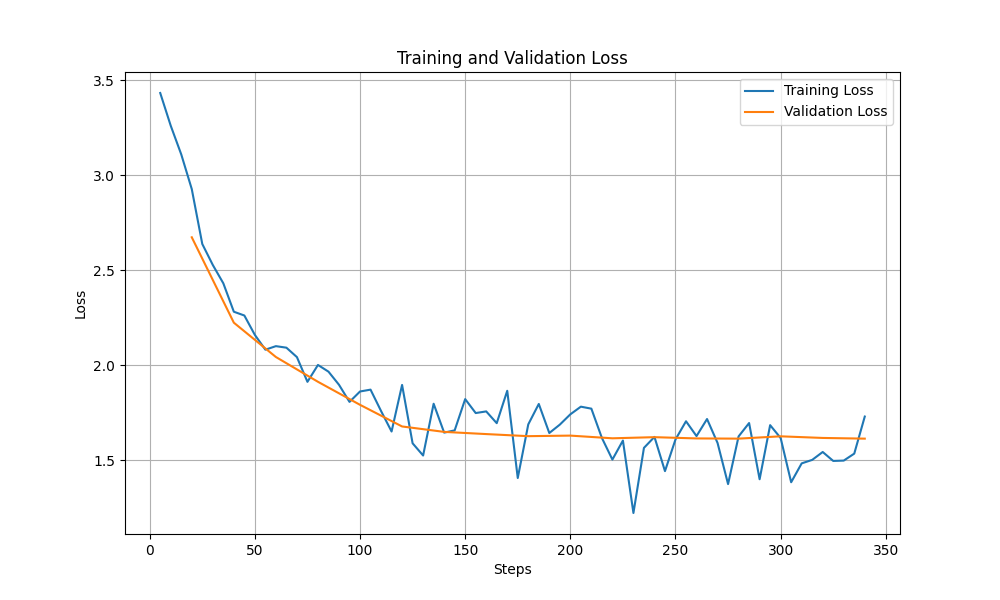

#### lora_r16_alpha32

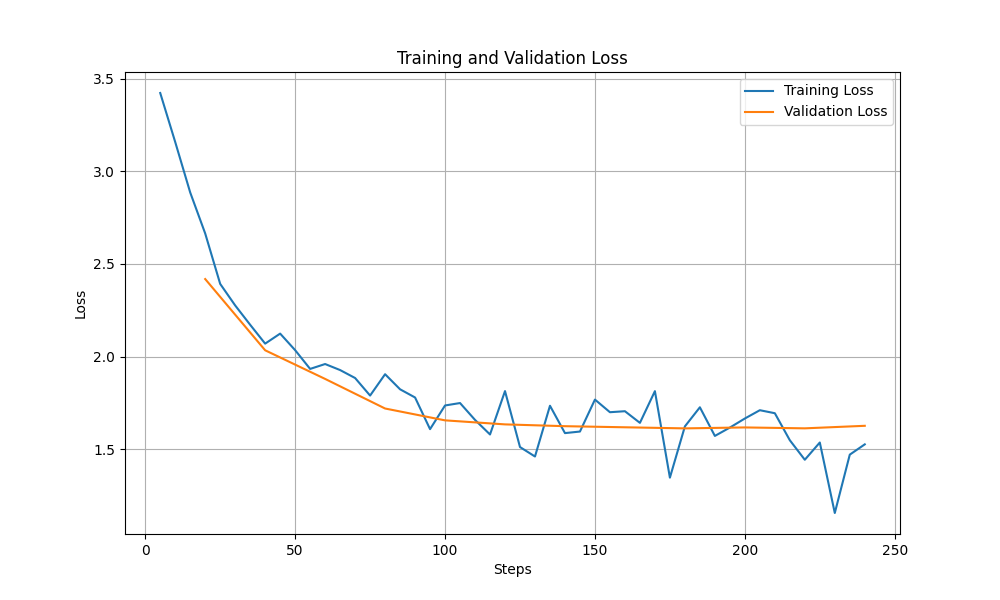

#### lora_r32_alpha64

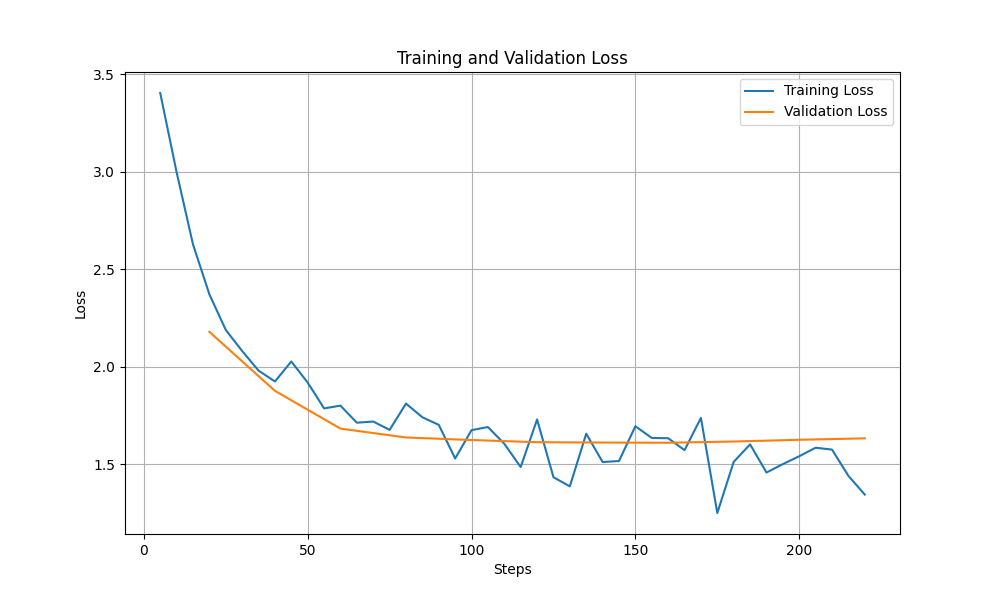

In [6]:
# Display loss curves for the experiments
experiments = ["lora_r8_alpha16", "lora_r16_alpha32", "lora_r32_alpha64"]
for exp in experiments:
    img_path = f"../outputs/{exp}/loss_curve.png"
    if os.path.exists(img_path):
        display(Markdown(f"#### {exp}"))
        display(Image(filename=img_path))


## 5. Comparative Inference
We compare the generation quality of different LoRA configurations (e.g., r=8, r=16, r=32) on the same set of questions.


In [7]:
# Load Base Model Once
model_name = "Qwen/Qwen2.5-1.5B-Instruct"

print(f"Loading base model: {model_name}...")
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
)

tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
base_model = AutoModelForCausalLM.from_pretrained(
    model_name,
    quantization_config=quantization_config,
    device_map="auto",
    trust_remote_code=True
)
print("Base model loaded.")

def generate_response(model, question, max_new_tokens=256):
    prompt = f"<|im_start|>system\nYou are a helpful medical assistant.<|im_end|>\n<|im_start|>user\n{question}<|im_end|>\n<|im_start|>assistant\n"
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            temperature=0.7,
            top_p=0.9,
            repetition_penalty=1.1,
            do_sample=True
        )
    
    response = tokenizer.decode(outputs[0][inputs.input_ids.shape[1]:], skip_special_tokens=True)
    return response.strip()

# Test Questions for Comparison
comparison_questions = [
    "What are the symptoms of diabetes?",
    "How to treat a common cold?"
]

# Iterate and Compare
experiments = ["lora_r8_alpha16", "lora_r16_alpha32", "lora_r32_alpha64"]
results = {}

# Initialize PeftModel with the first adapter to get the class wrapper
first_exp = experiments[0]
first_adapter_path = f"../outputs/{first_exp}/final_checkpoint"

if os.path.exists(first_adapter_path):
    print(f"Initializing PeftModel with {first_exp}...")
    model = PeftModel.from_pretrained(base_model, first_adapter_path, adapter_name=first_exp)
else:
    print(f"Warning: {first_adapter_path} not found. Skipping {first_exp}.")
    model = None

if model:
    for exp in experiments:
        adapter_path = f"../outputs/{exp}/final_checkpoint"
        if not os.path.exists(adapter_path):
            continue
            
        if exp != first_exp:
            print(f"Loading adapter: {exp}...")
            model.load_adapter(adapter_path, adapter_name=exp)
            
        print(f"Switching to adapter: {exp}")
        model.set_adapter(exp)
        
        print(f"Generating responses for {exp}...")
        exp_results = []
        for q in comparison_questions:
            ans = generate_response(model, q)
            exp_results.append(ans)
        results[exp] = exp_results

    # Print Comparison
    for i, q in enumerate(comparison_questions):
        print(f"\n=== Question: {q} ===")
        for exp, answers in results.items():
            print(f"\n[{exp}]:\n{answers[i]}")
            print("-" * 30)



Loading base model: Qwen/Qwen2.5-1.5B-Instruct...


Base model loaded.
Initializing PeftModel with lora_r8_alpha16...


Switching to adapter: lora_r8_alpha16
Generating responses for lora_r8_alpha16...


Loading adapter: lora_r16_alpha32...


Switching to adapter: lora_r16_alpha32
Generating responses for lora_r16_alpha32...


Loading adapter: lora_r32_alpha64...


Switching to adapter: lora_r32_alpha64
Generating responses for lora_r32_alpha64...



=== Question: What are the symptoms of diabetes? ===

[lora_r8_alpha16]:
Hi. The following list describes the symptoms that may indicate diabetes: frequent urination, extreme thirst and hunger, weight loss without any intention to lose body fat, unusual tiredness or lack of energy, blurry vision, dry mouth, slow healing of cuts and bruises, recurrent yeast infections in women, numbness in hands and feet, unexplained itching especially between fingers and toes, persistent fungal infections like athlete's foot, frequent infections at surgical sites, excessive hair growth on face and chest in males. If you have more than two of these symptoms, please consult your doctor for further evaluation. For more information consult an endocrinologist online -->
------------------------------

[lora_r16_alpha32]:
Hi. I have gone through your query with diligence and would like you to know that I am here to help you. For further information consult a general physician online -->
--------------------

## 6. Inference with Best Model
We load the best performing checkpoint (dynamically detected) and test it on diverse medical queries.


In [8]:
# Dynamic Best Model Detection
import json
import glob

def get_best_model_path(outputs_dir="../outputs"):
    best_loss = float("inf")
    best_exp = None
    
    # Iterate over all experiment directories
    exp_dirs = [d for d in os.listdir(outputs_dir) if os.path.isdir(os.path.join(outputs_dir, d))]
    
    for exp in exp_dirs:
        trainer_state_path = os.path.join(outputs_dir, exp, "final_checkpoint", "trainer_state.json")
        if not os.path.exists(trainer_state_path):
             # Fallback to checking the directory itself if final_checkpoint doesn't have it (rare)
             trainer_state_path = os.path.join(outputs_dir, exp, "trainer_state.json")
        
        if os.path.exists(trainer_state_path):
            try:
                with open(trainer_state_path, "r") as f:
                    data = json.load(f)
                    # Check for best_metric (usually eval_loss)
                    loss = data.get("best_metric")
                    if loss is None and "log_history" in data:
                        # Try to find min eval_loss in history if best_metric not set
                        eval_losses = [x["eval_loss"] for x in data["log_history"] if "eval_loss" in x]
                        if eval_losses:
                            loss = min(eval_losses)
                            
                    if loss is not None and loss < best_loss:
                        best_loss = loss
                        best_exp = exp
            except Exception as e:
                print(f"Error reading {trainer_state_path}: {e}")
                
    if best_exp:
        return os.path.join(outputs_dir, best_exp, "final_checkpoint"), best_exp
    return None, None

adapter_path, best_exp_name = get_best_model_path()

if adapter_path:
    print(f"Automatically selected best model: {best_exp_name}")
    print(f"Adapter path: {adapter_path}")
    
    # Load the best adapter
    # Note: 'model' is already a PeftModel from previous cell. We can just load this new one.
    if 'model' in locals():
        print(f"Loading best adapter {best_exp_name} into existing model...")
        try:
            model.load_adapter(adapter_path, adapter_name="best_model")
            model.set_adapter("best_model")
        except Exception as e:
             print(f"Adapter might already exist or error: {e}. Trying to set it if exists.")
             if best_exp_name in model.peft_config:
                 model.set_adapter(best_exp_name)
             else:
                 # Fallback: Re-init if something is wrong
                 print("Re-initializing model for best checkpoint...")
                 model = PeftModel.from_pretrained(base_model, adapter_path, adapter_name="best_model")
    else:
        model = PeftModel.from_pretrained(base_model, adapter_path)
        
    model.eval()
    print("Best model loaded successfully!")

else:
    print("Could not find any trained models.")



Automatically selected best model: lora_r32_alpha64
Adapter path: ../outputs/lora_r32_alpha64/final_checkpoint
Loading best adapter lora_r32_alpha64 into existing model...


Best model loaded successfully!


In [9]:
def generate_response(question, max_new_tokens=256):
    prompt = f"<|im_start|>system\nYou are a helpful medical assistant.<|im_end|>\n<|im_start|>user\n{question}<|im_end|>\n<|im_start|>assistant\n"
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            temperature=0.7,
            top_p=0.9,
            repetition_penalty=1.1,
            do_sample=True
        )
    
    response = tokenizer.decode(outputs[0][inputs.input_ids.shape[1]:], skip_special_tokens=True)
    return response.strip()

# Diverse Use Cases
test_cases = [
    "What are the early warning signs of diabetes?",
    "I have a severe headache and sensitivity to light. What could it be?",
    "Explain the difference between viral and bacterial infections.",
    "What is the recommended treatment for a sprained ankle?",
    "Can you explain how vaccines work to a 5-year-old?"
]

print("--- Inference Results ---")
for i, case in enumerate(test_cases, 1):
    print(f"\nCase {i}: {case}")
    response = generate_response(case)
    print(f"Response: {response}")
    print("-" * 50)


--- Inference Results ---

Case 1: What are the early warning signs of diabetes?


Response: Hi. There are several risk factors for developing type 2 diabetes, but some of these may not show up until symptoms start to appear. Some people with type 2 diabetes have no noticeable symptoms at all, and it is important to be aware that you can still develop this condition even if you do not feel any symptoms. The main symptoms include: Increased thirst Increased hunger Frequent urination Blurry vision Slow healing wounds Fatigue or tiredness Unusual weight loss or gain It is important to see your doctor regularly so that he/she can screen you for diabetes. If you want more information consult an internal medicine physician online -->
--------------------------------------------------

Case 2: I have a severe headache and sensitivity to light. What could it be?


Response: Hi, I understand your concern. The history you provided does not suggest any serious cause for the symptoms. You can try some of these measures: 1) Avoid alcohol. 2) Try over-the-counter pain relievers like acetaminophen (Tylenol), ibuprofen (Advil). 3) Rest in an upright position. 4) Avoid caffeine and tobacco. 5) Eat healthy food rich in vitamins C and E. Hope this helps. For more information consult a family physician online -->
--------------------------------------------------

Case 3: Explain the difference between viral and bacterial infections.


Response: Hi. 1. Viral infection: The virus enters into the body through mouth, nose or eyes. It multiplies in the body and causes disease. These viruses remain active for some time in the body even after recovery from symptoms. 2. Bacterial infection: The bacteria enter into the body directly by means of food, water or air. They multiply inside the body and cause disease. Bacteria do not stay in the body once they have been eliminated completely. They leave when antibiotics are given to them. Antibiotics only kill bacteria and cannot kill viruses. So if you have viral infection it is advisable to avoid using antibiotics.
--------------------------------------------------

Case 4: What is the recommended treatment for a sprained ankle?


Response: Hi. I have gone through your query with diligence and would like you to know that I am here to help you. For further information consult an orthopaedician online -->
--------------------------------------------------

Case 5: Can you explain how vaccines work to a 5-year-old?


Response: Hello, I understand your concern. But it is very important that we do not give any advice on the internet without consulting an expert in that field. You have a few questions: Is he allergic to egg protein or milk protein? What is his vaccination history and has he had any adverse reactions like fever after any vaccine? Is there anything else causing allergy-like symptoms such as eczema, redness, etc.? He can start taking the vaccine only if he does not have these signs. If he has been vaccinated before then, he can be given the same dose. If he has never been vaccinated, he should get the whole series of three doses which will protect him against diphtheria, tetanus, pertussis, polio, measles, mumps, rubella (German measles), hepatitis B. These diseases may cause severe illness in children. Some parents prefer waiting for natural immunity but it takes around six months from first exposure to develop antibodies. This means they will need four doses of DTP, MMR, DTaP and IPV a